# Spotify Data Analysis

## Setup

### Downloading your own account's listening history

Your account's data can be obtained by going to [Spotify's Privacy page](https://www.spotify.com/in-en/account/privacy/), and under `Download your data` section, selecting `Extended streaming history` and requesting it.


### Generating your own Analysis

1. Clone this repo or download the zip and extract it to a folder

 
```bash
git clone https://github.com/d1vij/spotify-data-analysis/
```

2. Install dependencies

```bash
# If using uv
uv sync

# Using pip
python3 -m venv .venv
source .venv/bin/activate
pip install -r requirements.txt
```


3. Start the jupyter server
```bash
uv run jupyter lab
# OR 
jupyter lab
```

4. Open and run all cells of this notebook (_project.ipynb_)

## About the project

The project focuses on extracting and analyzing Spotify’s Extended Streaming History, a multi-file dataset provided by Spotify under GDPR data access requests. 

Unlike the standard one-year streaming history, the extended dataset contains a list of items (e.g. songs, videos, and podcasts) listened to or watched during the lifetime of the account

---

## About the data

Spotify provided zip file has the listening history split into multiple json files with size of around 12KB

![Manual Unzipping](https://github.com/d1vij/spotify-data-analysis/blob/main/images/manual_unzipping.png?raw=true)

_Although this could've been unzipped and processed manually, the script `utils.process_zip` does it automatically for us :P._

---

### Data Compilation & DataFrame Construction Workflow

#### 1. Asking the User for the ZIP File Path
The program begins by prompting the user to provide the file path of Spotify’s **Extended Streaming History** ZIP archive. Usually named _my_spotify_data.zip_

#### 2. Unzipping and Reading JSON Files
After extraction, the application scans the directory and reads every JSON file with the prefix: _Streaming_History_Audio_

Each of these files contains an **array of listening-event objects**, shaped like:

```json
{
    "ts": "2023-04-09T14:24:49Z",
    "platform": "android",
    "ms_played": 185733,
    "conn_country": "IN",
    "ip_addr": "152.57.221.62",
    "master_metadata_track_name": "Here Comes The Sun - Remastered 2009",
    "master_metadata_album_artist_name": "The Beatles",
    "master_metadata_album_album_name": "Abbey Road",
    "spotify_track_uri": "spotify:track:6dGnYIeXmHdcikdzNNDMm2",
    "episode_name": null,
    "episode_show_name": null,
    "spotify_episode_uri": null,
    "audiobook_title": null,
    "audiobook_uri": null,
    "audiobook_chapter_uri": null,
    "audiobook_chapter_title": null,
    "reason_start": "playbtn",
    "reason_end": "trackdone",
    "shuffle": false,
    "skipped": false,
    "offline": false,
    "offline_timestamp": 1681050047,
    "incognito_mode": false
}
```
#### Filtering && Reducing to Required Fields

Although Spotify provides a wide variety of metrics (see _utils.TrackInfoClasses.SongAttributes_), this project focuses on a minimal, analysis-oriented subset:

1. ts – Timestamp when the track was played
1. ms_played – Total listening duration in milliseconds
1. master_metadata_track_name – Track name
1. master_metadata_album_artist_name – Primary artist
1. master_metadata_album_album_name – Album name

The final compiled dataset is stored as a large JSON (or CSV) file (≈ 11 MB in my case), containing simplified objects of _utils.TrackInfoClasses.FilteredTrackInfo_, like:

```csv
...
2025-11-29T09:31:18Z,952,She's A Rainbow,The Rolling Stones,Forty Licks
2025-11-29T09:31:33Z,14674,Changes - 2015 Remaster,David Bowie,Hunky Dory
2025-11-29T09:31:34Z,934,Going to California - Remaster,Led Zeppelin,Led Zeppelin IV
2025-11-29T09:31:36Z,1372,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed
2025-11-29T09:32:24Z,48475,Going to California - Remaster,Led Zeppelin,Led Zeppelin IV
2025-11-29T09:32:25Z,0,Broken Hearts Are For Assholes,Frank Zappa,Sheik Yerbouti
2025-11-29T09:34:05Z,99907,Broken Hearts Are For Assholes,Frank Zappa,Sheik Yerbouti
2025-11-29T09:34:10Z,5228,Flakes,Frank Zappa,Sheik Yerbouti
2025-11-29T09:34:14Z,3911,Baba O'Riley,The Who,Who's Next
2025-11-29T09:34:20Z,0,Misirlou,Dick Dale,Surf With Me Now!
2025-11-29T09:39:04Z,215618,Dazed and Confused - 1990 Remaster,Led Zeppelin,Led Zeppelin
2025-11-29T12:53:56Z,44476,Why Does It Hurt When I Pee?,Frank Zappa,"Joe's Garage Acts I, II & III"
2025-11-29T13:04:48Z,8634,Why Does It Hurt When I Pee?,Frank Zappa,"Joe's Garage Acts I, II & III"
2025-11-29T13:04:59Z,10778,Catholic Girls,Frank Zappa,"Joe's Garage Acts I, II & III"
2025-11-29T13:05:03Z,2223,The Soft Parade,The Doors,The Soft Parade
2025-11-29T13:08:42Z,218185,I Talk To The Wind,King Crimson,In The Court Of The Crimson King (Expanded & Remastered Original Album Mix)
2025-11-29T13:08:53Z,10708,1983...(A Merman I Should Turn to Be),Jimi Hendrix,Electric Ladyland
2025-11-29T13:13:13Z,258944,"Careful with That Axe, Eugene - Live",Pink Floyd,Ummagumma
2025-11-29T13:25:55Z,100453,Wish You Were Here,Pink Floyd,Wish You Were Here
2025-11-29T14:13:52Z,3073,Wah-Wah (2014 Remaster),George Harrison,All Things Must Pass
2025-11-29T14:14:17Z,939,Taxman - Remastered 2009,The Beatles,Revolver
...
```

---

### External Data

An [additional CSV*](https://www.kaggle.com/datasets/harshdprajapati/worldwide-music-artists-dataset-with-image) file containing data regarding artists, the country they belong to and their genres are is cleaned and used to provide further metadata regarding the artist.

_*https://www.kaggle.com/datasets/harshdprajapati/worldwide-music-artists-dataset-with-image_

```csv
...
David Bowie,"art rock, classic rock, glam rock, permanent wave, rock",United Kingdom
The black eyed peas karaok...,hip hop,United States
The Strokes,"alternative rock, garage rock, modern rock, permanent wave, rock",United States
Britney Spears,"dance pop, pop",United States
Guns N' Roses,"glam metal, hard rock, rock",United States
Franz Ferdinand,"alternative rock, dance rock, indie rock, modern rock, rock, scottish rock",United Kingdom
The Doors,"acid rock, album rock, classic rock, hard rock, psychedelic rock, rock",United States
JAY-Z,"east coast hip hop, gangster rap, hip hop, pop rap, rap",United States
Madonna,"dance pop, pop",United States
Pink Floyd,"album rock, art rock, classic rock, progressive rock, psychedelic rock, rock, symphonic rock",United Kingdom
Weezer,"alternative rock, modern power pop, modern rock, permanent wave, rock",United States
Snow Patrol,"irish rock, modern rock, neo mellow, permanent wave, pop rock",United Kingdom
blink-182,"alternative metal, modern rock, pop punk, punk, rock, socal pop punk",United States
The White Stripes,"alternative rock, blues rock, detroit rock, garage rock, modern blues rock, permanent wave, punk blues, rock",United States
The Cure,"new wave, permanent wave, rock, uk post-punk",United Kingdom
Led Zeppelin,"album rock, classic rock, hard rock, rock",United Kingdom
Becky G,"latin pop, latin viral pop, rap latina, reggaeton, trap latino, urbano latino",United States
Aerosmith,"album rock, classic rock, hard rock, rock",United States
The Offspring,"alternative metal, permanent wave, post-grunge, punk, rock, skate punk, socal pop punk",United States
...
```

---

### Processing and Analyzing Tools used

The project implements wrappers around external libraries which helps in abstracting away the workings from the end user as well as simplifies the developing experience.

Major external libraries used
1. Pandas -- data manipulation and aggregation for analysis
1. Matplotlib && Seaborn -- plots for visual analysis
1. Fizzbuzz -- fuzzy searcher for user queries

---

All the helper functions and utilites is made into a unified module `utils` and further description along with its working is explained in each of its corresponding submodules.

All generic plots are present in `utils.plot_sources.plotters` module whereas the functions utilizing them to generate analysis ae present in the `utils.plot_sources.analysis_plots` module

---

# Imports and configurations

In [1]:
from os import path
import pandas as pd

# Prevent wrapping of dataframes when printed
pd.set_option("display.expand_frame_repr", False)


# Disabling warnings generated by matplotlib
import warnings

warnings.filterwarnings("ignore")


from utils.generate_frame import generate_frame

# Plot imports
from utils.plot_sources.analysis_plots.top_n import top_analysis
from utils.plot_sources.analysis_plots.daily_tracks_graph import daily_tracks_graph
from utils.plot_sources.analysis_plots.daily_listening_activity import (
    daily_listening_activity,
)
from utils.plot_sources.analysis_plots.track_playtime_kde_dist import (
    track_playtime_kde_dist,
)
from utils.plot_sources.analysis_plots.per_artist_analysis import (
    interactive_per_artist_analysis,
)
from utils.plot_sources.analysis_plots.artist_corelation_plot import (
    artist_correlation_plot,
)

## Track info dataframe

In [2]:
df = generate_frame("./data/my_spotify_data.zip")
print(df.tail(20))

                             ts  ms_played                         master_metadata_track_name master_metadata_album_artist_name master_metadata_album_album_name
62348 2025-12-01 12:52:24+00:00      28185     What Ever Happened To All The Fun In The World                       Frank Zappa                   Sheik Yerbouti
62349 2025-12-01 12:55:40+00:00     195880                               Something In The Way                           Nirvana                        Nevermind
62350 2025-12-01 12:57:13+00:00      93042                                       About A Girl                           Nirvana                           Bleach
62351 2025-12-01 13:11:18+00:00     196332                    Band On The Run - 2010 Remaster                    Paul McCartney                  Band On The Run
62352 2025-12-01 13:37:41+00:00     234057                              How Deep Is Your Love                          Bee Gees                         Greatest
62353 2025-12-01 13:37:49+00:00   

## Artist info dataframe 

In [3]:
artists_df = pd.read_csv(path.abspath("./ext_data/global_music_artists.csv"))
print(artists_df.head(20))

              artist_name                                       artist_genre         country
0                Coldplay                                permanent wave, pop  United Kingdom
1               Radiohead  alternative rock, art rock, melancholia, oxfor...  United Kingdom
2   Red Hot Chili Peppers  alternative rock, funk metal, funk rock, perma...   United States
3                 Rihanna             barbadian pop, pop, urban contemporary   United States
4                  Eminem                      detroit hip hop, hip hop, rap   United States
5             The Killers  alternative rock, dance rock, modern rock, per...   United States
6              Kanye West                          chicago rap, hip hop, rap   United States
7                 Nirvana                       grunge, permanent wave, rock   United States
8                    Muse  alternative rock, modern rock, permanent wave,...  United Kingdom
9                   Queen                      classic rock, glam rock

## Analysis

### Top analysis

Analyzing the top artists, tracks, albums and genres the user has been listening to


Out of 1810 artists, the top 50 artists based on track playtimes (in hours) are
1. The Beatles - 121.3           2. Pink Floyd - 96.4
3. Pritam - 75.4                 4. Queen - 69.2
5. Eminem - 55.5                 6. Kishore Kumar - 44.7
7. Eagles - 40.9                 8. David Bowie - 38.3
9. Led Zeppelin - 34.6           10. Billy Joel - 29.0
11. Arijit Singh - 28.2          12. Michael Jackson - 28.2
13. A.R. Rahman - 26.4           14. Elton John - 26.4
15. The Rolling Stones - 23.6    16. Amit Trivedi - 23.0
17. Nirvana - 22.8               18. Jagjit Singh - 20.2
19. Bob Dylan - 20.2             20. Guns N' Roses - 18.2
21. Shankar-Ehsaan-Loy - 17.7    22. Kanye West - 17.6
23. Bee Gees - 17.6              24. Eric Clapton - 17.1
25. Lucky Ali - 16.2             26. Mohit Chauhan - 15.3
27. Lata Mangeshkar - 15.1       28. Mohammed Rafi - 14.8
29. Vishal-Shekhar - 13.7        30. ABBA - 13.3
31. Bryan Adams - 12.7           32. Black Sabbath - 12.6
33. Ed Sheeran - 11.9       

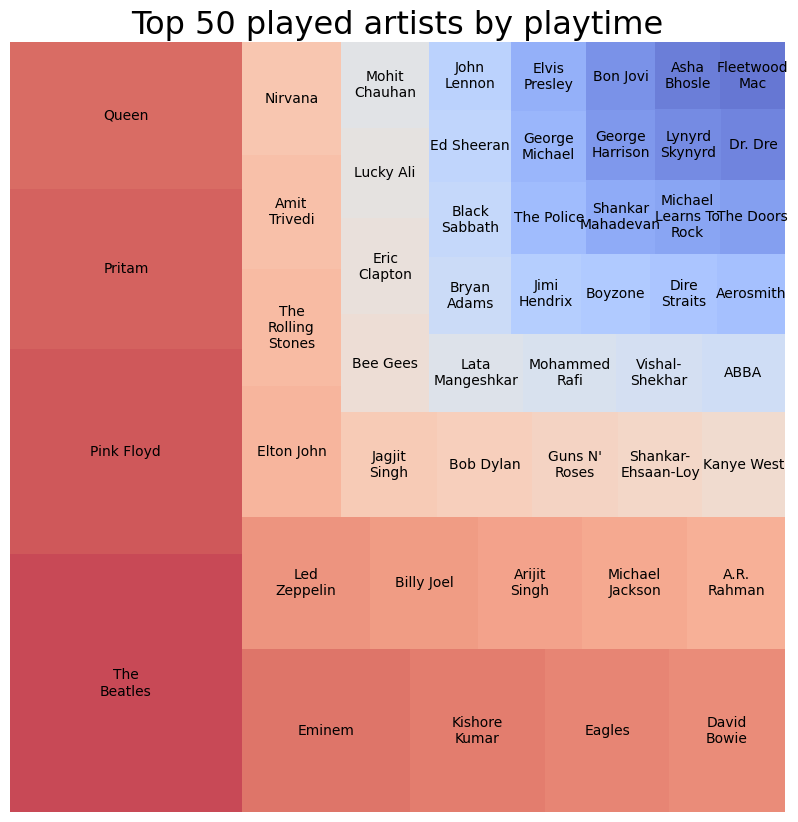

Out of 11570 unique tracks, the top 50 played tracks are
1. Bohemian Rhapsody - Remastered 2011 - 197                     2. Hotel California - 2013 Remaster - 163
3. Here Comes The Sun - Remastered 2009 - 157                    4. Bhaag D.K. Bose, Aandhi Aayi - 145
5. Words - 144                                                   6. Under Pressure - Remastered 2011 - 142
7. Can't Help Falling in Love - 139                              8. Naina Da Kya Kasoor - 132
9. Don't Stop Me Now - Remastered 2011 - 126                     10. Udd Gaye - 124
11. Another One Bites The Dust - Remastered 2011 - 123           12. Come Together - Remastered 2009 - 120
13. We Will Rock You - Remastered 2011 - 120                     14. O Sanam - 119
15. I Want It That Way - 118                                     16. Chaand Baaliyan - 114
17. Stairway to Heaven - Remaster - 112                          18. Tu Aake Dekhle - 111
19. Billie Jean - 109                                            20. Killer Q

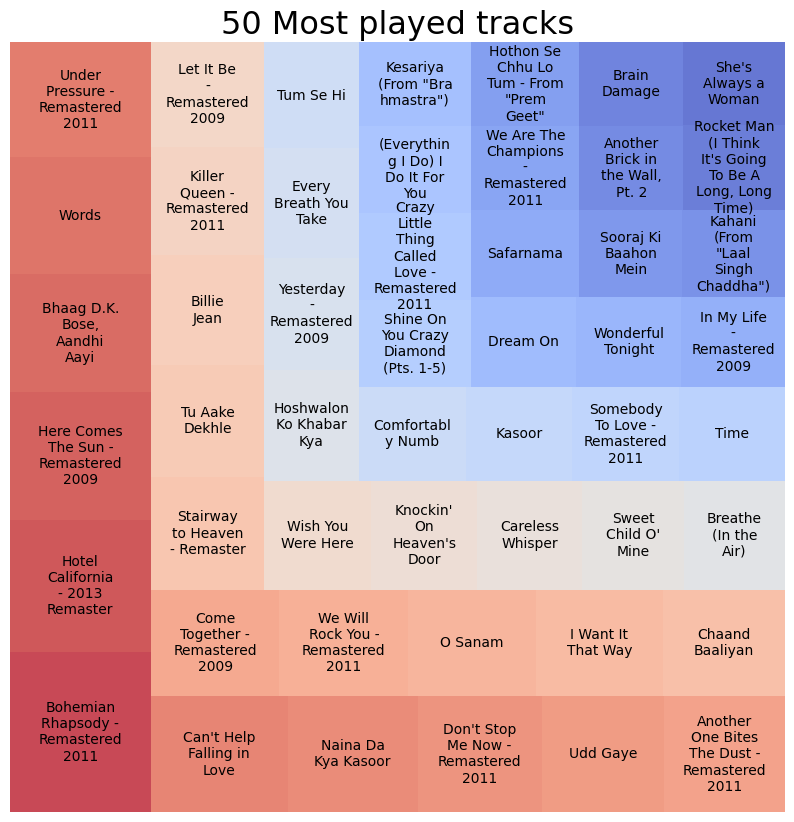

Out of 6678 unique albums, the top 50 played albums based on approximate playcounts are
1. Kasoor - 87                                                       2. Kesariya - 83
3. A Different Beat - 81                                             4. Kahani (From "Laal Singh Chaddha") - 78
5. Dard-E-Jigar - 76                                                 6. Delhi Belly - 73
7. Hot Space - 72                                                    8. Rangi Saari - 69
9. Pat Garrett & Billy The Kid - 64                                  10. Doobey - 63
11. The Dark Side of the Moon - 63                                   12. Ajanabee - 62
13. Pablo Honey - 61                                                 14. Wish You Were Here - 61
15. Sunoh - 60                                                       16. Gangsta's Paradise - 60
17. Pendulum - 60                                                    18. 20/20 - 57
19. Tamasha - 54                                                     20. Shor in the C

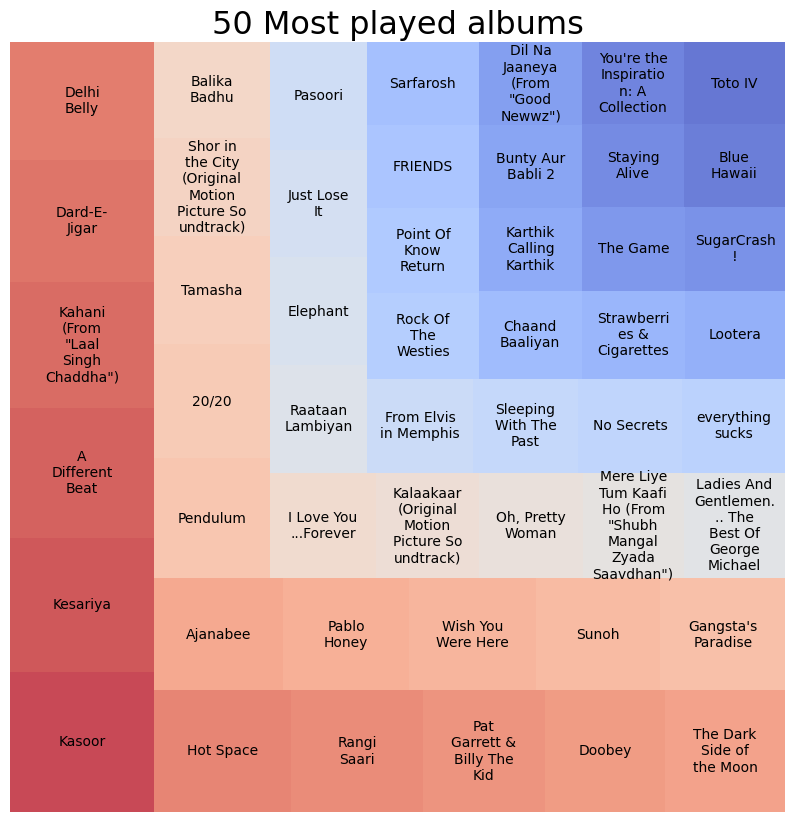

Where the artists you listened to come from
Out of 50 countries, most of the artists you listen to are from United States with a total of 770 artists!!

Top 10 countries by artist count are:
1. United States - 770 2. United Kingdom - 268
3. India - 143         4. Canada - 44
5. Australia - 44      6. Germany - 34
7. Sweden - 28         8. Japan - 24
9. France - 17         10. Italy - 16

What genres do you listen to
Out of 818 genres, you listen to rock the most with a total of 195 artists under that genre!!

Top 20 genres by artist count are:
1. rock - 195             2. classic rock - 167
3. soft rock - 164        4. album rock - 145
5. filmi - 143            6. mellow gold - 135
7. hip hop - 123          8. hard rock - 122
9. pop - 119              10. singer-songwriter - 104
11. modern bollywood - 98 12. folk rock - 89
13. new wave pop - 71     14. country rock - 64
15. rap - 63              16. blues rock - 60
17. permanent wave - 58   18. dance pop - 57
19. soul - 55             

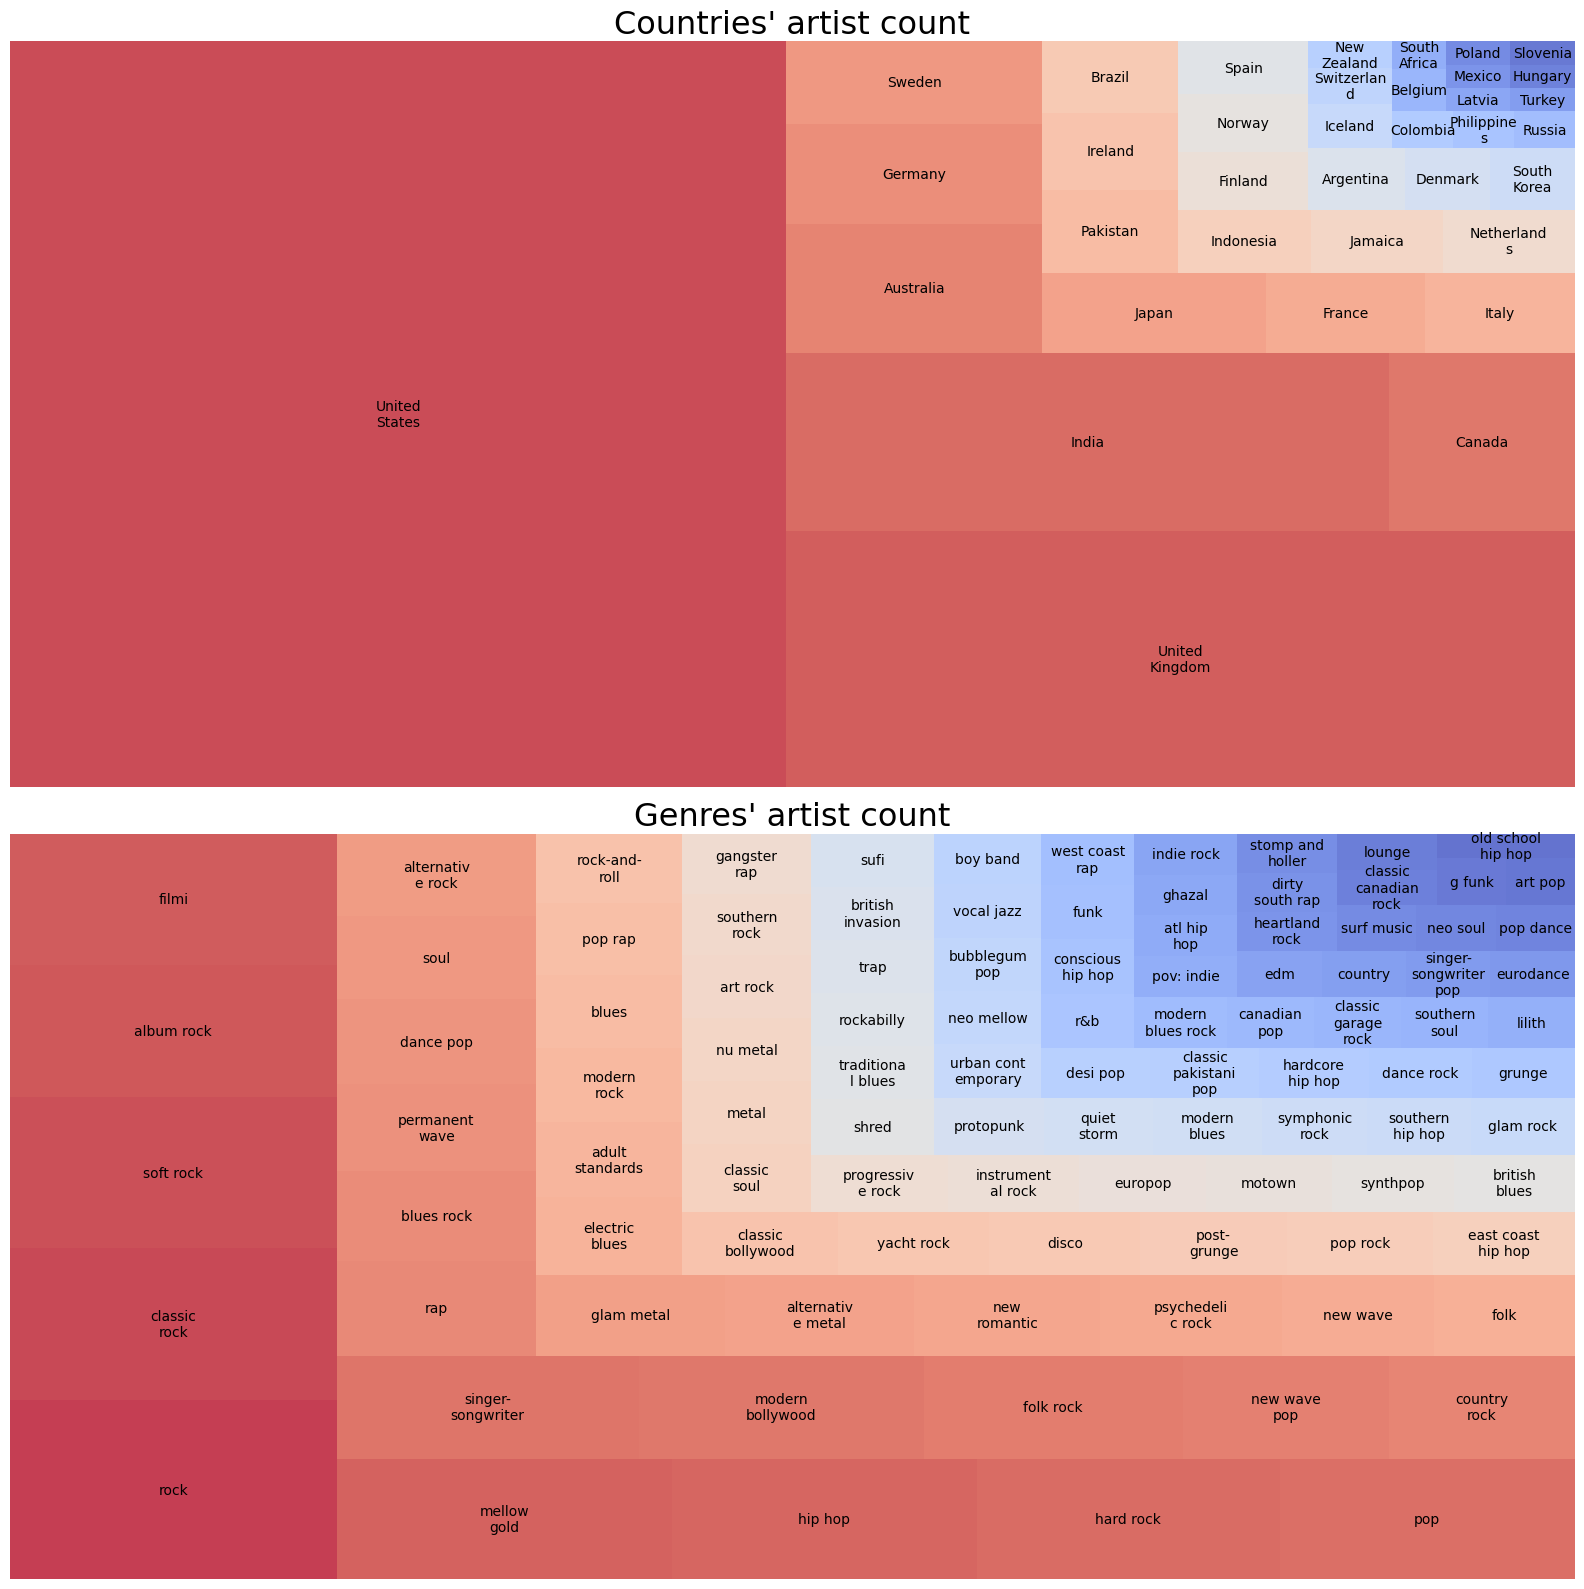

In [4]:
top_analysis(df, artists_df)

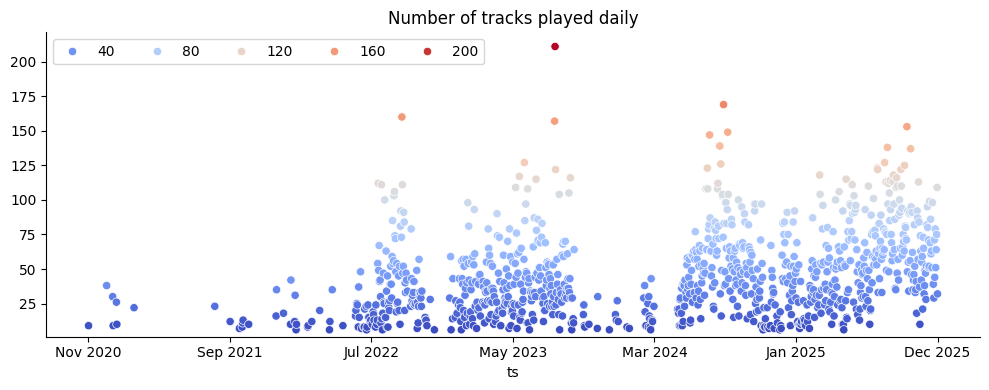

In [5]:
daily_tracks_graph(df)

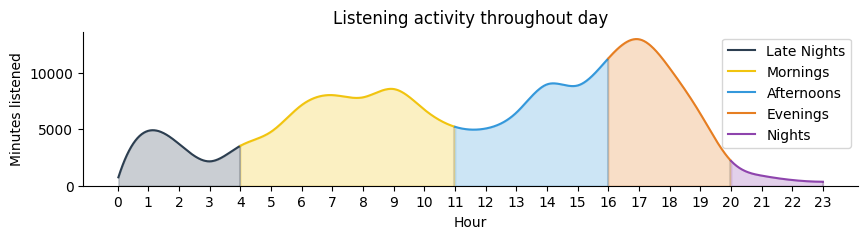

In [6]:
daily_listening_activity(df)

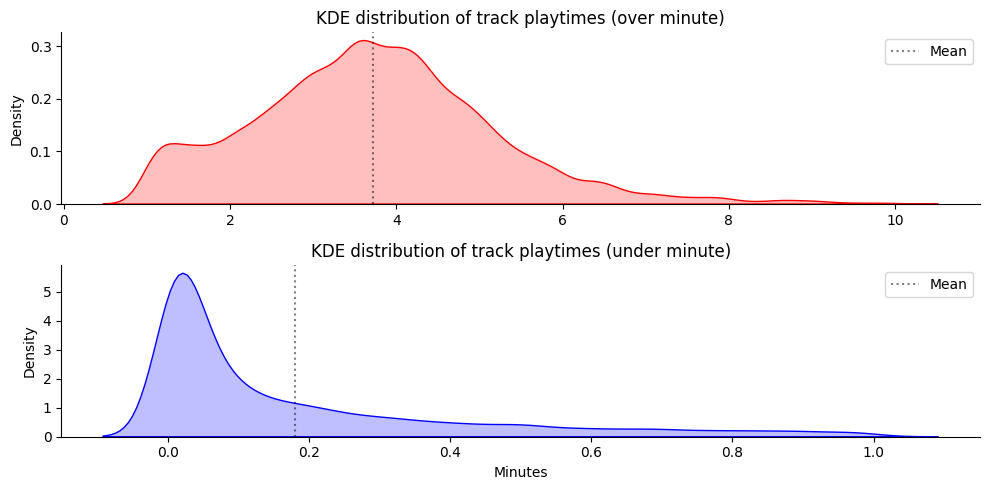

In [7]:
track_playtime_kde_dist(df)

### Correlation in listened Artists 

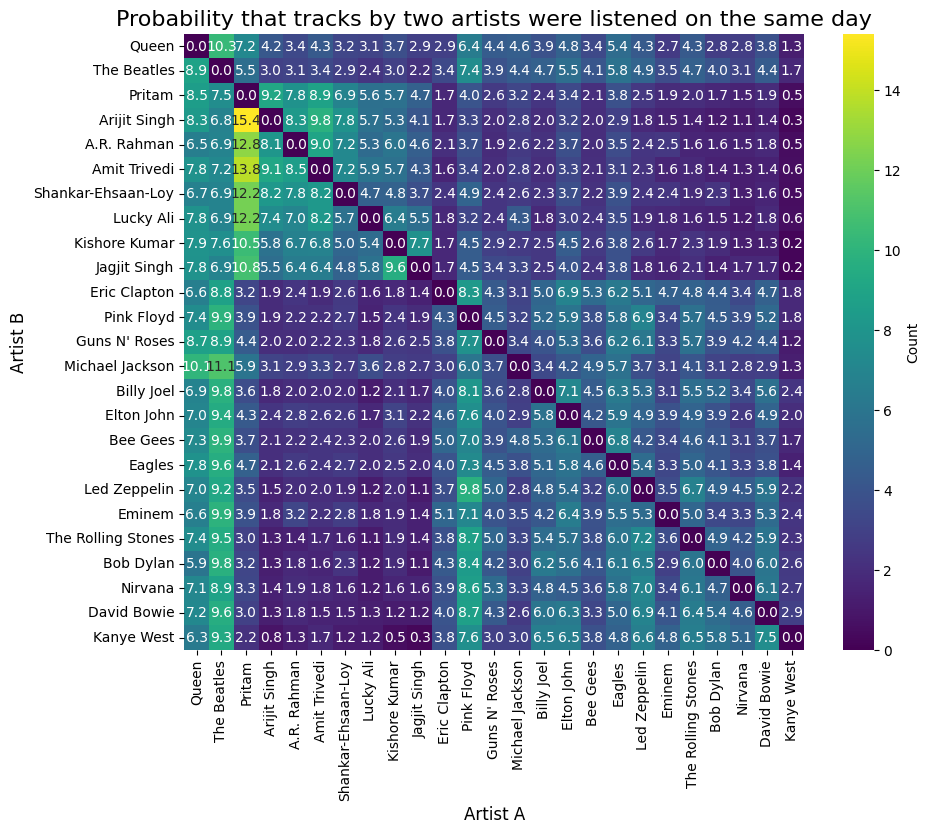

In [8]:
artist_correlation_plot(df)

### Interactive per artist analysis


What do you want to do ??
(1) Display top artist analysis for top artists
(2) Display analysis for custom artist
(*) Exit
 1
Generate analysis for how many top artists ??:  10


Generate analysis for how many top artists ??: 10
Twenty most played tracks by The Beatles
1. Here Comes The Sun - Remastered 2009 - 157 plays                   2. Come Together - Remastered 2009 - 120 plays
3. Let It Be - Remastered 2009 - 104 plays                            4. Yesterday - Remastered 2009 - 92 plays
5. In My Life - Remastered 2009 - 82 plays                            6. Hey Jude - Remastered 2015 - 61 plays
7. Something - Remastered 2009 - 60 plays                             8. Twist And Shout - Remastered 2009 - 57 plays
9. While My Guitar Gently Weeps - 2018 Mix - 56 plays                 10. And I Love Her - Remastered 2009 - 49 plays
11. While My Guitar Gently Weeps - Remastered 2009 - 48 plays         12. Blackbird - Remastered 2009 - 46 plays
13. Norwegian Wood (This Bird Has Flown) - Remastered 2009 - 45 plays 14. Oh! Darling - Remastered 2009 - 42 plays
15. Eleanor Rigby - Remastered 2009 - 34 plays                        16. Because - Remastered 2009 - 31 

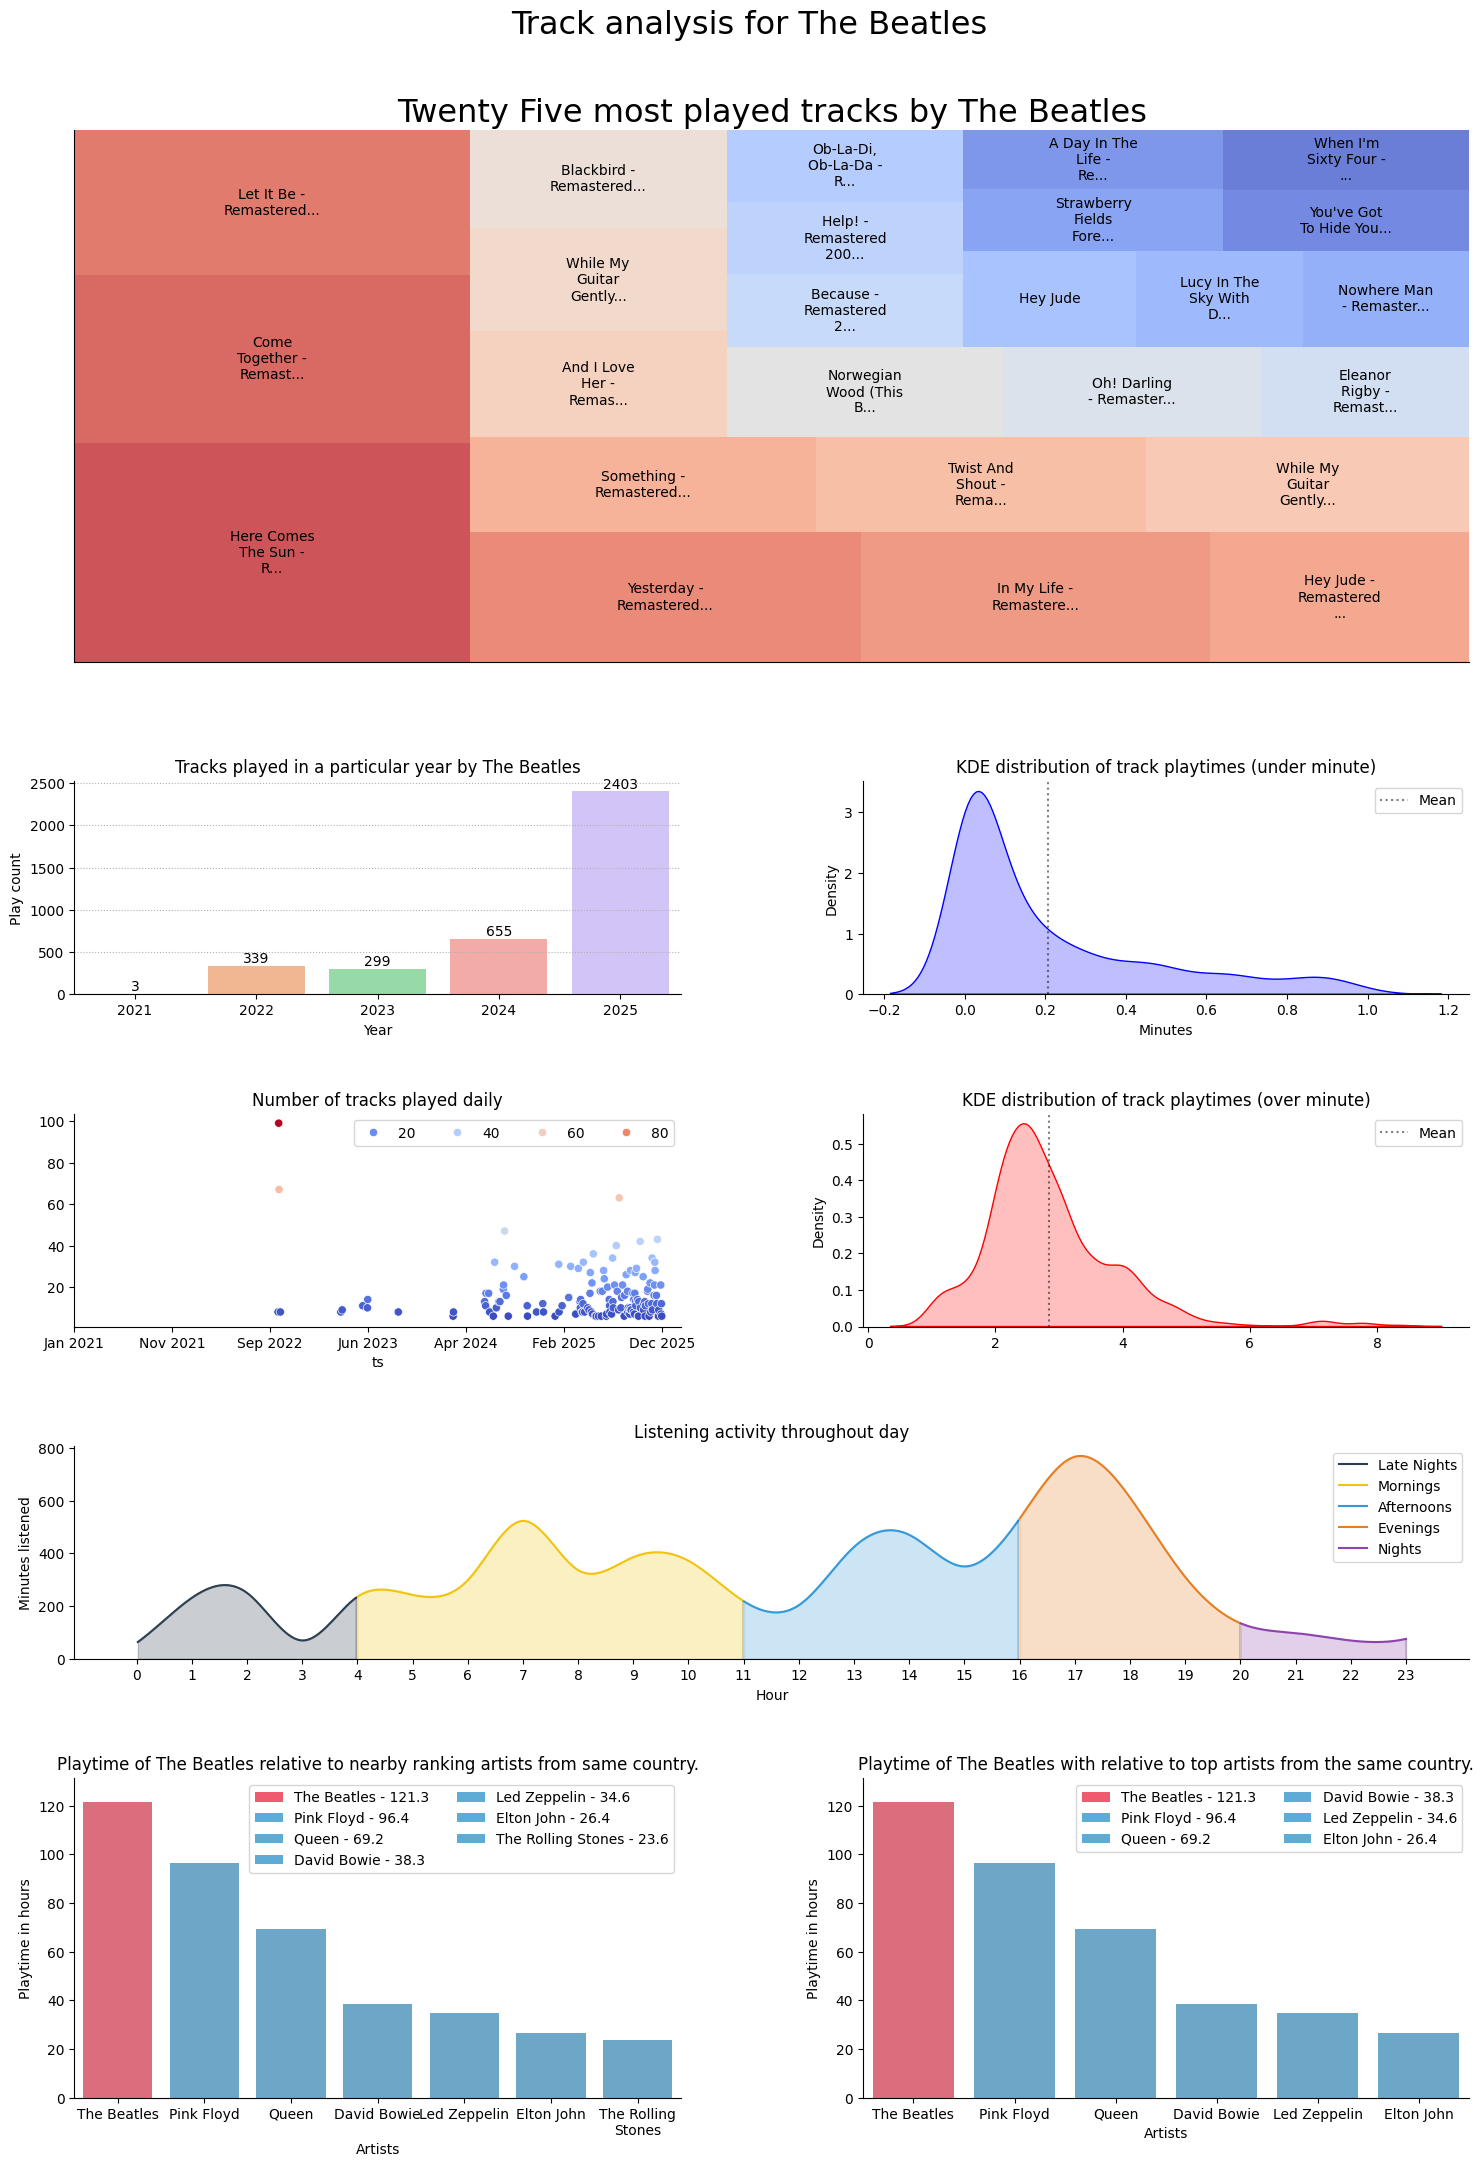


Twenty most played tracks by Pink Floyd
1. Wish You Were Here - 102 plays      2. Breathe (In the Air) - 96 plays
3. Comfortably Numb - 88 plays         4. Shine On You Crazy Diamond (Pts. 1-5) - 86 plays
5. Time - 86 plays                     6. Another Brick in the Wall, Pt. 2 - 77 plays
7. Money - 70 plays                    8. Brain Damage - 67 plays
9. The Great Gig in the Sky - 63 plays 10. Have a Cigar - 62 plays
11. Us and Them - 62 plays             12. Hey You - 56 plays
13. Any Colour You Like - 51 plays     14. Eclipse - 49 plays
15. Young Lust - 44 plays              16. Speak to Me - 43 plays
17. On the Run - 42 plays              18. Shine On You Crazy Diamond (Pts. 6-9) - 33 plays
19. Echoes - 30 plays                  20. Welcome to the Machine - 28 plays
21. Mother - 26 plays                  22. San Tropez - 23 plays
23. Pigs on the Wing 1 - 19 plays      24. Another Brick in the Wall, Pt. 1 - 18 plays

Daily tracks analysis for Pink Floyd
First track played on date

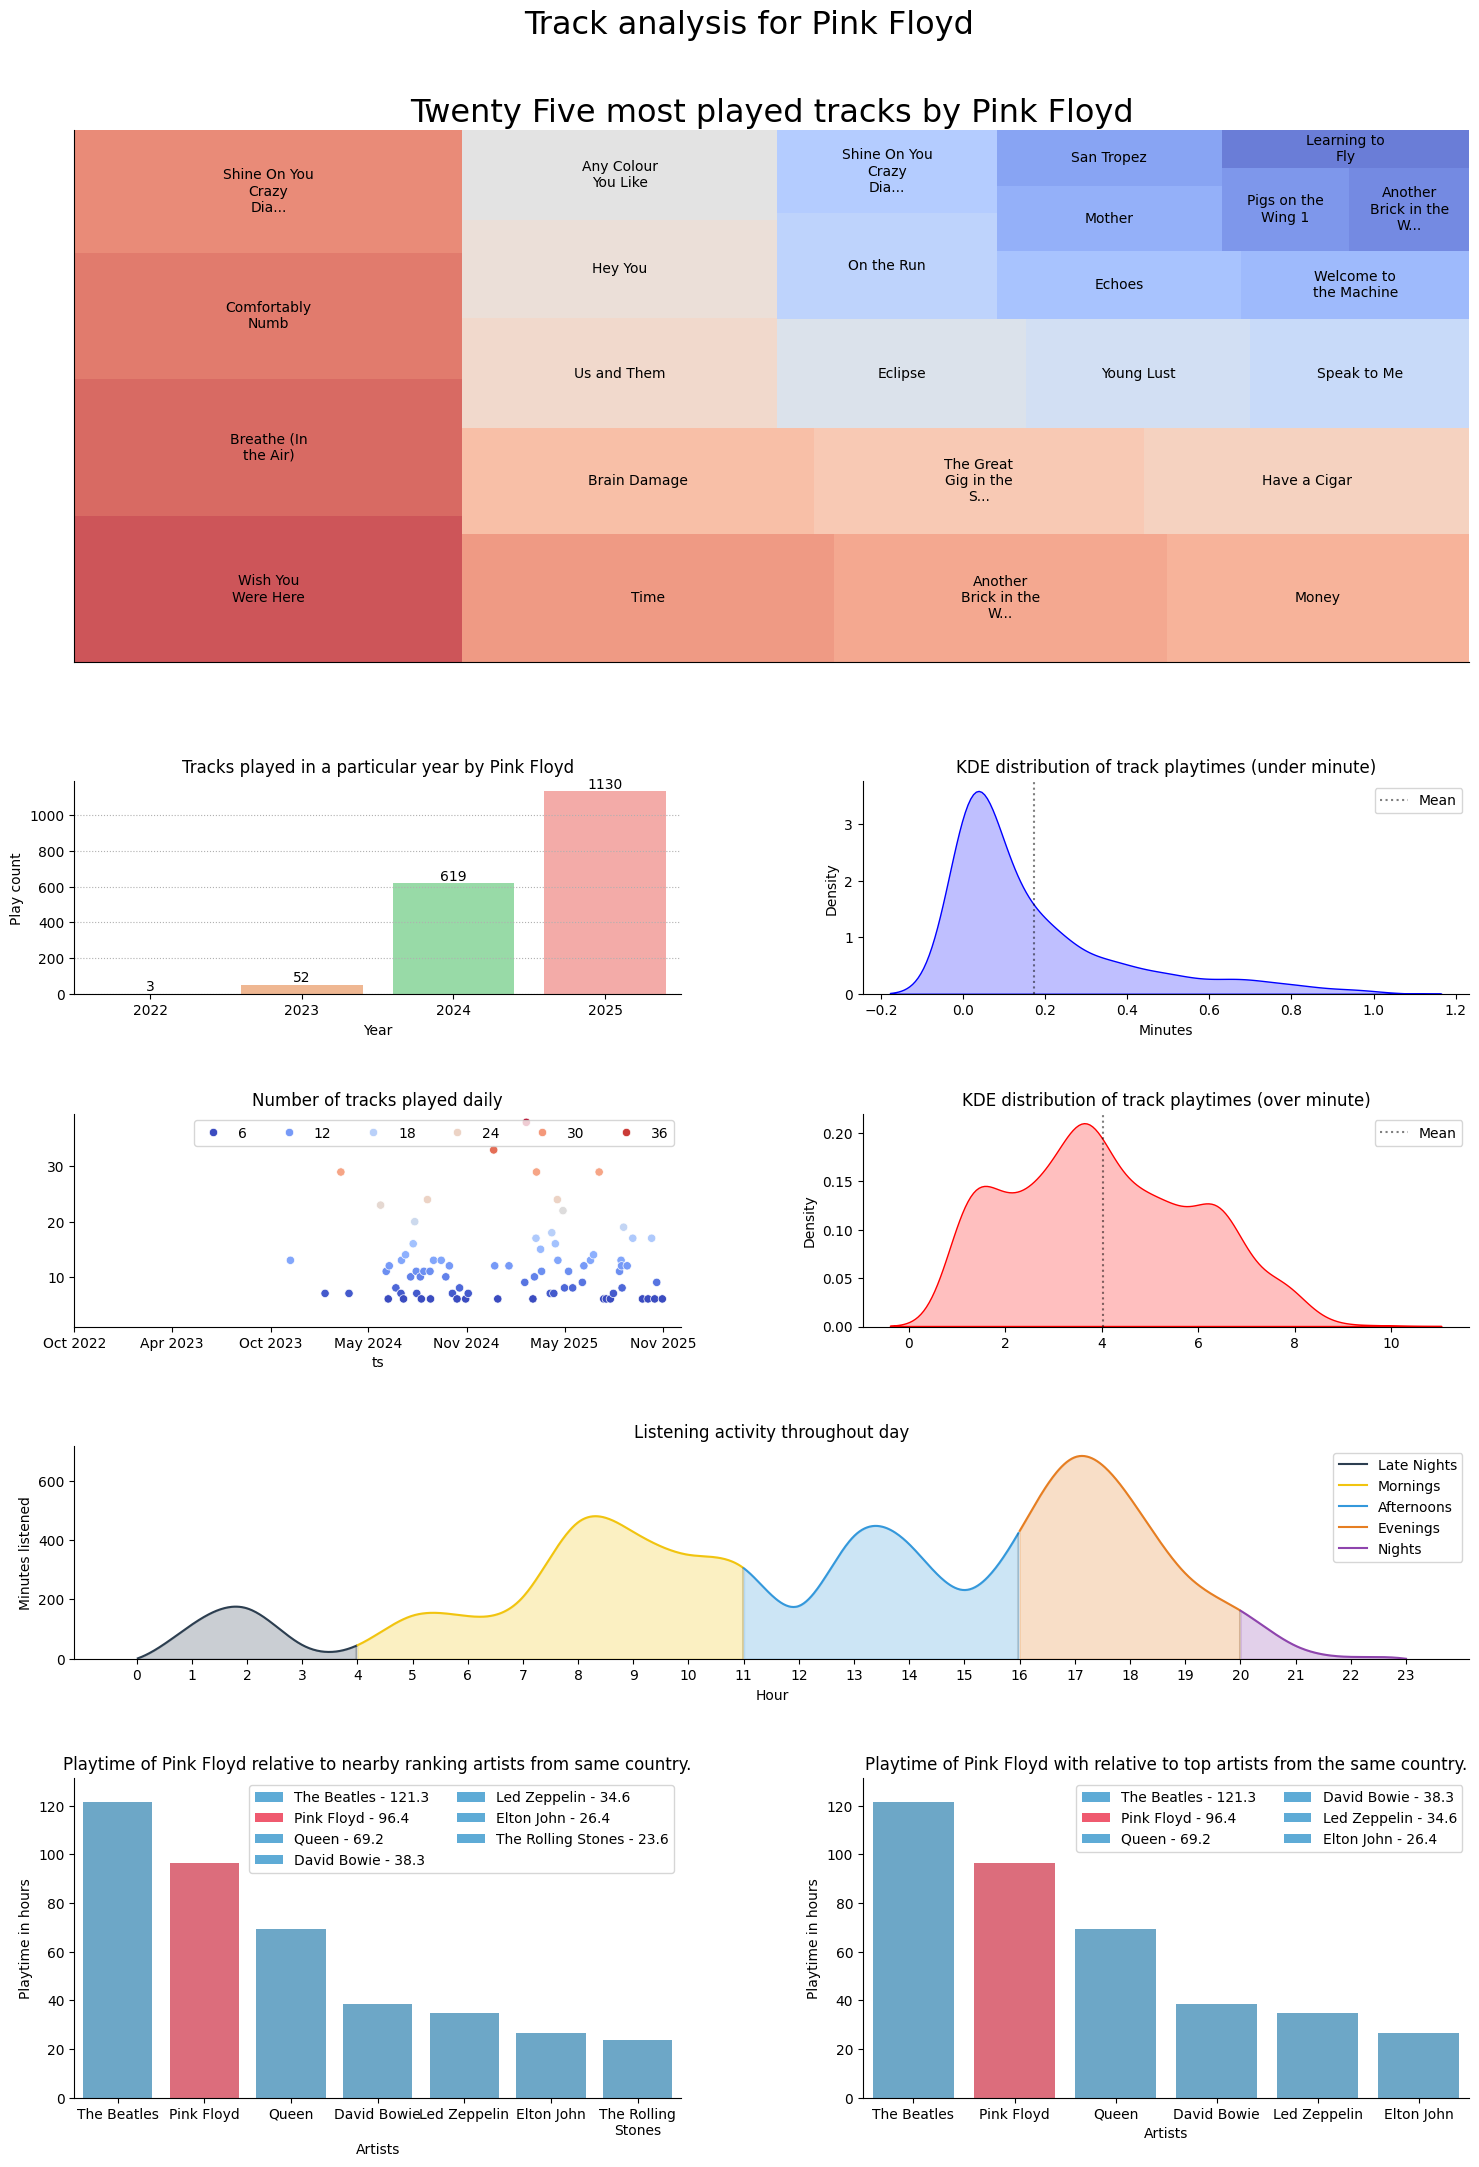


Twenty most played tracks by Pritam
1. Tum Se Hi - 88 plays                          2. Kesariya (From "Brahmastra") - 83 plays
3. Kahani (From "Laal Singh Chaddha") - 78 plays 4. Ilahi - 66 plays
5. Kabira - 60 plays                             6. Raabta - 55 plays
7. Kabira (Encore) - 54 plays                    8. Subhanallah - 52 plays
9. Pee Loon - 46 plays                           10. What Jhumka ? (From "Rocky Aur Rani Kii Prem Kahaani") - 43 plays
11. Ye Tune Kya Kiya - 43 plays                  12. Saudebazi (Encore) - 37 plays
13. Aashiyan - 36 plays                          14. Kyon - 35 plays
15. Tum Mile - 34 plays                          16. Khairiyat - 33 plays
17. Abhi Kuch Dino Se - 32 plays                 18. In Dino - 26 plays
19. Woh Din (Film Version) - 25 plays            20. Naina - 24 plays
21. Shayad - 23 plays                            22. Bhool Bhulaiyaa - 23 plays
23. Teri Jhuki Nazar - 22 plays                  24. Zara Sa - 21 plays

Daily tracks anal

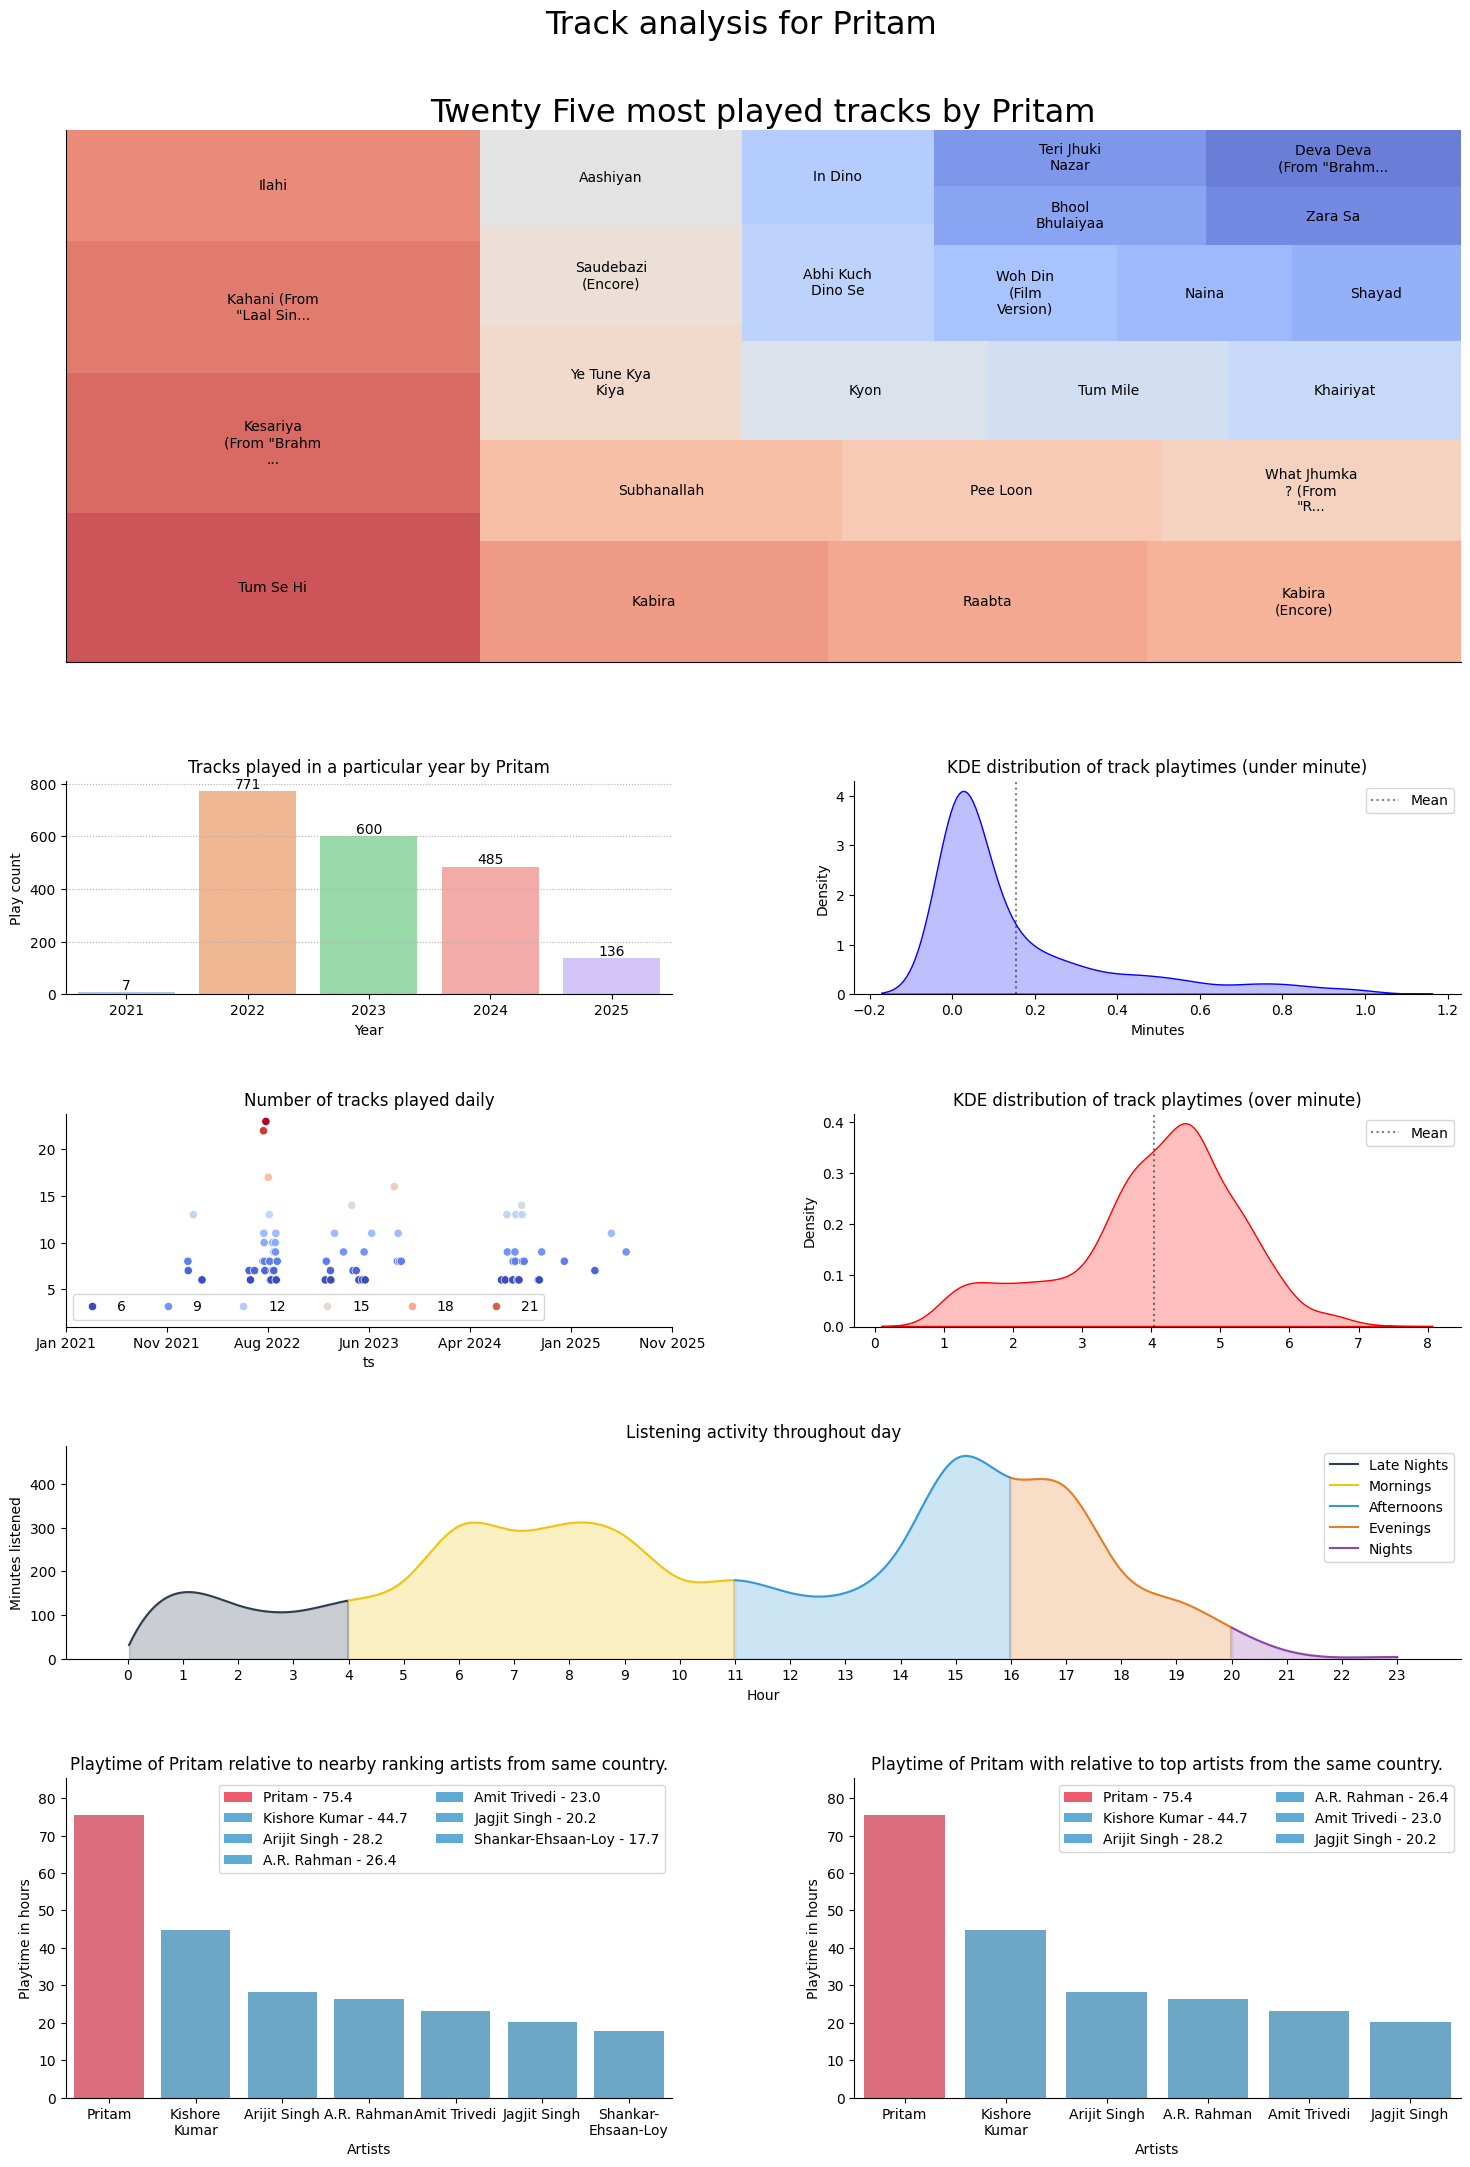


Twenty most played tracks by Queen
1. Bohemian Rhapsody - Remastered 2011 - 197 plays   2. Under Pressure - Remastered 2011 - 142 plays
3. Don't Stop Me Now - Remastered 2011 - 126 plays   4. Another One Bites The Dust - Remastered 2011 - 123 plays
5. We Will Rock You - Remastered 2011 - 120 plays    6. Killer Queen - Remastered 2011 - 108 plays
7. Somebody To Love - Remastered 2011 - 87 plays     8. Crazy Little Thing Called Love - Remastered 2011 - 86 plays
9. We Are The Champions - Remastered 2011 - 80 plays 10. I Want To Break Free - Single Remix - 70 plays
11. Radio Ga Ga - Remastered 2011 - 64 plays         12. I Want To Break Free - 64 plays
13. Love Of My Life - Remastered 2011 - 62 plays     14. Hammer To Fall - Remastered 2011 - 56 plays
15. Bohemian Rhapsody - 38 plays                     16. You're My Best Friend - Remastered 2011 - 34 plays
17. We Are The Champions - Live Aid - 32 plays       18. A Kind Of Magic - Remastered 2011 - 25 plays
19. Fat Bottomed Girls - 2011 R

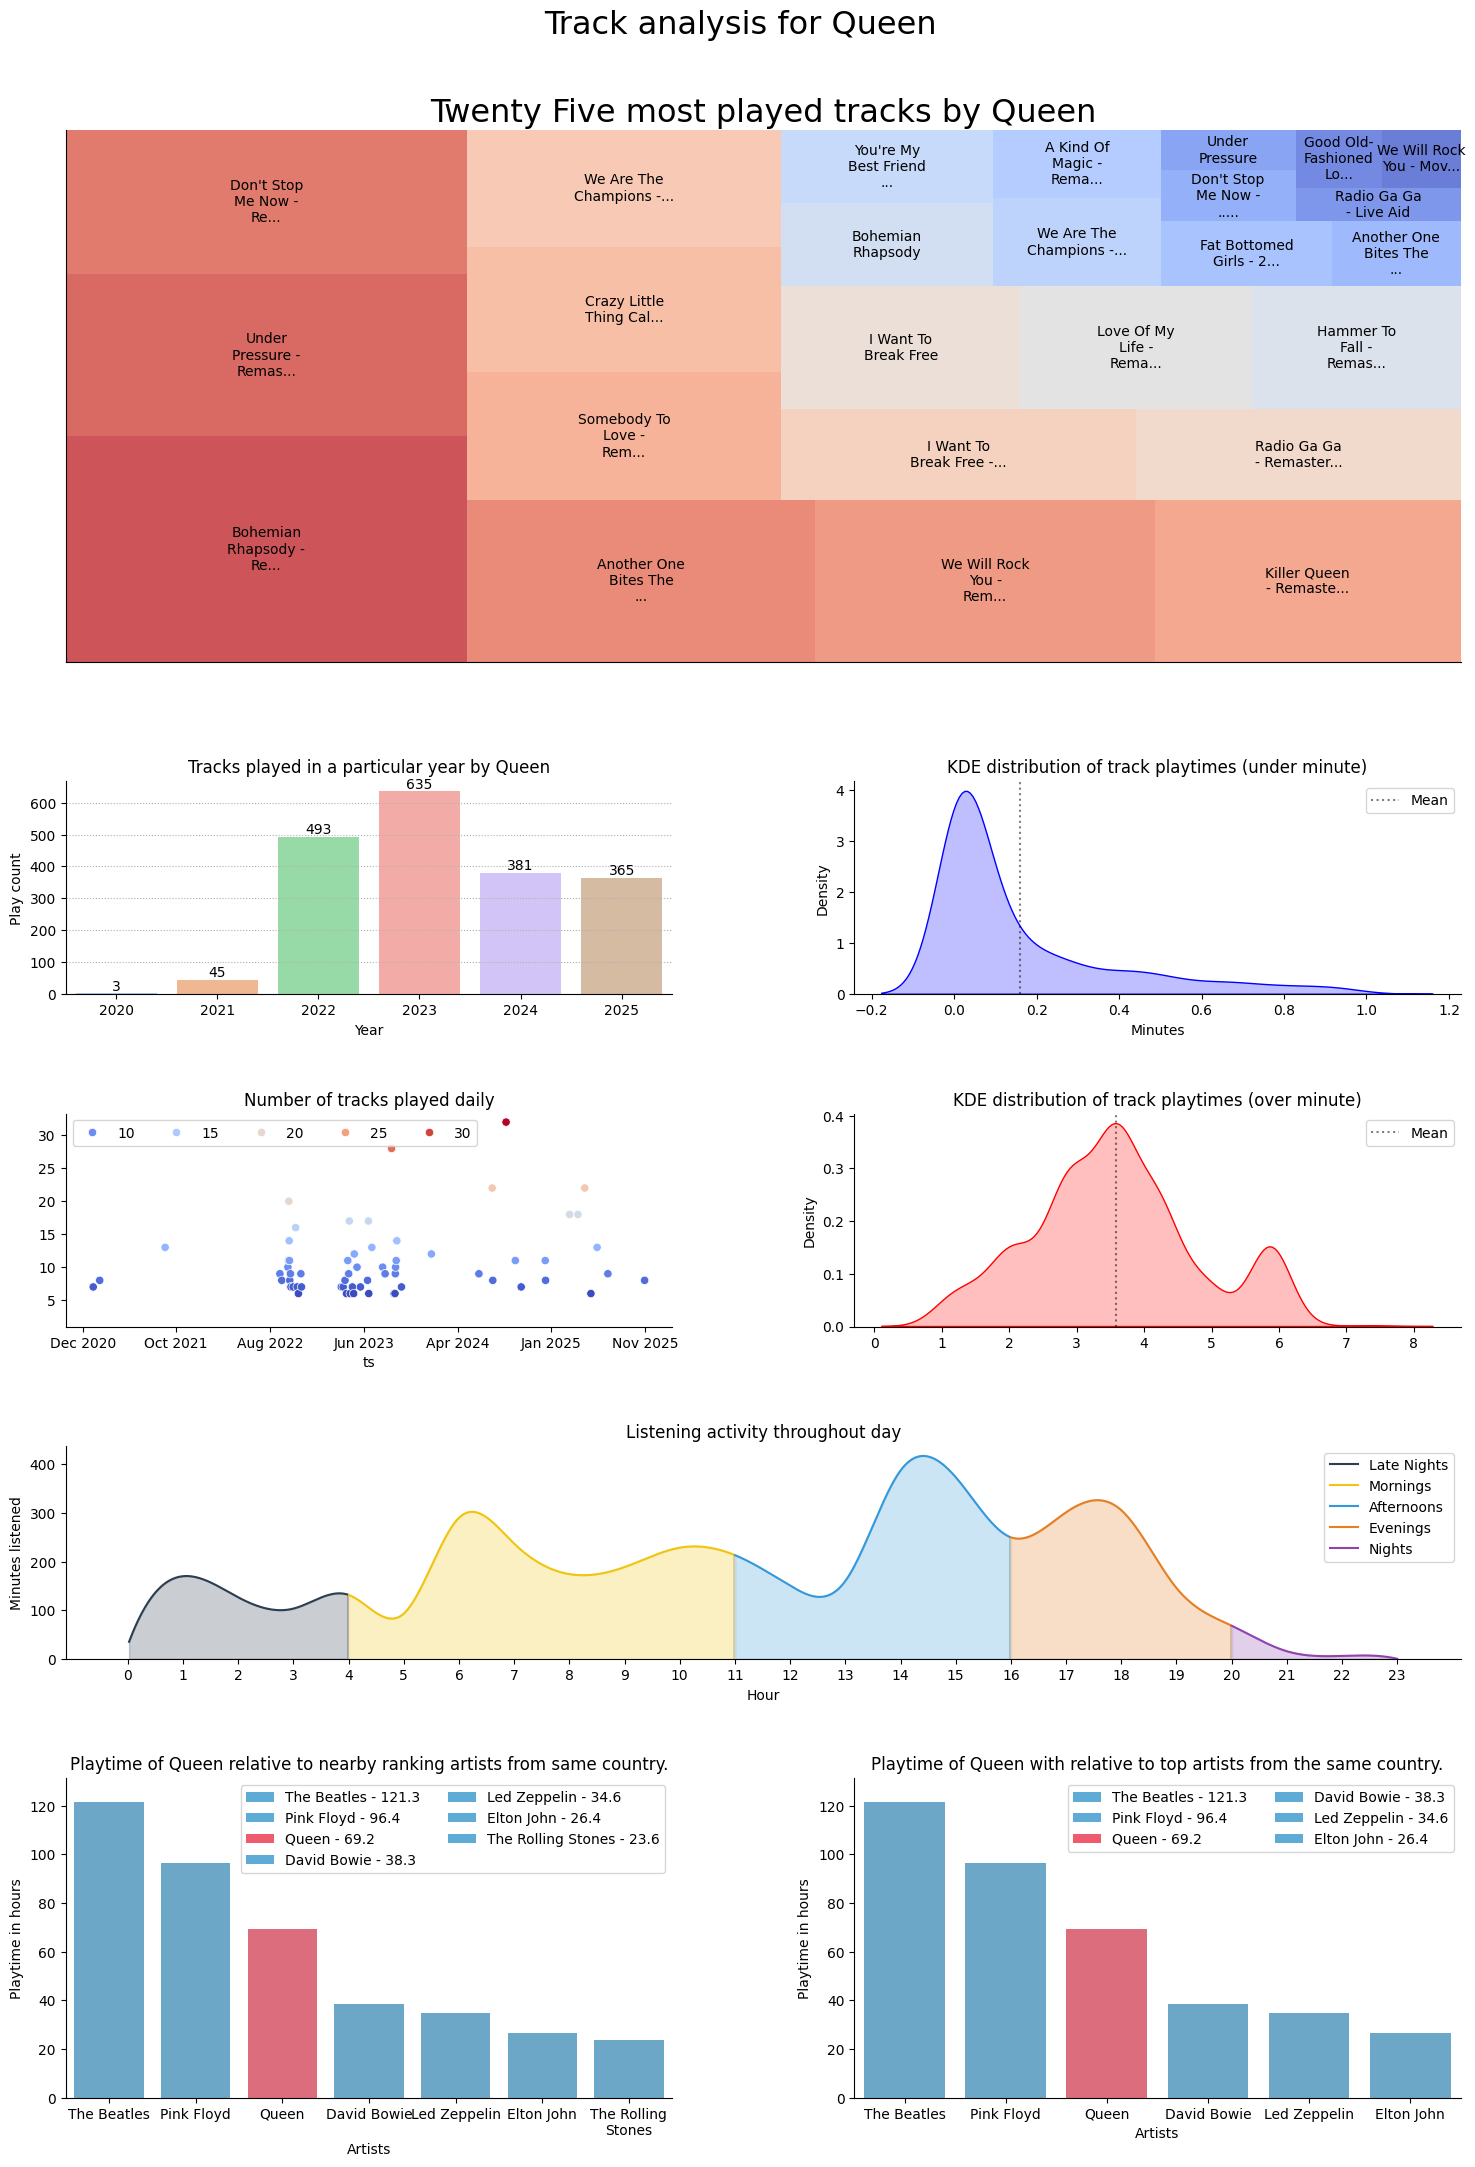


Twenty most played tracks by Eminem
1. Without Me - 65 plays                   2. The Real Slim Shady - 61 plays
3. Lose Yourself - 54 plays                4. Mockingbird - 52 plays
5. Houdini - 46 plays                      6. Stan - 42 plays
7. My Name Is - 31 plays                   8. Superman - 29 plays
9. Till I Collapse - 28 plays              10. Rap God - 27 plays
11. Cleanin' Out My Closet - 23 plays      12. The Way I Am - 22 plays
13. Godzilla (feat. Juice WRLD) - 22 plays 14. Business - 21 plays
15. Love The Way You Lie - 21 plays        16. Renaissance - 20 plays
17. Killshot - 19 plays                    18. Bitch Please II - 19 plays
19. Brand New Dance - 18 plays             20. Hailie's Song - 18 plays
21. Habits - 17 plays                      22. Guilty Conscience - 16 plays
23. Fuel - 16 plays                        24. Kill You - 16 plays

Daily tracks analysis for Eminem
First track played on date 2022-09-16
Latest track played on 2025-11-30
You listened an aver

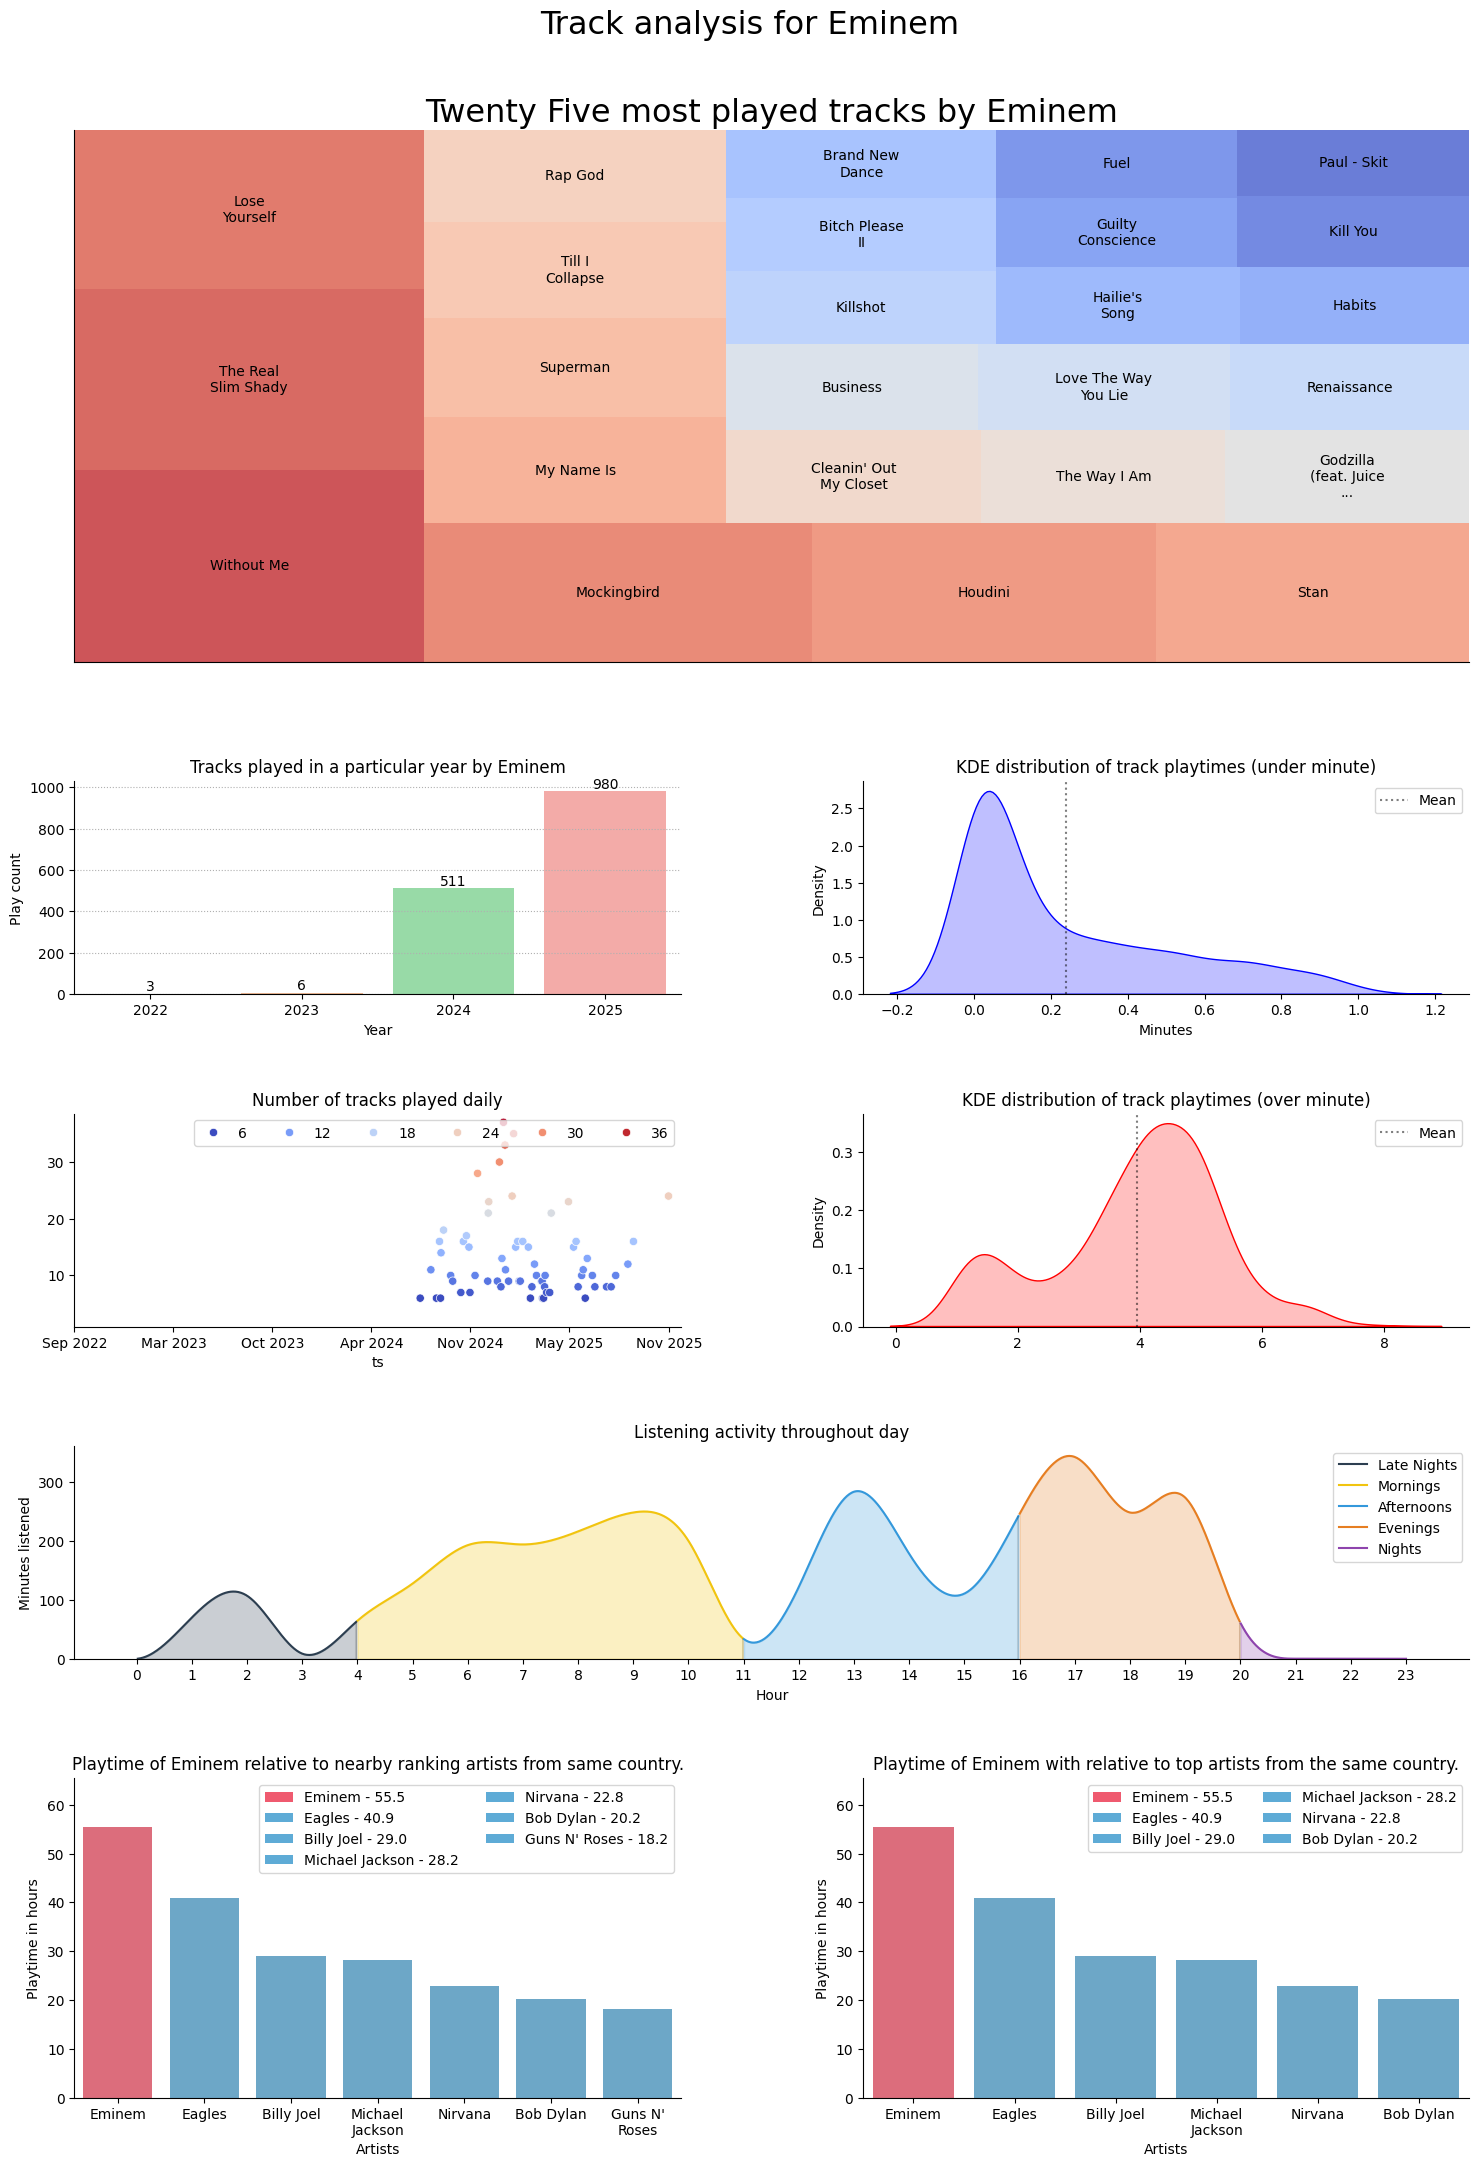


Twenty most played tracks by Kishore Kumar
1. Pal Pal Dil Ke Paas - From "Blackmail" - 72 plays        2. Ek Ajnabee Haseena Se - 62 plays
3. Yeh Sham Mastani - 43 plays                              4. Chhu Kar Mere Manko - From "Yaarana" - 41 plays
5. Yeh Raaten Yeh Mausam - 25 plays                         6. Dilbar Mere - From "Satte Pe Satta" - 25 plays
7. Aa Chal Ke Tujhe - 20 plays                              8. Intaha Ho Gai Intezar Ki - 20 plays
9. Pyar Hamen Kis Mod Pe - From "Satte Pe Satta" - 19 plays 10. Kuchh To Log Kahenge - 18 plays
11. Mere Mehboob Qayamat Hogi - 18 plays                    12. Kishore Kumar Speaks And O Mere Dil Ke Chain (Film - Mere Jeevan Saathi) - 16 plays
13. Roop Tera Mastana - 16 plays                            14. Yeh Vaada Raha - From "Yeh Vaada Raha" - 15 plays
15. Aap Ki Ankhon Mein Kuch - 15 plays                      16. Phoolon Ke Rang Se - 15 plays
17. Mere Samnewali Khidki Mein - 14 plays                   18. Meri Bheegi Bheegi Si - 

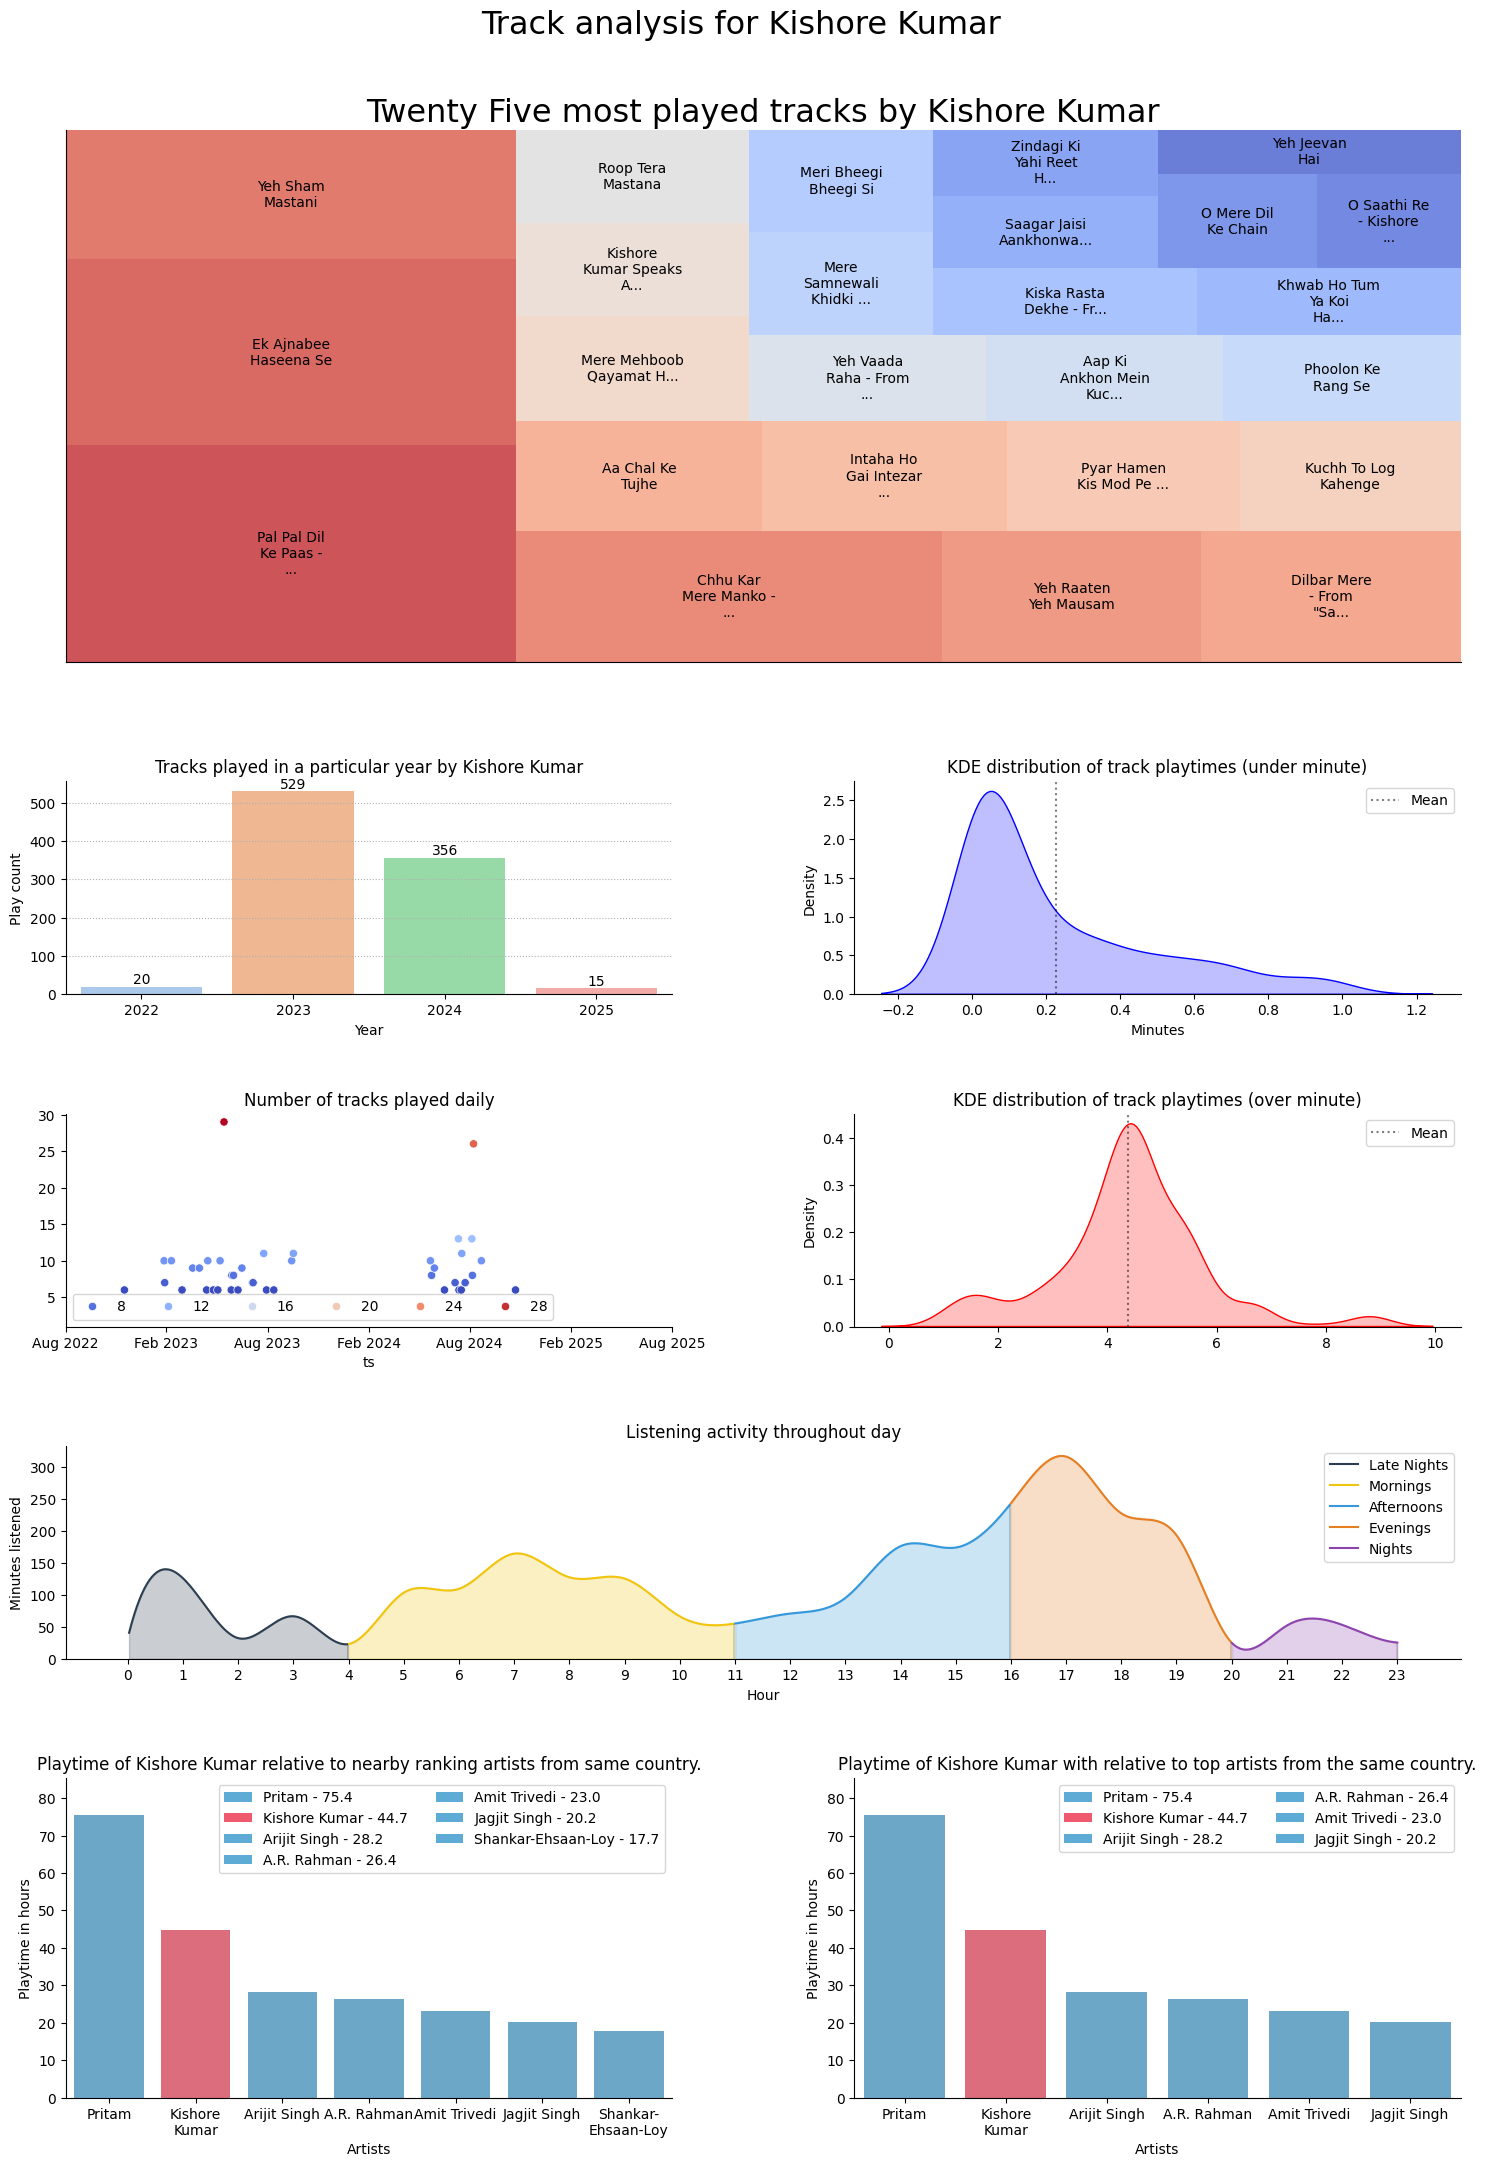


Twenty most played tracks by Eagles
1. Hotel California - 2013 Remaster - 163 plays               2. Take It Easy - 2013 Remaster - 60 plays
3. New Kid in Town - 2013 Remaster - 49 plays                 4. Desperado - 2013 Remaster - 45 plays
5. Life in the Fast Lane - 2013 Remaster - 39 plays           6. Love Will Keep Us Alive - 33 plays
7. Tequila Sunrise - 2013 Remaster - 31 plays                 8. Lyin' Eyes - 2013 Remaster - 31 plays
9. One of These Nights - 2013 Remaster - 31 plays             10. I Can't Tell You Why - 2013 Remaster - 25 plays
11. Peaceful Easy Feeling - 2013 Remaster - 23 plays          12. The Best of My Love - 2013 Remaster - 19 plays
13. Witchy Woman - 2013 Remaster - 19 plays                   14. Wasted Time - 2013 Remaster - 17 plays
15. Hotel California - Live On MTV, 1994 - 15 plays           16. Journey of the Sorcerer - 2013 Remaster - 15 plays
17. Victim of Love - 2013 Remaster - 14 plays                 18. Take It to the Limit - 2013 Remaster -

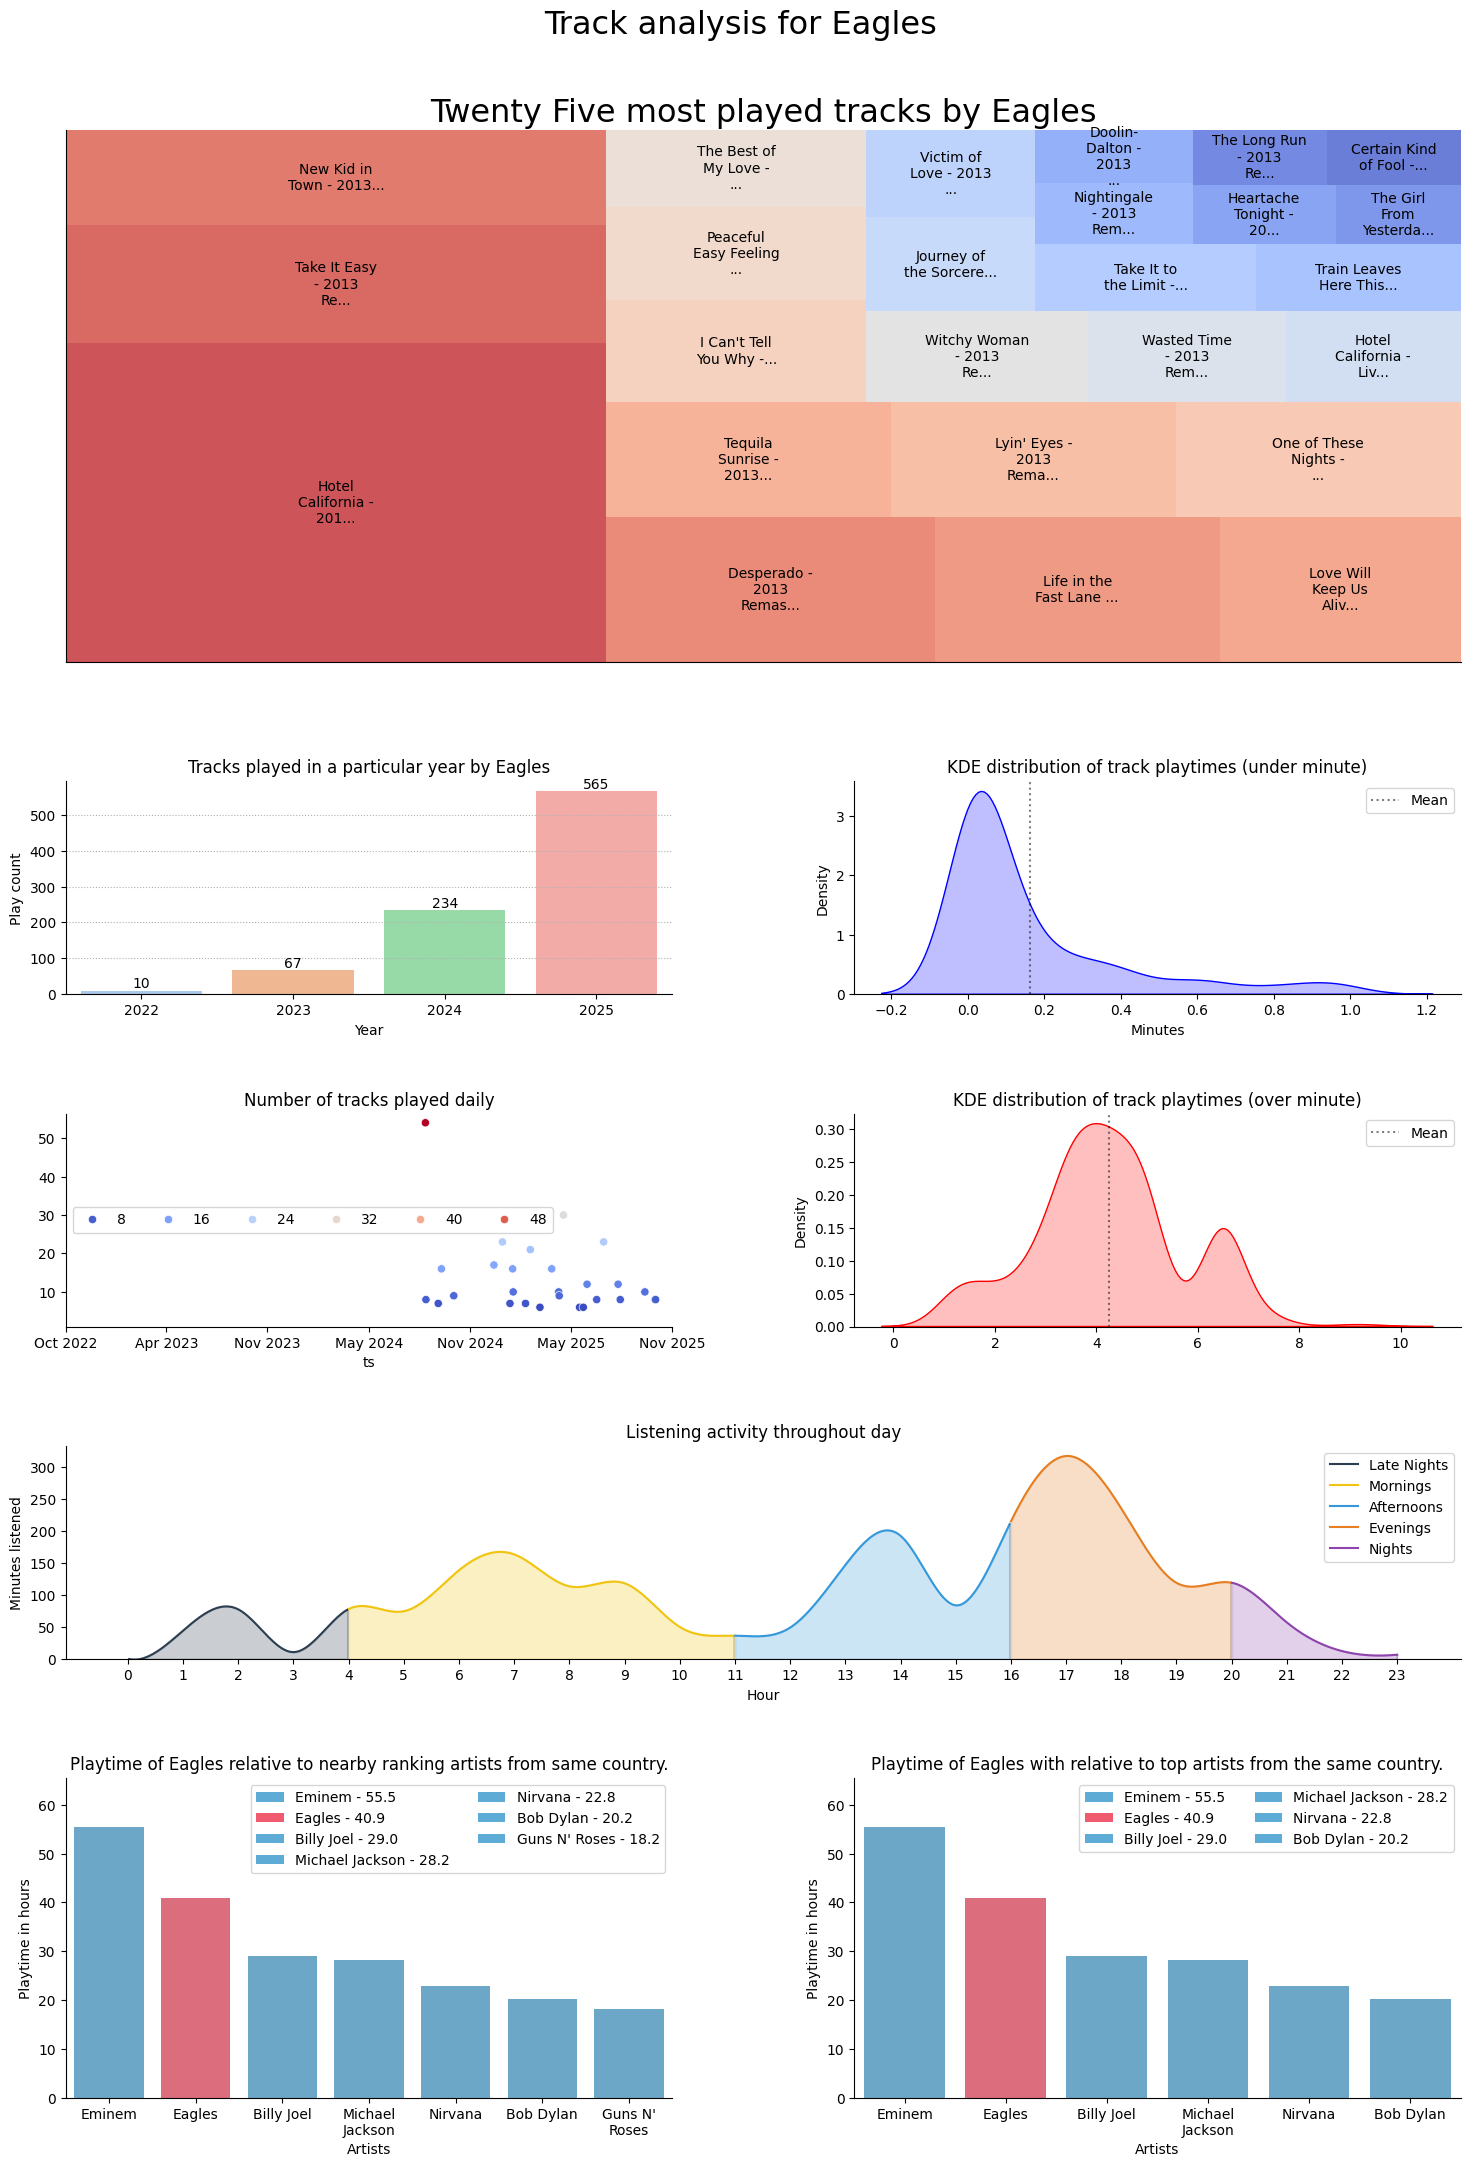


Twenty most played tracks by David Bowie
1. Space Oddity - 2015 Remaster - 56 plays               2. Heroes - 2017 Remaster - 46 plays
3. Starman - 2012 Remaster - 46 plays                    4. Life on Mars? - 2015 Remaster - 37 plays
5. Changes - 2015 Remaster - 37 plays                    6. Ziggy Stardust - 2012 Remaster - 32 plays
7. The Man Who Sold the World - 2015 Remaster - 29 plays 8. Rebel Rebel - 2016 Remaster - 27 plays
9. Let's Dance - 2018 Remaster - 20 plays                10. Moonage Daydream - 2012 Remaster - 18 plays
11. Oh! You Pretty Things - 2015 Remaster - 18 plays     12. Fame - 2016 Remaster - 17 plays
13. Five Years - 2012 Remaster - 17 plays                14. Ashes to Ashes - 2017 Remaster - 16 plays
15. Lazarus - 16 plays                                   16. Kooks - 2015 Remaster - 15 plays
17. ★ - 14 plays                                         18. Sound and Vision - 2017 Remaster - 13 plays
19. Rock 'n' Roll Suicide - 2012 Remaster - 13 plays     20. Y

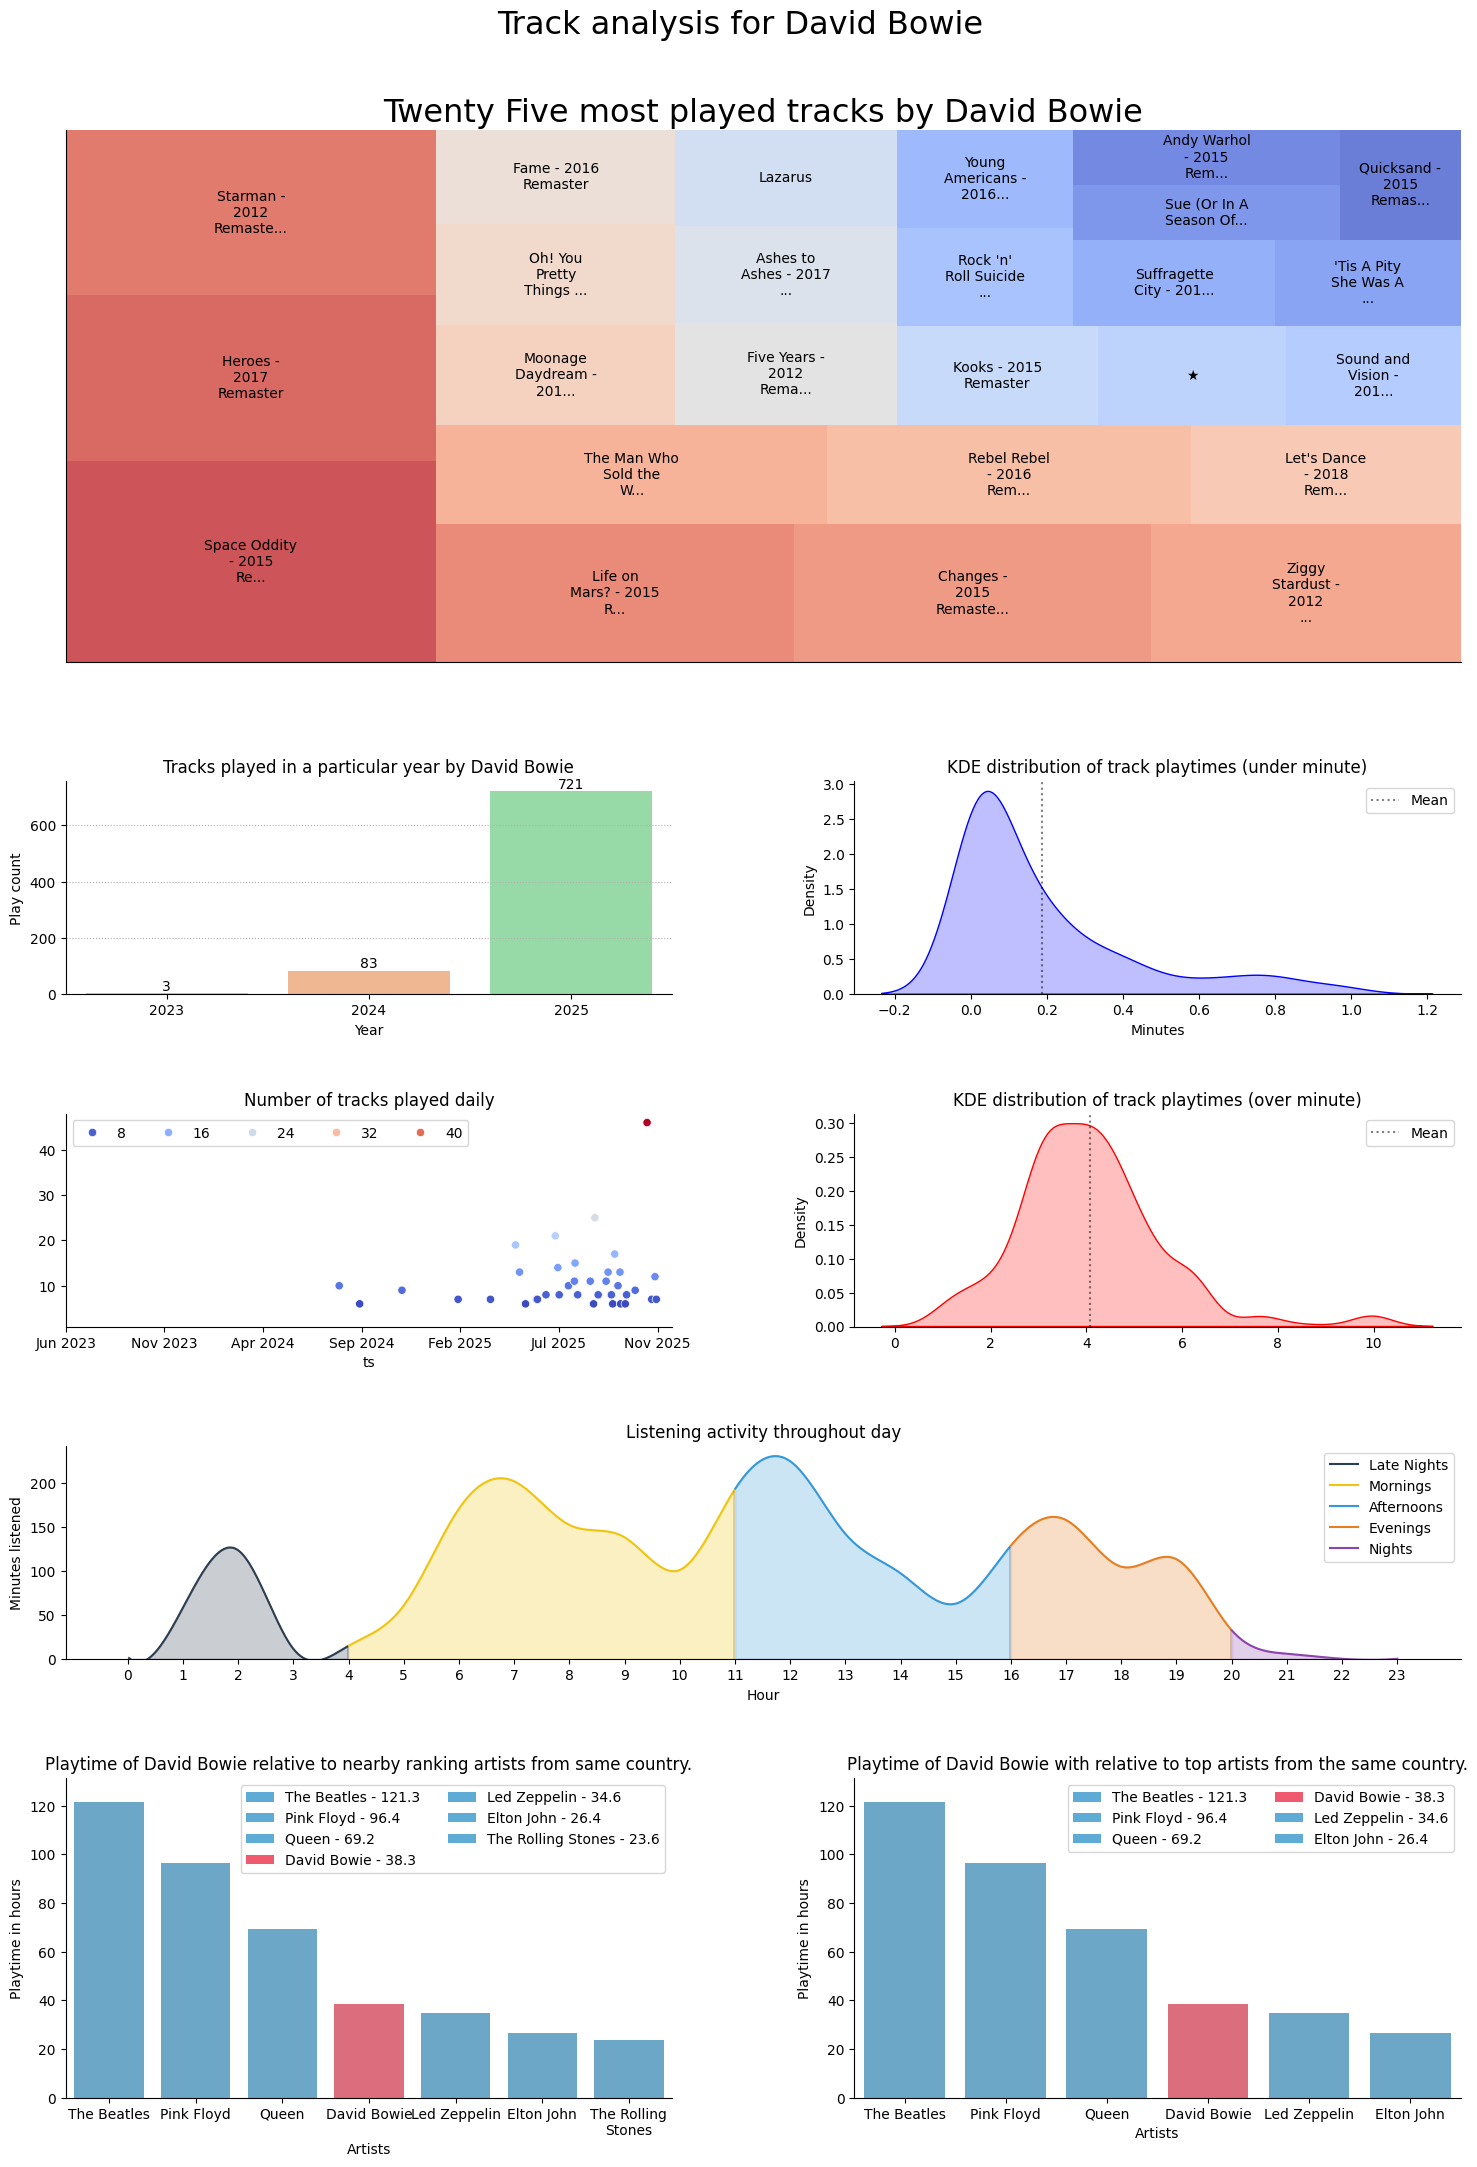


Twenty most played tracks by Led Zeppelin
1. Stairway to Heaven - Remaster - 112 plays            2. Immigrant Song - Remaster - 55 plays
3. Whole Lotta Love - 1990 Remaster - 41 plays          4. Kashmir - Remaster - 28 plays
5. All My Love - Remaster - 24 plays                    6. Black Dog - Remaster - 24 plays
7. Heartbreaker - 1990 Remaster - 23 plays              8. Good Times Bad Times - 1993 Remaster - 22 plays
9. Going to California - Remaster - 20 plays            10. Tangerine - Remaster - 19 plays
11. Babe I'm Gonna Leave You - 1990 Remaster - 19 plays 12. Dazed and Confused - 1990 Remaster - 17 plays
13. Black Mountain Side - 1993 Remaster - 15 plays      14. The Rain Song - Remaster - 15 plays
15. Rock and Roll - Remaster - 14 plays                 16. Since I've Been Loving You - Remaster - 14 plays
17. When the Levee Breaks - Remaster - 14 plays         18. Ramble On - 1990 Remaster - 13 plays
19. Moby Dick - 11 plays                                20. Over the Hills

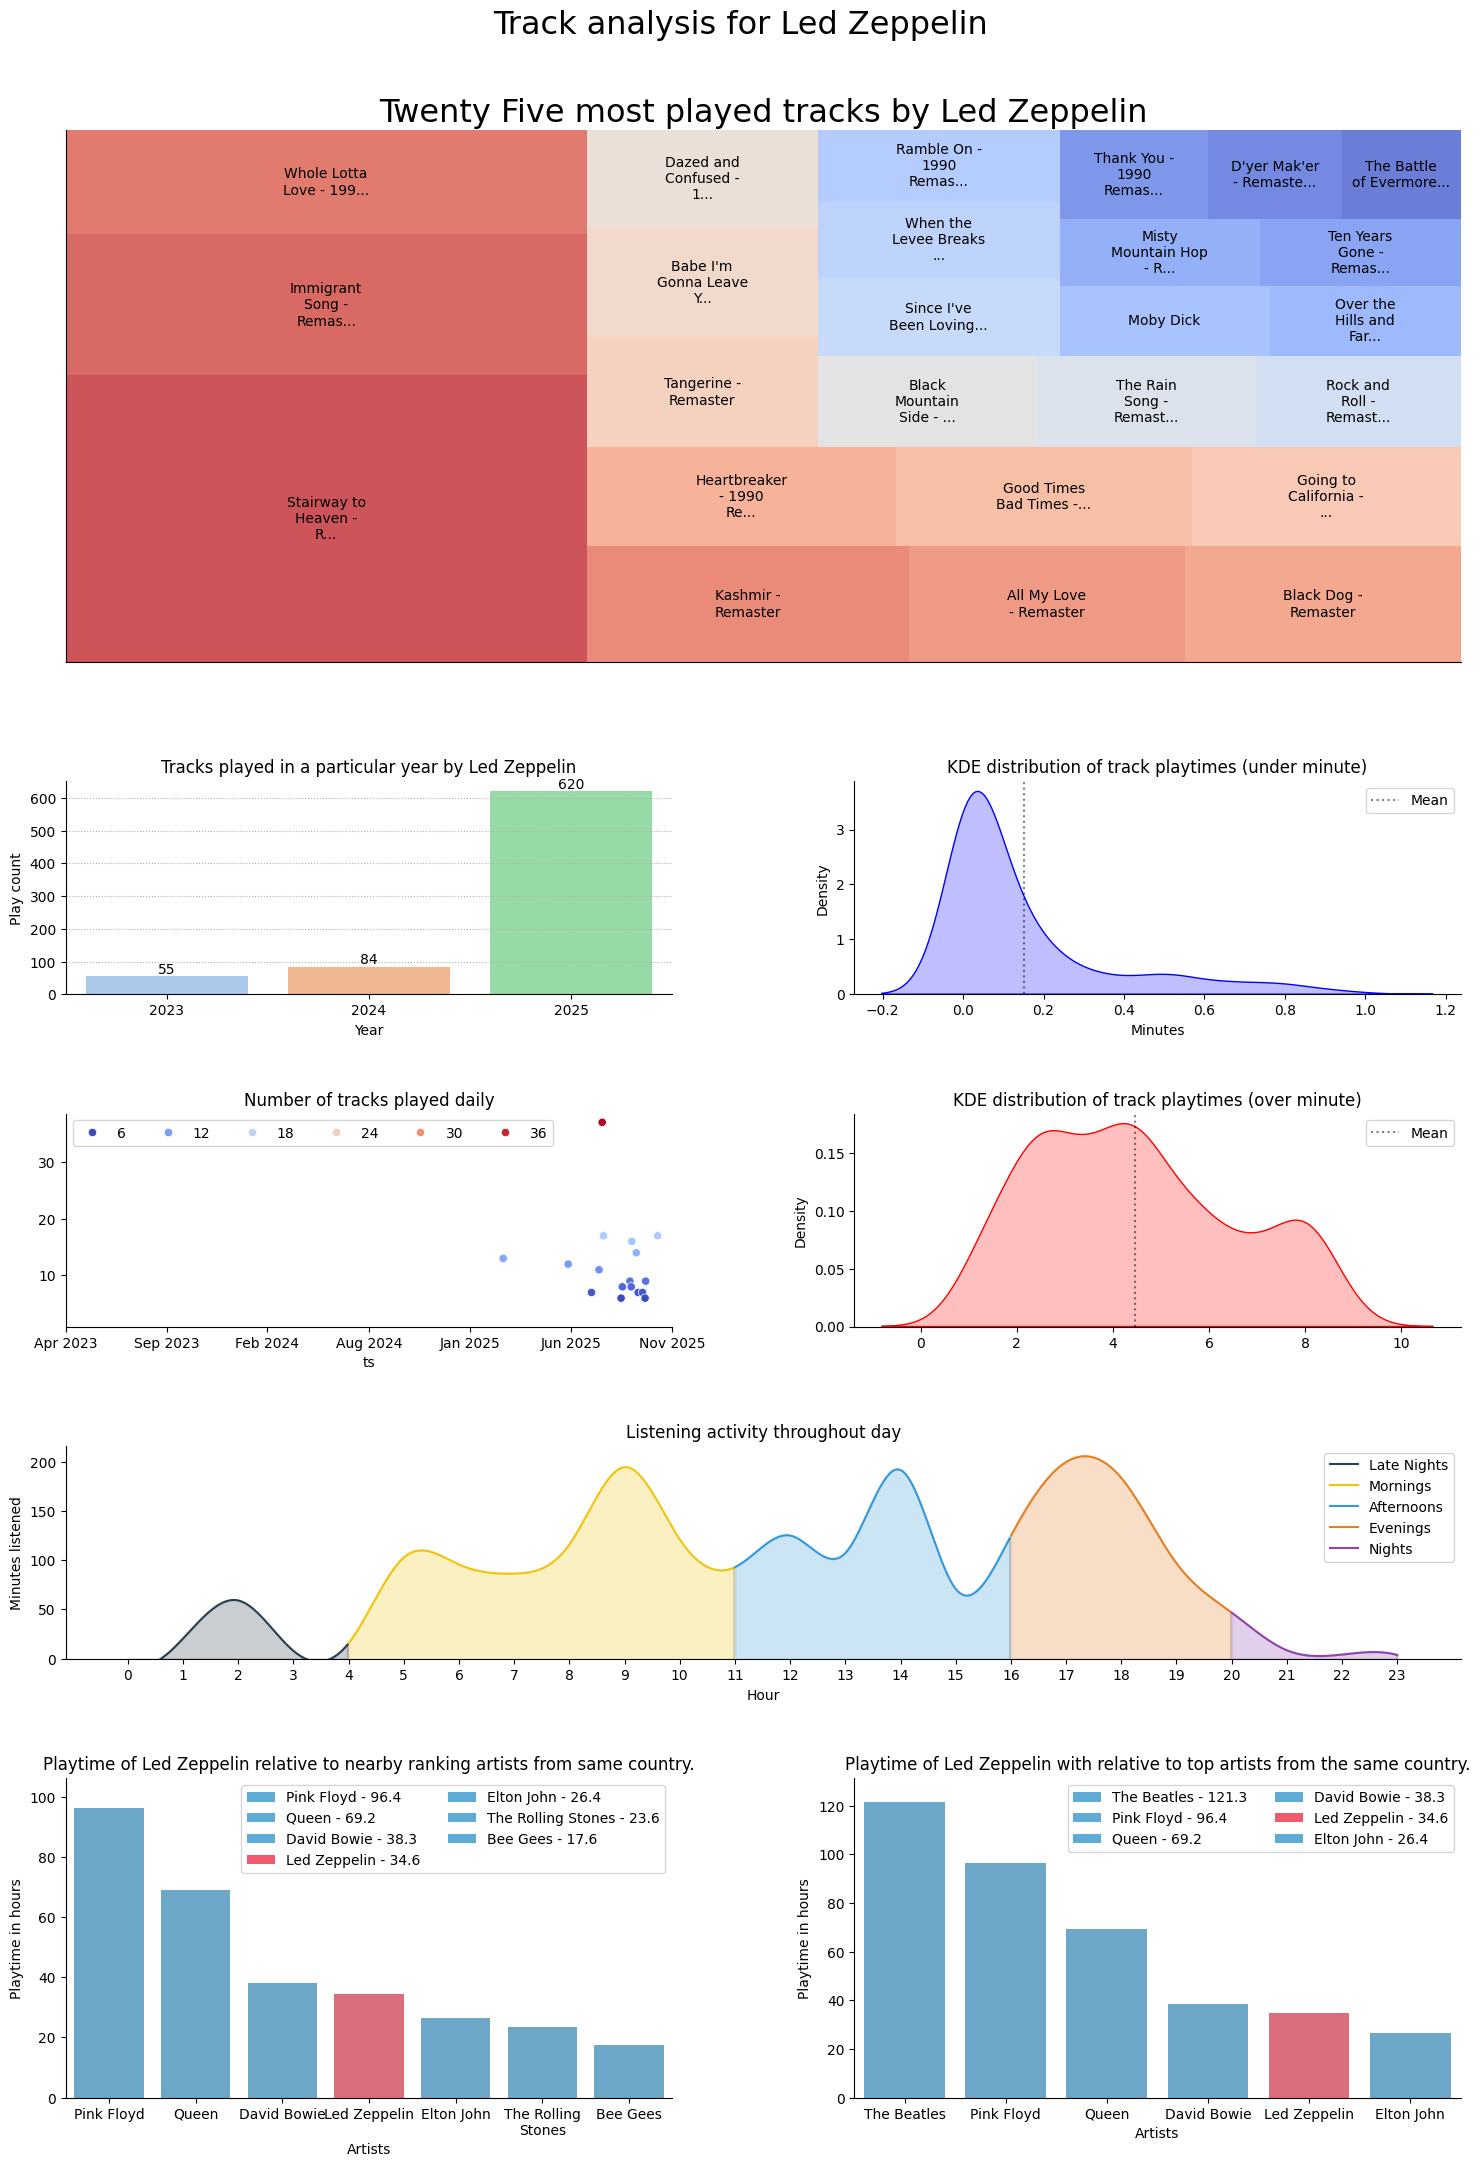


Twenty most played tracks by Billy Joel
1. She's Always a Woman - 74 plays           2. Vienna - 63 plays
3. Uptown Girl - 62 plays                    4. Piano Man - 55 plays
5. My Life - 44 plays                        6. Just the Way You Are - 29 plays
7. Movin' Out (Anthony's Song) - 25 plays    8. Only the Good Die Young - 20 plays
9. We Didn't Start the Fire - 18 plays       10. The Stranger - 17 plays
11. Honesty - 17 plays                       12. It's Still Rock and Roll to Me - 16 plays
13. Don't Ask Me Why - 15 plays              14. New York State of Mind - 15 plays
15. Big Shot - 12 plays                      16. Scenes from an Italian Restaurant - 12 plays
17. All for Leyna - 8 plays                  18. Zanzibar - 7 plays
19. You May Be Right - 7 plays               20. Sleeping With the Television On - 6 plays
21. C'etait toi (You Were the One) - 6 plays 22. Get It Right the First Time - 6 plays
23. I Don't Want to Be Alone - 6 plays       24. Travelin' Prayer - 6 play

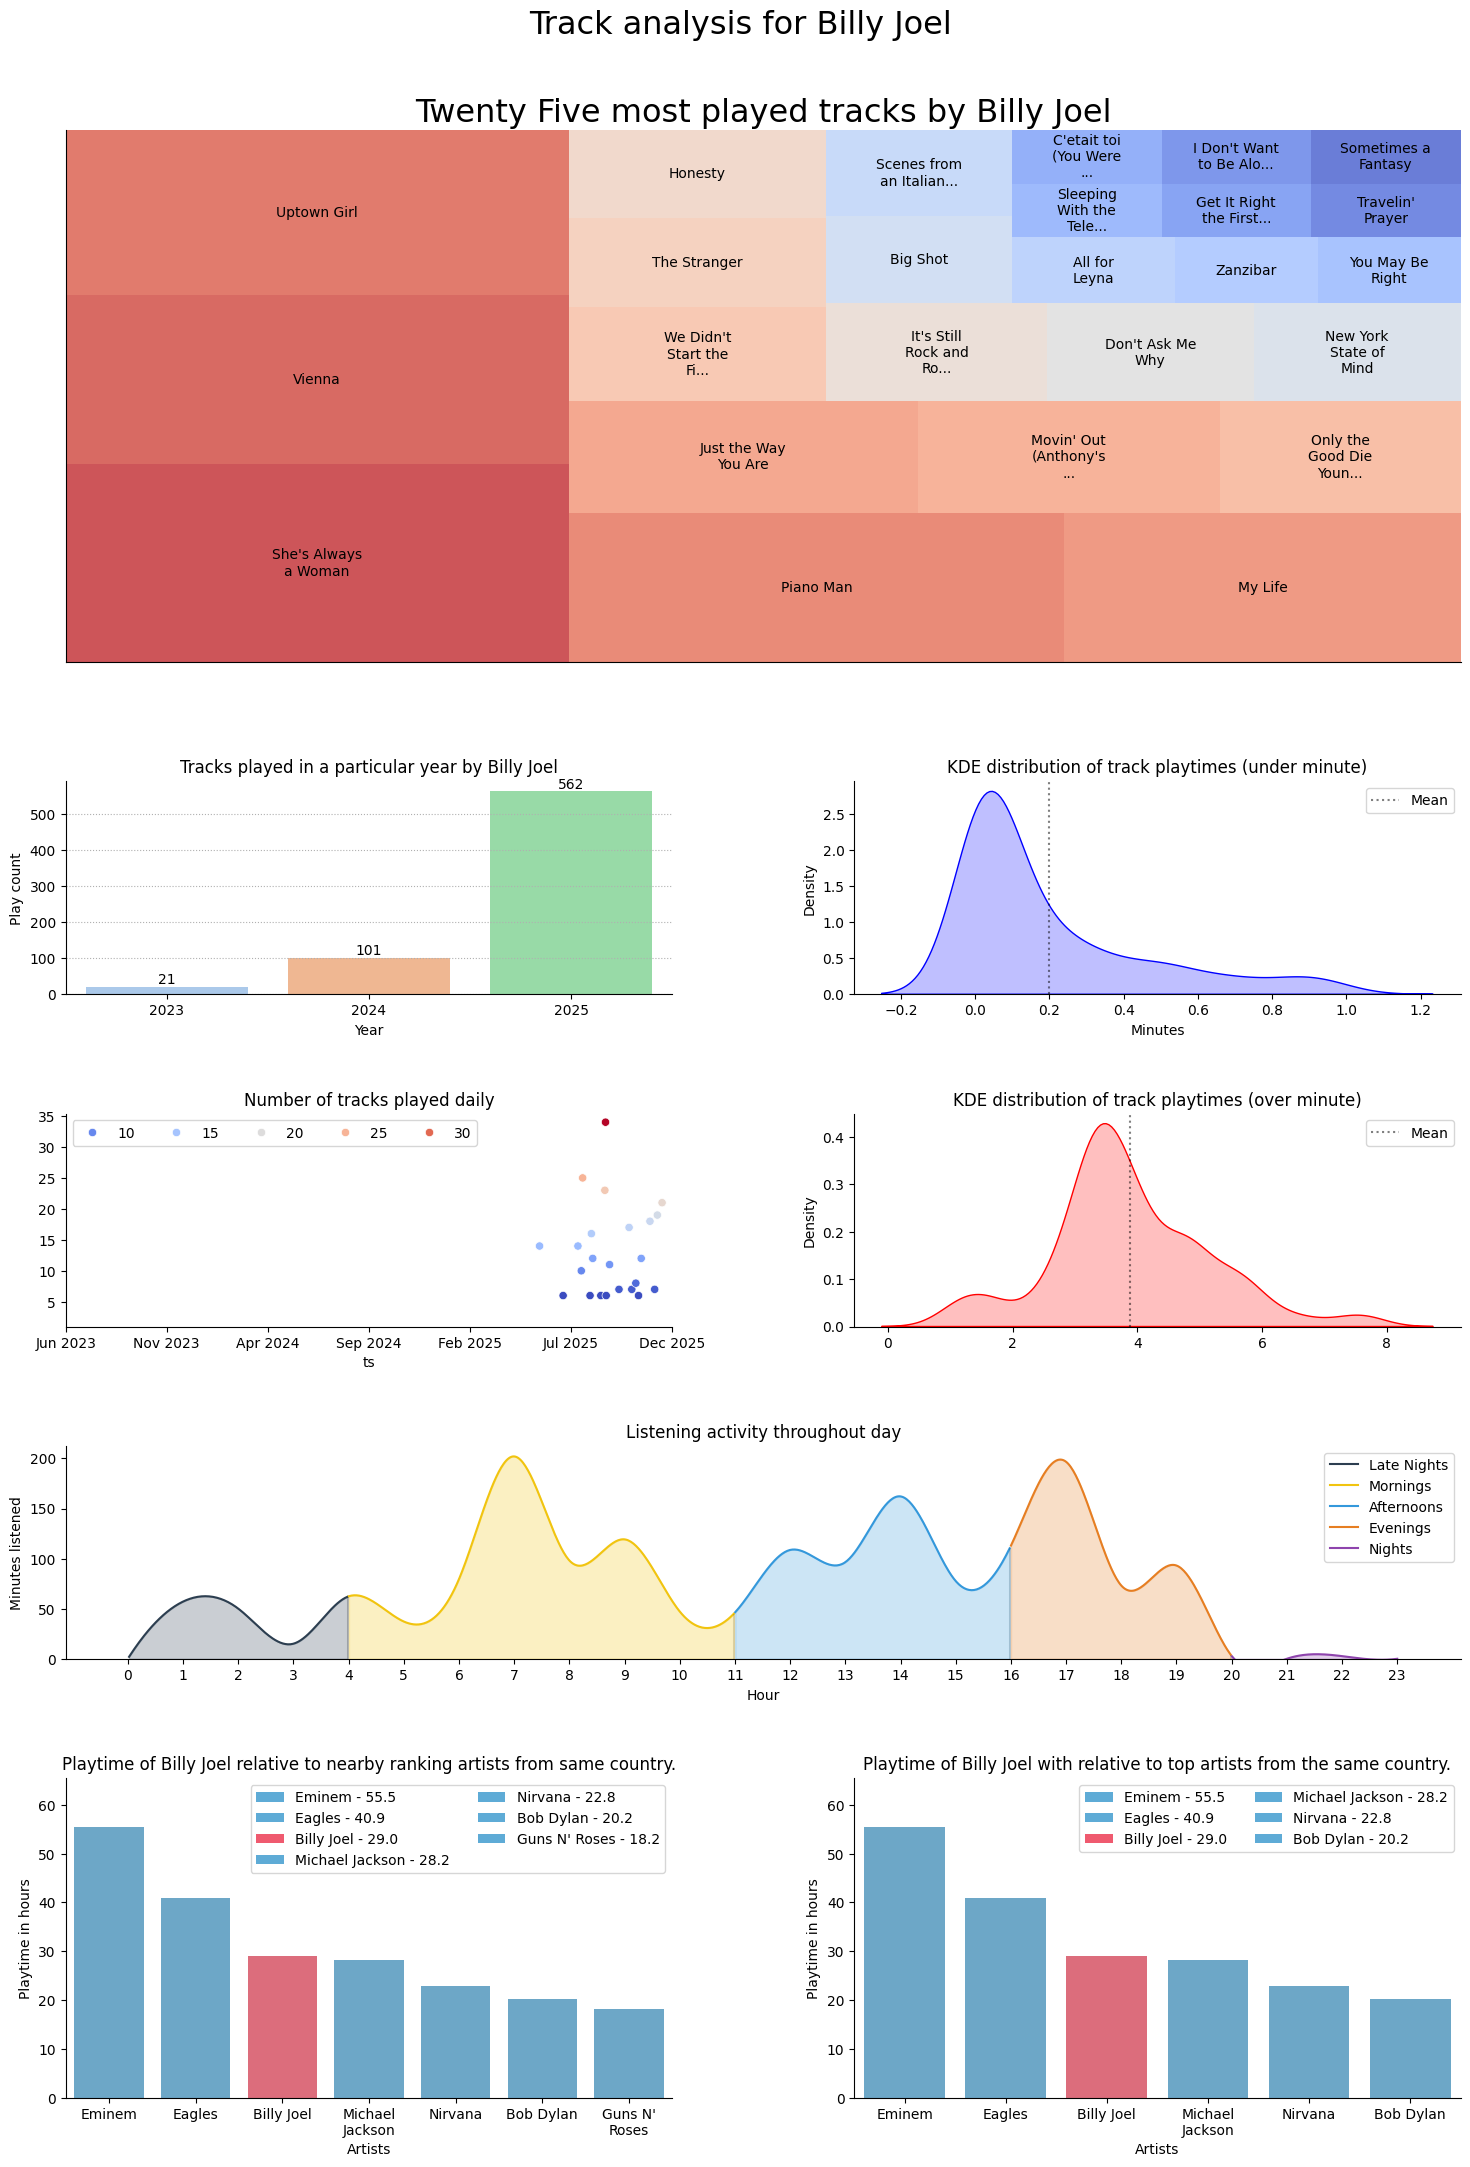


What do you want to do ??
(1) Display top artist analysis for top artists
(2) Display analysis for custom artist
(*) Exit
 2
Input the name of the artist:  Frank Zappa


Input the name of the artist: Frank Zappa
Showing analysis for Frank Zappa
Twenty most played tracks by Frank Zappa
1. Uncle Remus - 22 plays                       2. Watermelon In Easter Hay - 11 plays
3. Peaches En Regalia - 9 plays                 4. Camarillo Brillo - 6 plays
5. Sexual Harassment In The Workplace - 6 plays 6. Willie The Pimp - 6 plays
7. Why Does It Hurt When I Pee? - 5 plays       8. Bobby Brown Goes Down - 5 plays
9. Broken Hearts Are For Assholes - 4 plays     10. Flakes - 4 plays
11. Apostrophe' - 4 plays                       12. Black Napkins - 4 plays
13. I'm So Cute - 3 plays                       14. Cosmik Debris - 3 plays
15. Lucille Has Messed My Mind Up - 3 plays     16. Catholic Girls - 2 plays
17. Dancin' Fool - 2 plays                      18. Scrutinizer Postlude - 2 plays
19. Sy Borg - 2 plays                           20. I Have Been In You - 2 plays
21. I'm The Slime - 2 plays                     22. Inca Roads - 2 plays
23. Don't Eat The Yellow

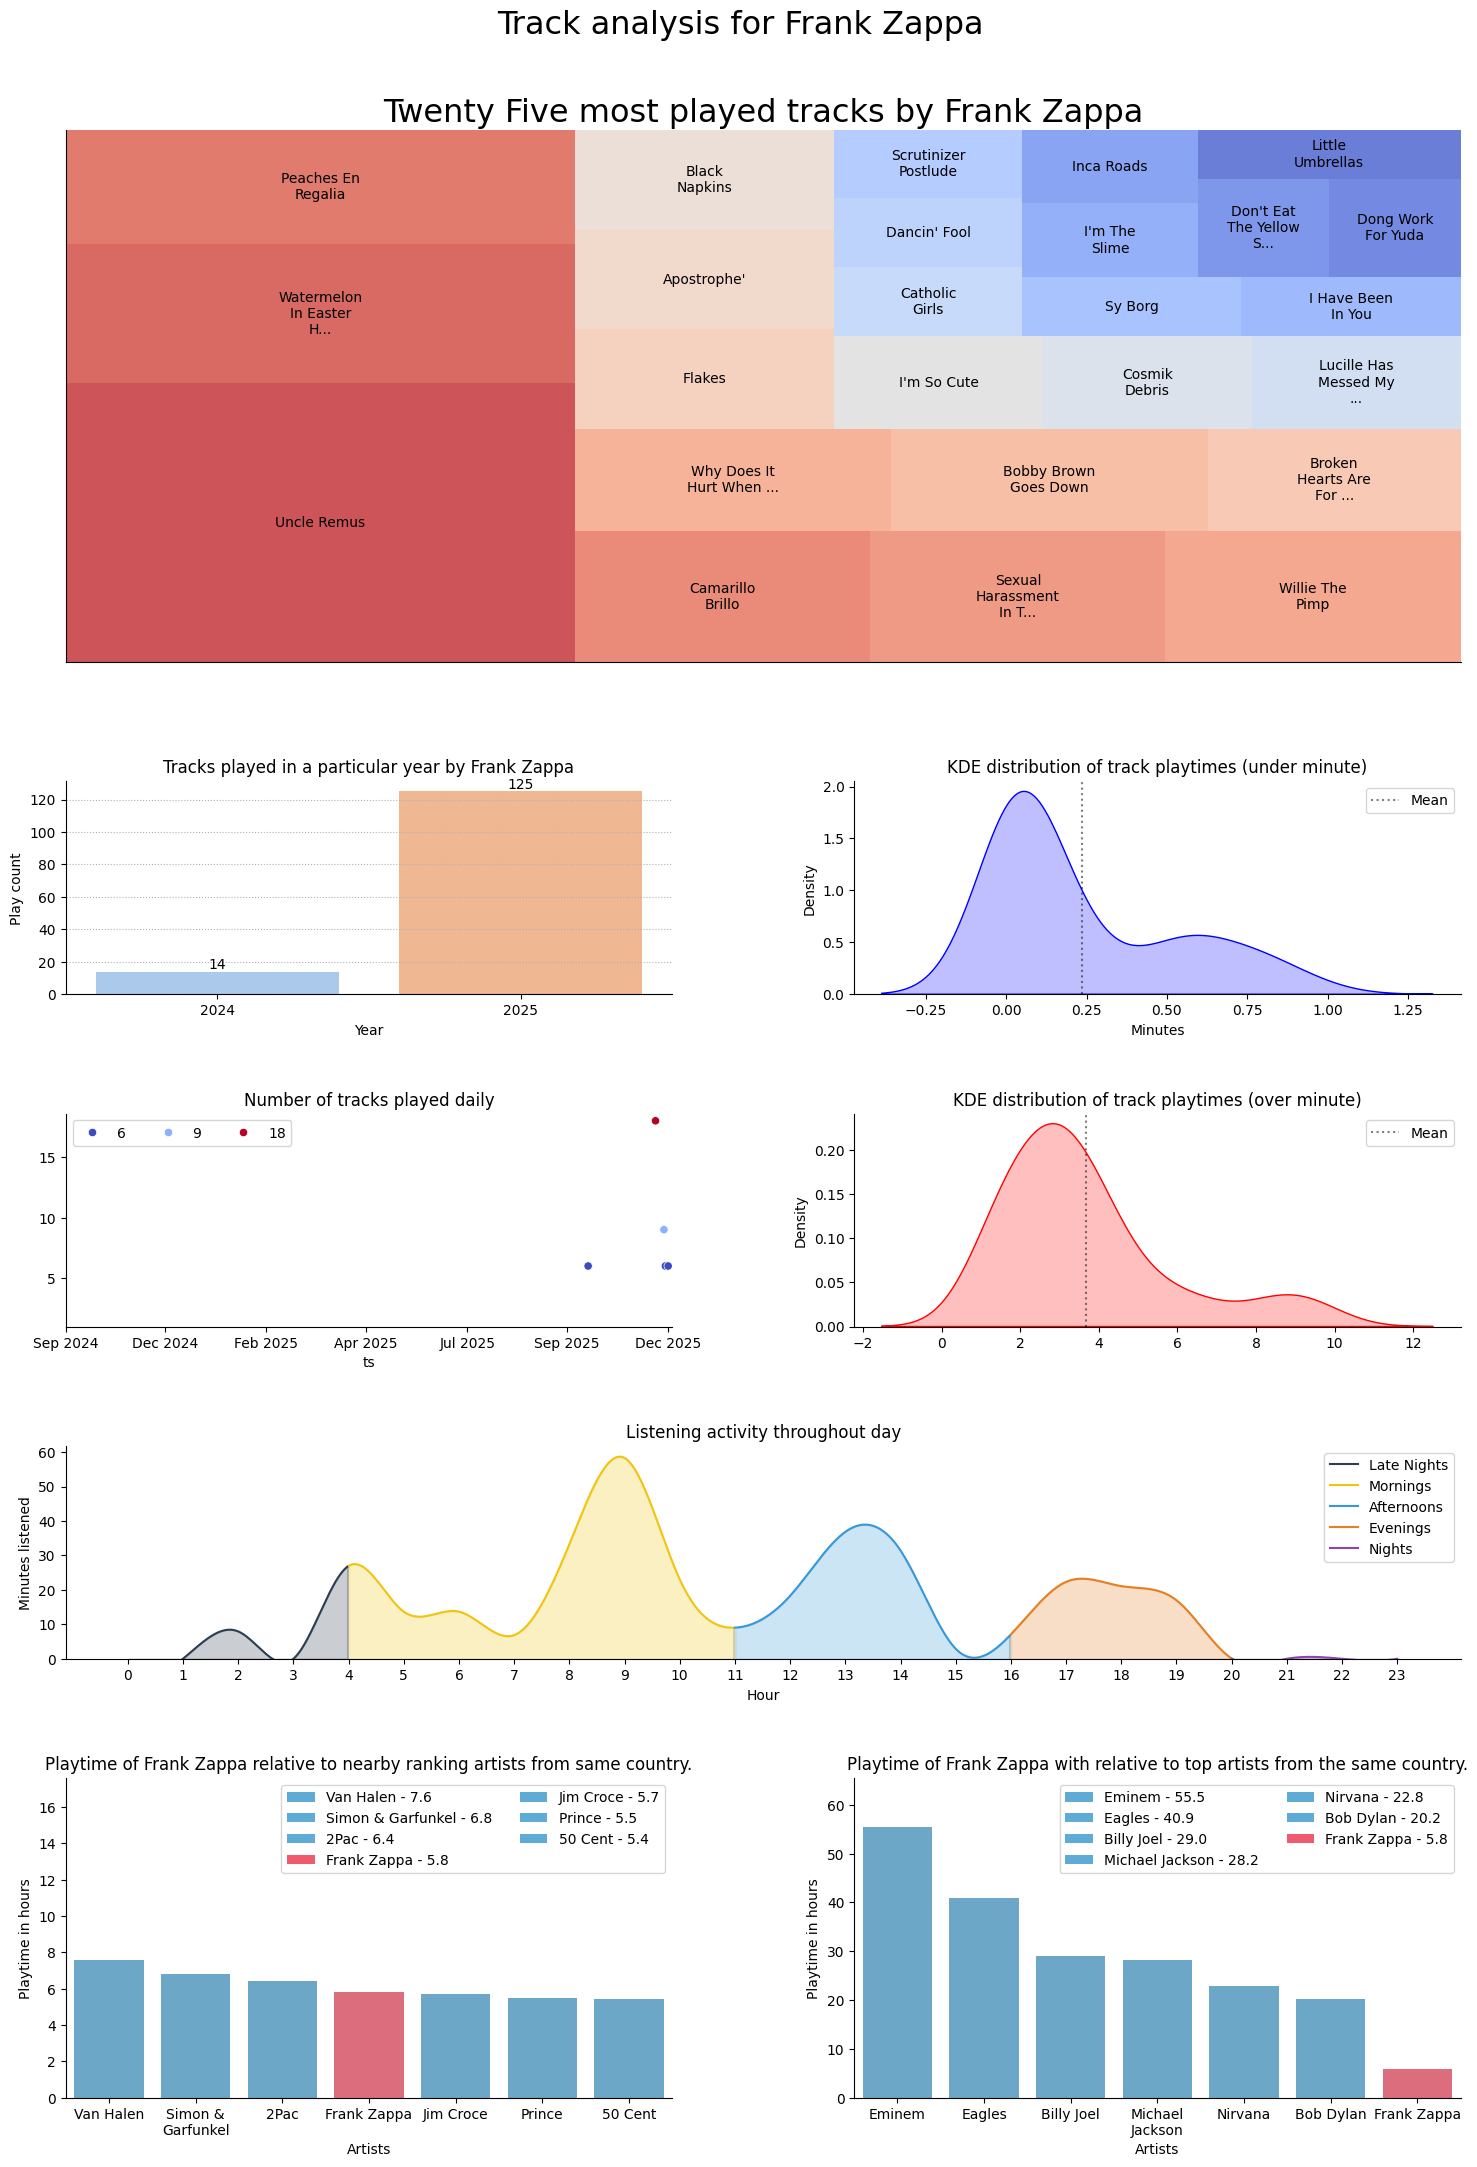


What do you want to do ??
(1) Display top artist analysis for top artists
(2) Display analysis for custom artist
(*) Exit
 2
Input the name of the artist:  Bob dylan


Input the name of the artist: Bob dylan
Found 4 matches, select the number for which one to choose
1. Bob Dylan 2. Dylan
3. LANY      4. nan


Artist index:  1


Showing analysis for Bob Dylan
Twenty most played tracks by Bob Dylan
1. Knockin' On Heaven's Door - 65 plays   2. Blowin' in the Wind - 44 plays
3. Like a Rolling Stone - 40 plays        4. Don't Think Twice, It's All Right - 31 plays
5. Hurricane - 27 plays                   6. The Times They Are A-Changin' - 25 plays
7. Girl from the North Country - 21 plays 8. Mr. Tambourine Man - 18 plays
9. Highway 61 Revisited - 14 plays        10. Lay, Lady, Lay - 13 plays
11. Masters of War - 13 plays             12. The Man in Me - 13 plays
13. A Hard Rain's A-Gonna Fall - 12 plays 14. Song to Woody - 9 plays
15. Down the Highway - 8 plays            16. Subterranean Homesick Blues - 8 plays
17. All Along the Watchtower - 8 plays    18. Bob Dylan's Blues - 7 plays
19. Tangled up in Blue - 7 plays          20. Bob Dylan's Dream - 6 plays
21. Desolation Row - 5 plays              22. Tombstone Blues - 5 plays
23. Ballad of a Thin Man - 5 plays        24. It's All Over Now, Baby Blue - 5 plays



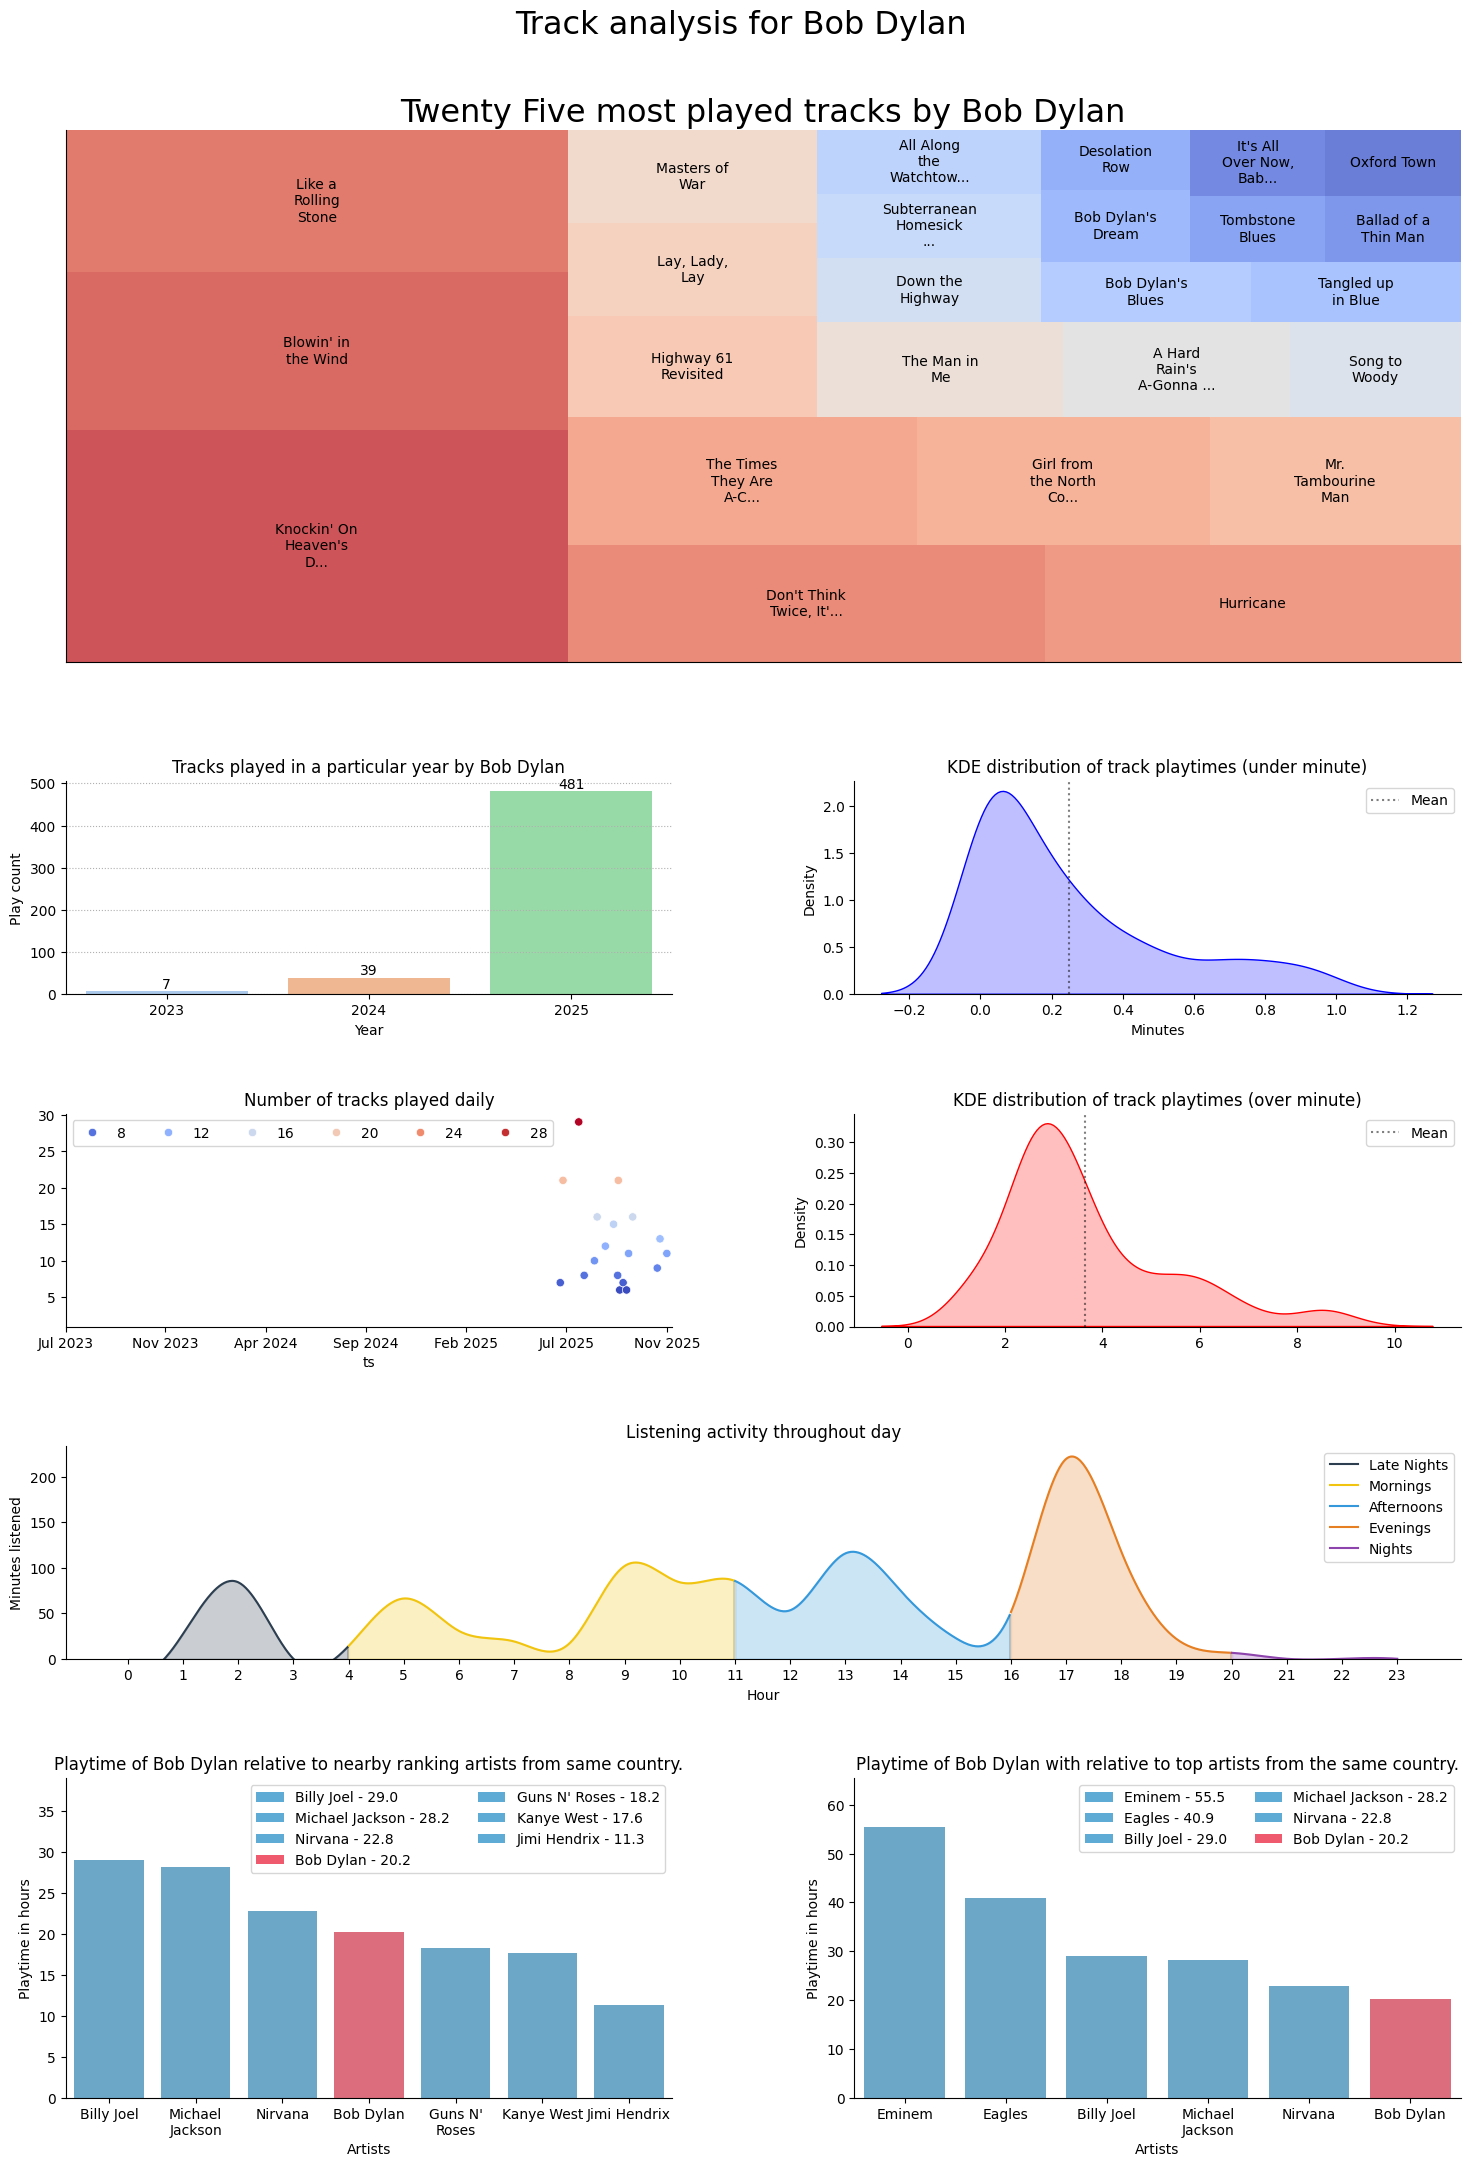


What do you want to do ??
(1) Display top artist analysis for top artists
(2) Display analysis for custom artist
(*) Exit
 3


Exiting!!


In [9]:
interactive_per_artist_analysis(df, artists_df)

## Exporting 

This jupyter notebook is converted into a ready to print html saved at /build/project.html

In [10]:
%run ./scripts/export.py

[NbConvertApp] Converting notebook project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 4088162 bytes to build/index.html


In [11]:
%run ./utils/jupyter_configs/loadcell.py
%run ./utils/jupyter_configs/imagestyling.py

## Source code

All source files required for this project compiled into one single cell. Does not include any of the external data.

Source code best viewed directly on the repo.

In [12]:
%%capture
# ^Catch all the output of this cell

# Run the script to compile all python files
%run ./scripts/bake.py

# Paste the content of the compiled file into this cell
%loadnext ./build/built.pie

# This raises error but also prevents running this cell :)
raise SystemError


# /home/divij/coding/repos/spotify-data-analysis-master/utils/series_textellipses.py 


from pandas import Series


# Clips and appends ellipses (...) for string values in series greater than characters
def index_ellipses(ser: Series, characters: int):
    # if ser.dtype != "O":
    #     raise ValueError("Can only pass series with strings")

    indexes: list[str] = list(ser.index.copy(deep=True))
    for idx in range(len(indexes)):
        if len(indexes[idx]) > characters:
            indexes[idx] = indexes[idx][:characters] + "..."

    ser.index = indexes



# /home/divij/coding/repos/spotify-data-analysis-master/utils/fuzzy_searchers.py 


# Fuzzy searching artists / track name
from typing import Literal

import pandas as pd
from rapidfuzz import fuzz


# Fuzzy searcher searches for given word in a series, dataframe, or list of strings
# and return the closest matches sorted in descending order of confidence
# For searching within single worded sequences prefer partial ratio (example for artist names)
# and for multi word sequences prefer token set ratio (example Track names)
def fuzzy_search(
    phrase: str,
    sequence: pd.DataFrame | pd.Series | list[str],
    _search_type: Literal["partial ratio", "token set ratio"],
    *,
    confidence: int = 80,
    col_name: str | None = None,
    top_n=5,  # If negative, returns matched words
):
    search_type = 0 if (_search_type == "partial ratio") else 1

    if type(sequence) is pd.DataFrame:
        if col_name is None:
            raise ValueError("Must provide a columnn name to fuzzy search when sequence is a DataFrame")
        data = sequence[col_name].values

    elif type(sequence) is pd.Series:
        if col_name is not None:
            raise ValueError("Cannot provide a col_name if sequence is of type Series")
        data = sequence.values

    elif isinstance(sequence, list):
        data = sequence

    else:
        raise (TypeError(f"Type of sequence must be pd.Series, pd.Dataframe or list[str] and not {type(sequence)}"))

    if not isinstance(sequence[0], str):
        raise (TypeError("Values of sequence can only be of type string"))

    matched = []
    ratios = []
    for value in data:
        if value is not None:
            value = str(value)
            if search_type == 0:
                ratio = fuzz.partial_ratio(phrase.lower(), value.lower())
            else:
                ratio = fuzz.token_set_ratio(phrase.lower(), value.lower())

            if (ratio >= confidence) and (value not in matched):
                matched.append(value)
                ratios.append(ratio)

    results = [
        value
        for value, _ in sorted(
            [(value, ratio) for value, ratio in zip(matched, ratios)],
            key=lambda p: p[1],
            reverse=True,
        )
    ]
    if top_n < 0:
        return results
    else:
        return results[:top_n]



#### /home/divij/coding/repos/spotify-data-analysis-master/utils/printers.py ###


import chalk


class Printer:
    """Utility class for printing styled terminal output"""

    @staticmethod
    def _join(*args):
        return " ".join(map(str, args))

    @staticmethod
    def red(*args):
        print(chalk.red(Printer._join(*args)))

    @staticmethod
    def green(*args):
        print(chalk.green(Printer._join(*args)))

    @staticmethod
    def yellow(*args):
        print(chalk.yellow(Printer._join(*args)))

    @staticmethod
    def blue(*args):
        print(chalk.blue(Printer._join(*args)))

    @staticmethod
    def white(*args):
        print(chalk.white(Printer._join(*args)))

    @staticmethod
    def red_bold(*args):
        print(chalk.bold(chalk.red(Printer._join(*args))))

    @staticmethod
    def green_bold(*args):
        print(chalk.bold(chalk.green(Printer._join(*args))))

    @staticmethod
    def yellow_bold(*args):
        print(chalk.bold(chalk.yellow(Printer._join(*args))))

    @staticmethod
    def blue_bold(*args):
        print(chalk.bold(chalk.blue(Printer._join(*args))))

    @staticmethod
    def red_underline(*args):
        print(chalk.underline(chalk.red(Printer._join(*args))))

    @staticmethod
    def green_underline(*args):
        print(chalk.underline(chalk.green(Printer._join(*args))))

    @staticmethod
    def yellow_underline(*args):
        print(chalk.underline(chalk.yellow(Printer._join(*args))))

    @staticmethod
    def blue_underline(*args):
        print(chalk.underline(chalk.blue(Printer._join(*args))))

    @staticmethod
    def plain(*args):
        print(Printer._join(*args))

    @staticmethod
    def two_columns(data: list[str]):
        """accepts a string array and pretty prints it in two columns"""

        max_len = max(len(d) for (idx, d) in enumerate(data) if (idx % 2 == 0))
        for idx in range(0, len(data) - 1, 2):
            Printer.plain(data[idx].ljust(max_len), data[idx + 1])



#### /home/divij/coding/repos/spotify-data-analysis-master/utils/filters.py ####


import pandas as pd

df_or_series = pd.DataFrame | pd.Series


# Filters to filter row data based on values
class Filters:
    @staticmethod
    def rows_gt(value: int | float, obj: df_or_series):
        if type(obj) is pd.Series:
            return obj[obj > value]
        elif type(obj) is pd.DataFrame:
            return obj[(obj > value).all(axis=1)]
        else:
            raise TypeError("Can filter only Series or DataFrame objects")

    @staticmethod
    def rows_lt(value: int | float, obj: df_or_series):
        if type(obj) is pd.Series:
            return obj[obj < value]
        elif type(obj) is pd.DataFrame:
            return obj[(obj < value).all(axis=1)]
        else:
            raise TypeError("Can filter only Series or DataFrame objects")

    @staticmethod
    def rows_lteq(value: int | float, obj: df_or_series):
        if type(obj) is pd.Series:
            return obj[obj <= value]
        elif type(obj) is pd.DataFrame:
            return obj[(obj <= value).all(axis=1)]
        else:
            raise TypeError("Can filter only Series or DataFrame objects")

    @staticmethod
    def rows_gteq(value: int | float, obj: df_or_series):
        if type(obj) is pd.Series:
            return obj[obj >= value]
        elif type(obj) is pd.DataFrame:
            return obj[(obj >= value).all(axis=1)]
        else:
            raise TypeError("Can filter only Series or DataFrame objects")

    @staticmethod
    def non_zero_rows(obj: df_or_series):
        if type(obj) is pd.Series:
            return obj[obj != 0]
        elif type(obj) is pd.DataFrame:
            return obj[(obj != 0).any(axis=1)]
        else:
            raise TypeError("Can filter only Series or DataFrame objects")



# /home/divij/coding/repos/spotify-data-analysis-master/utils/series_textwrap.py 


import textwrap
from pandas import Series


# Wraps the series indexes to width number of characters
def index_wrap(ser: Series, width: int):
    # Series passed as reference
    ser.index = [textwrap.fill(l, width=width) for l in ser.index.values]  # type: ignore


# Wraps the list elements to width number of characters
def list_wrap(l: list, width: int):
    # Series passed as reference
    return list(textwrap.fill(t, width=width) for t in l)



# /home/divij/coding/repos/spotify-data-analysis-master/utils/data_cleaning/global_aritst_metadata.py 


# Script responsible for cleaning the csv for artist metadata

if __name__ == "__main__":
    from os import path
    import pandas as pd

    # Original CSV
    # https://www.kaggle.com/datasets/harshdprajapati/worldwide-music-artists-dataset-with-image

    csv_path = path.abspath(path.join(__file__, "../../../ext_data/global_music_artists.csv"))
    # Only reading the required columns from the csv
    df = pd.read_csv(filepath_or_buffer=csv_path, usecols=["artist_name", "artist_genre", "country"])

    # Overwriting the original
    df.to_csv(csv_path, index=False)



# /home/divij/coding/repos/spotify-data-analysis-master/utils/generate_frame.py 


import pandas as pd

from utils.process_zip import SongAttributes
from utils.process_zip import process_zip


# Reads the data zip path and returns a dataframe for the compile data, ready to be analyzed
def generate_frame(zip_path: str) -> pd.DataFrame:
    # Only extract the following rows from the whole json
    filters: list[SongAttributes] = [
        "ts",
        "ms_played",
        "master_metadata_track_name",
        "master_metadata_album_artist_name",
        "master_metadata_album_album_name",
    ]

    compiled_data_path = process_zip(zip_path, filters, _as="csv")
    # df = pd.read_json(compiled_json_path)
    df = pd.read_csv(compiled_data_path)

    # Converting the ts column to datetime object
    df["ts"] = pd.to_datetime(df["ts"])
    return df



# /home/divij/coding/repos/spotify-data-analysis-master/utils/jupyter_configs/imagestyling.py 


# Provides styling to images once exported to html document
# Run this file once inside the project notebook using the %run magic command

from IPython.core.display import HTML

HTML("""
<style>
    div.output_area img, div.output_area svg {
        max-width: 100% !important;
        height: auto !important;
    }
</style>
""")



# /home/divij/coding/repos/spotify-data-analysis-master/utils/jupyter_configs/loadcell.py 


from IPython.core.magic import Magics, magics_class, line_magic
from pathlib import Path
from IPython import get_ipython


@magics_class
class LoadNextMagics(Magics):
    """
    Custom magic command which reads and pastes the content of any file into the current notebook cell
    """

    @line_magic
    def loadnext(self, path):
        path = path.strip()
        text = Path(path).read_text(encoding="utf8")

        # Insert the file's content into the NEXT cell
        ip = get_ipython()
        ip.set_next_input(text, replace=True)

        return


ip = get_ipython()
ip.register_magics(LoadNextMagics)



#### /home/divij/coding/repos/spotify-data-analysis-master/utils/__init__.py ###





# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/plotters/plot_heatmap.py 


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_heatmap(df: pd.DataFrame, title: str, x_label: str, y_label: str, *, _ax=None, _fmt=".0f"):
    if _ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    else:
        ax = _ax
    ax.set_title(
        title,
        size=16,
    )
    sns.heatmap(
        df,
        cmap="viridis",
        vmin=0,
        annot=True,
        ax=ax,
        fmt=_fmt,
        cbar_kws={"label": "Count"},
    )

    ax.set_ylabel(y_label, size=12)
    ax.set_xlabel(x_label, size=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    if _ax is None:
        plt.show()



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/plotters/double_lineplot.py 


import seaborn as sns
import matplotlib.pyplot as plt


def double_lineplot(
    x1,
    y1,
    label_1,
    color_1,
    x2,
    y2,
    label_2,
    color_2,
    *,
    x_ticks,
    x_tick_label,
    _ax,
):
    fig = None

    if _ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    else:
        ax = _ax

    ax.axhline(y1.max(), color="#5EABD6", alpha=0.5, linestyle="--")
    ax.axhline(y2.max(), color="#EF5A6F", alpha=0.5, linestyle="--")

    sns.lineplot(x=x1, y=y1, label=label_1, color=color_1, marker=".", ax=ax)
    sns.lineplot(x=x2, y=y2, label=label_2, color=color_2, marker=".", ax=ax)

    if x_ticks:
        if not x_tick_label:
            raise RuntimeError("X tick labels must be passed if ticks are passed")
        ax.set_xticks(x_ticks, x_tick_label)

    ax.legend(
        loc="upper left",
    )
    sns.despine()

    plt.xlabel("")
    plt.ylabel("")
    plt.title("Variablilty in artists and tracks")

    if fig is not None:
        fig.tight_layout()

    if _ax is None:
        plt.show()



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/plotters/__init__.py 


# Generic plotters



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/plotters/plot_squarify.py 


import pandas as pd
import seaborn as sns
import squarify
import matplotlib.pyplot as plt


def plot_squarify(ser: pd.Series, title, _ax=None):
    if _ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    else:
        ax = _ax

    squarify.plot(
        sizes=ser.values,
        label=ser.index,
        alpha=0.8,
        color=sns.color_palette("coolwarm_r", len(ser)),
        ax=ax,
    )

    sns.despine(top=True, bottom=True, right=True, left=True, ax=ax)

    ax.set_xticks([], labels=[])
    ax.set_yticks([], labels=[])

    ax.set_title(title, fontsize=23)

    if _ax is None:
        plt.show()



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/plotters/simple_barplot.py 


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def simple_barplot(y: pd.Series, title: str, xlabel, ylabel, _ax=None):
    if _ax is None:
        fig, ax = plt.subplots(figsize=(7, 5))
    else:
        ax = _ax

    sns.barplot(x=y.index, y=y.values, palette="pastel", hue=y.index, ax=ax)  # type: ignore
    for container in ax.containers:
        ax.bar_label(container)  # type: ignore

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.grid(linestyle=":", axis="y")

    sns.despine(top=True, right=True)
    if _ax is None:
        plt.show()



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/__init__.py 


# Contains the source for all plots and related analysis



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/analysis_plots/daily_listening_activity.py 


from typing import cast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.smoothen import smoothen


# Generates a linechart with total minutes of track playtime for each part of the day
# Parts of day is divided based on (24) hours, as follow
# Late Night: 0 -> 4 th hour
# Morning: 4 -> 11
# Afternoons: 11 -> 16
# Evenings: 16 -> 20
# Nights: 20 -> 24
def daily_listening_activity(df: pd.DataFrame, _ax=None):
    fig = None

    hour_df = df.copy()
    hour_df["hour"] = hour_df["ts"].dt.hour  # much simpler than filtering using date.strftime,
    # since values in df.ts are already datetime objects

    # Total minutes played in a particular hour
    hour_wise_count = pd.Series(hour_df.groupby("hour")["ms_played"].sum().div(60000))

    # Ensure all 24 hours are present, fills the missing one with 0s
    hour_wise_count = hour_wise_count.reindex(range(24), fill_value=0)

    # Smoothening out the data so that the graph is continous and smooth by interpolating the data
    smoothened = smoothen(hour_wise_count, 1000)

    # Daytime splits series
    late_nights = smoothened[(smoothened.index > 0) & (smoothened.index <= 4)]
    mornings = smoothened[(smoothened.index > 4) & (smoothened.index <= 11)]
    afternoons = smoothened[(smoothened.index > 11) & (smoothened.index <= 16)]
    evenings = smoothened[(smoothened.index > 16) & (smoothened.index <= 20)]
    nights = smoothened[(smoothened.index > 20) & (smoothened.index < 24)]

    daytimes = [late_nights, mornings, afternoons, evenings, nights]
    daytime_names = ["Late Nights", "Mornings", "Afternoons", "Evenings", "Nights"]
    daytime_colors = ["#2c3e50", "#f1c40f", "#3498db", "#e67e22", "#8e44ad"]

    if _ax is None:
        fig, ax = plt.subplots(figsize=(10, 2))
    else:
        ax = _ax

    for idx, daytime_ser in enumerate(daytimes):
        daytime_ser = cast(pd.Series, daytime_ser)
        ax.fill_between(
            daytime_ser.index,
            0,
            daytime_ser.values,  # type: ignore
            alpha=0.25,
            color=daytime_colors[idx],
        )
        sns.lineplot(
            x=daytime_ser.index,
            y=daytime_ser.values,
            ax=ax,
            label=daytime_names[idx],
            color=daytime_colors[idx],
        )
        ax.vlines(
            daytime_ser.index.max(),  # type: ignore
            0,
            daytime_ser.iat[-1],
            linestyle="solid",
            color="000",
            alpha=0.125,
        )

    ax.set_xticks(range(24))
    ax.set_xlabel("Hour")
    ax.set_ylabel("Minutes listened")
    ax.set_title("Listening activity throughout day")
    ax.set_ylim(0, None)
    sns.despine()

    if _ax is None:
        plt.show()



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/analysis_plots/top_n.py 


from typing import cast

import chalk
import matplotlib.pyplot as plt
import pandas as pd

from utils.filters import Filters
from utils.plot_sources.plotters.plot_squarify import plot_squarify
from utils.printers import Printer
from utils.series_textwrap import index_wrap


def top_n_artists_by_playtime(df: pd.DataFrame, n: int):
    # Top artists by playtime
    copy = df.copy(True)
    grouped_by_artist_name = copy.groupby(copy["master_metadata_album_artist_name"])
    time_listened = grouped_by_artist_name["ms_played"].sum()
    time_listened = time_listened[time_listened != 0]
    time_listened = cast(pd.Series, time_listened)
    time_listened.sort_values(ascending=False, inplace=True)
    time_listend_mins = time_listened.div(6e4)
    time_listend_mins = cast(pd.Series, Filters.rows_gt(1, time_listend_mins))

    Printer.blue_underline(
        f"Out of {len(time_listend_mins)} artists, the top {n} artists based on track playtimes (in hours) are"
    )

    data = list(
        f"{chalk.green(f'{idx + 1}.')} {artist_name} - {playtime_hours:,.1f}"
        for idx, (artist_name, playtime_hours) in enumerate(time_listend_mins[:n].div(60).items())  # type: ignore
    )
    Printer.two_columns(data)

    # Plotting
    index_wrap(time_listend_mins, 10)
    plot_squarify(time_listend_mins[:n], f"Top {n} played artists by playtime")  # type: ignore
    plt.show()


def top_n_tracks_by_playcount(df: pd.DataFrame, n: int):
    most_played_tracks = cast(
        pd.Series, df.groupby(df["master_metadata_track_name"])["master_metadata_track_name"].count()
    )
    most_played_tracks.sort_values(ascending=False, inplace=True)

    Printer.blue_underline(f"Out of {len(most_played_tracks)} unique tracks, the top {n} played tracks are")

    data = list(
        f"{chalk.green(f'{idx + 1}.')} {trackname} - {playcount:,.0f}"
        for idx, (trackname, playcount) in enumerate(most_played_tracks[:n].items())  # type: ignore
    )
    Printer.two_columns(data)

    index_wrap(most_played_tracks, 10)
    plot_squarify(most_played_tracks[:n], f"{n} Most played tracks")  # type: ignore
    plt.show()


def top_n_albums_by_playcount(df: pd.DataFrame, n: int):
    most_played_albums = cast(
        pd.Series, df.groupby(df["master_metadata_album_album_name"])["master_metadata_album_album_name"].count()
    )
    most_played_albums.sort_values(ascending=False, inplace=True)

    # Number of tracks in each album
    track_count = df.groupby(df["master_metadata_album_album_name"])["master_metadata_track_name"].nunique()
    # NOTE: This ^ might be wrong

    # Normalizing the album playcounts
    # Normalized counts = total playcount / number of tracks in album
    most_played_albums = cast(pd.Series, most_played_albums.div(track_count).round(0))

    most_played_albums.sort_values(inplace=True, ascending=False)

    Printer.blue_underline(
        f"Out of {len(most_played_albums)} unique albums, the top {n} played albums based on approximate playcounts are"
    )
    data = list(
        f"{chalk.green(f'{idx + 1}.')} {album_name} - {playcount:,.0f}"
        for idx, (album_name, playcount) in enumerate(most_played_albums[:n].items())  # type: ignore
    )
    Printer.two_columns(data)

    index_wrap(most_played_albums, 10)
    plot_squarify(most_played_albums[:n], f"{n} Most played albums")  # type: ignore


def top_n_genres_and_countries(df: pd.DataFrame, artists_df: pd.DataFrame):
    unique_artists_names = cast(pd.Series, df["master_metadata_album_artist_name"].unique())
    unique_artists_df = artists_df.loc[artists_df["artist_name"].isin(unique_artists_names)]

    artists_countries_ser = unique_artists_df["country"].value_counts()

    # Vars
    countries_count = len(artists_countries_ser)
    most_listened_country_name = artists_countries_ser.index[0]
    most_listened_country_artists_count = artists_countries_ser[most_listened_country_name]

    Printer.blue_underline("Where the artists you listened to come from")

    print(
        f"Out of {chalk.yellow(countries_count)} countries, "
        f"most of the artists you listen to are from {chalk.yellow(most_listened_country_name)} "
        f"with a total of {chalk.yellow(most_listened_country_artists_count)} artists!!"
    )

    n_countries = 10
    Printer.green_underline(f"\nTop {n_countries} countries by artist count are:")

    data = list(
        f"{chalk.green(f'{idx + 1}.')} {country_name} - {artist_count}"
        for idx, (country_name, artist_count) in enumerate(artists_countries_ser[:n_countries].items())
    )
    Printer.two_columns(data)

    fig, ax = plt.subplots(2, 1, figsize=(16, 16))

    index_wrap(artists_countries_ser, 10)

    plot_squarify(
        artists_countries_ser[artists_countries_ser > 1],
        "Countries' artist count",
        _ax=ax[0],
    )

    # Genres stuff
    unique_genres = {}
    for genre_list in unique_artists_df["artist_genre"]:
        for genre in genre_list.split(","):
            genre = genre.strip()
            unique_genres[genre] = unique_genres.get(genre, 0) + 1

    # Genre of artist
    unique_genres_ser = pd.Series(unique_genres).sort_values(ascending=False)

    genre_count = len(unique_genres_ser)
    most_listened_genre_name = unique_genres_ser.index[0]
    most_listened_genre_count = unique_genres_ser.iat[0]
    Printer.blue_underline("\nWhat genres do you listen to")

    print(
        f"Out of {chalk.yellow(genre_count)} genres, "
        f"you listen to {chalk.yellow(most_listened_genre_name)} the most "
        f"with a total of {chalk.yellow(most_listened_genre_count)} artists under that genre!!"
    )

    n_genres = 20
    Printer.green_underline(f"\nTop {n_genres} genres by artist count are:")

    if n_genres % 2 != 0:
        raise ValueError(f"Count of genres to include must be an even number!!")

    data = list(
        f"{chalk.green(f'{idx + 1}.')} {genre} - {artist_count}"
        for idx, (genre, artist_count) in enumerate(unique_genres_ser[:n_genres].items())  # type: ignore
    )
    Printer.two_columns(data)

    index_wrap(unique_genres_ser, 10)
    plot_squarify(
        unique_genres_ser[unique_genres_ser.astype(int) > 1][:100],  # type: ignore
        "Genres' artist count",
        _ax=ax[1],
    )  # type: ignore

    plt.tight_layout()
    plt.show()


def top_analysis(df: pd.DataFrame, artists_df: pd.DataFrame):
    top_n_artists_by_playtime(df, 50)
    top_n_tracks_by_playcount(df, 50)
    top_n_albums_by_playcount(df, 50)
    top_n_genres_and_countries(df, artists_df)



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/analysis_plots/per_artist_analysis.py 


# Generates analysis for each artist

import warnings
from datetime import datetime
from typing import cast

import chalk
import matplotlib.patches as mpatch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.fuzzy_searchers import fuzzy_search
from utils.plot_sources.analysis_plots.daily_listening_activity import (
    daily_listening_activity,
)
from utils.plot_sources.analysis_plots.daily_tracks_graph import daily_tracks_graph
from utils.plot_sources.analysis_plots.track_playtime_kde_dist import (
    track_playtime_kde_dist,
)
from utils.plot_sources.plotters.plot_squarify import plot_squarify
from utils.plot_sources.plotters.simple_barplot import simple_barplot
from utils.printers import Printer
from utils.series_textellipses import index_ellipses
from utils.series_textwrap import index_wrap, list_wrap


# Another generic bar plot plotter
def __bar_plot(heights, labels, target: str, title: str, x_label: str, y_labels: str, *, _ax=None):
    blue = "#5EABD6"
    red = "#EF5A6F"

    # All other bars blue, artist bar red
    colors = [blue if (value != target) else red for value in labels]

    if _ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    else:
        ax = _ax
    sns.barplot(x=list_wrap(labels, 12), y=heights, palette=colors, ax=ax)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_labels)
    ax.set_ylim(top=max(heights) + 10)

    # Patches allow to for setting up custom legends
    patches = [
        mpatch.Patch(label=f"{name} - {playtime}", facecolor=color)
        for (name, playtime, color) in zip(labels, heights, colors)
    ]
    ax.legend(loc="upper right", ncols=2, frameon=True, handles=patches)
    sns.despine()
    if _ax is None:
        plt.show()


# Analyzing provided artist with artists from same country or with similar ranking
def __relative_artist_analysis(
    artist_name: str,
    frame: pd.DataFrame,  # User's history dataframe
    artists_df: pd.DataFrame,  # Artist metadata dataframe
    ax1,
    ax2,
):
    # All the unique artists from my listening history
    unique_artists_name = cast(pd.Series, frame["master_metadata_album_artist_name"].unique())

    # Extracting rows from the artist metadata dataframe,
    # for only those artists which are in user's listening history dataframe
    unique_artists_df = artists_df.loc[artists_df["artist_name"].isin(unique_artists_name)]

    # Identifying the country of my artist from the artist metadata dataframe
    if artist_name not in unique_artists_df["artist_name"].values:
        warnings.warn(f"No country found for artist {artist_name}, proceeding with no country based analysis")
        return
    else:
        artist_country = unique_artists_df.loc[unique_artists_df["artist_name"] == artist_name, "country"].iat[0]

    # Common artists from the same country as our artist
    same_country_artists_names = unique_artists_df.loc[artists_df["country"] == artist_country, "artist_name"]

    same_country_artists_playtime_ser = (
        frame.loc[
            frame["master_metadata_album_artist_name"].isin(
                same_country_artists_names
            ),
            ["master_metadata_album_artist_name", "ms_played"],
        ]
        .groupby("master_metadata_album_artist_name")["ms_played"]
        .sum()
        .sort_values(ascending=False)
    )

    # Getting the rank of my artist
    # Rank is just the index number of my artist in the playtime series
    artist_rank = cast(
        int,
        same_country_artists_playtime_ser.index.get_loc(artist_name),
    )

    # Since the indexes start at 0
    artist_rank += 1

    # Edge case senario
    if artist_rank <= 0:
        raise ValueError(f"artist_rank cannot be lesser than 1. It is {artist_rank}")

    # How many artists to consider on either side
    delta = 3

    # Determining the indexes of nearby artists wrt the ranking of my artist
    # for example, if my artist ranks 10th, then the slice range of nearby artists
    # would be from (10 - delta) to (10 + delta) (exclusive), ie from 7 to 13 (exclusive)
    if artist_rank <= delta:
        # Whatever the rank is, we will always display data for (2*delta) + 1 artists
        # It is not nessasary that the provided artist_name would be at the center of this distribution
        lim_prev = 1
        lim_next = (2 * delta) + 1
    else:
        lim_prev = artist_rank - delta
        lim_next = artist_rank + delta

    surrounding_artists = same_country_artists_playtime_ser.iloc[lim_prev - 1 : lim_next]
    __bar_plot(
        surrounding_artists.div(3.6e6).round(1).values,
        surrounding_artists.index,
        artist_name,
        f"Playtime of {artist_name} relative to nearby ranking artists from same country.",
        "Artists",
        "Playtime in hours",
        _ax=ax1,
    )

    # The top artists of the country are just the first (2*delta) artists
    top_artists = same_country_artists_playtime_ser.iloc[: (2 * delta)]

    # If the artist is a top artist, it is possible that these two plots are same
    top_artists[artist_name] = same_country_artists_playtime_ser[artist_name]
    __bar_plot(
        top_artists.div(3.6e6).round(1).values,
        top_artists.index,
        artist_name,
        f"Playtime of {artist_name} with relative to top artists from the same country.",
        "Artists",
        "Playtime in hours",
        _ax=ax2,
    )


# Analyzing the albums of my artist
def __artist_album_analysis(frame: pd.DataFrame, artist_name: str):
    # Wont filter here based on artist name cuz my dataframe already is filtered
    albums = frame.loc[
        :,
        "master_metadata_album_album_name",
    ].unique()

    Printer.plain()
    Printer.blue_underline(f"Album analysis for {chalk.yellow(artist_name)}")

    Printer.green_underline(f"All listened albums by {artist_name}")
    data = list(f"{chalk.green(f'{idx}.')} {album}" for (idx, album) in enumerate(sorted(albums), 1))
    Printer.two_columns(data)

    # Approximate count of tracks in each album by the artist
    # This would be inaccurate if the user hasnt listened to all tracks from the album
    album_track_count = (
        frame.loc[frame["master_metadata_album_album_name"].isin(albums)]
        .groupby("master_metadata_album_album_name")
        .nunique()
        .loc[:, "master_metadata_track_name"]
    )

    # Times a track from a particular album was played
    album_track_play_count = (
        frame.loc[frame["master_metadata_album_album_name"].isin(albums)]
        .groupby("master_metadata_album_album_name")
        .size()
    )

    # Number of time an album has been played
    # playcount = total times track from a album has been played / number of tracks from that album
    album_playcount = (
        album_track_play_count.div(album_track_count)
        .fillna(1)
        .sort_values(ascending=False)
        .head(50)  # Only get top 50
        .round(0)
        .astype(int)
    )

    Printer.plain()
    Printer.green_underline("Top albums by approximate playcount")
    Printer.two_columns(
        list(
            f"{chalk.green(f'{idx}.')} {album} - {playcount}"
            for (idx, (album, playcount)) in enumerate(album_playcount.items(), 1)
        )
    )


def analysis_per_artist(frame: pd.DataFrame, artist: str, artists_info_frame: pd.DataFrame):
    if artist not in frame["master_metadata_album_artist_name"].values:
        raise ValueError(f"Artist {artist} is not in data")

    # Dataframe having data only for the provided artist
    artist_frame = cast(pd.DataFrame, frame[frame["master_metadata_album_artist_name"] == artist].copy(True))
    # grouped = artist_frame.groupby("master_metadata_album_artist_name")
    # changing ts to year
    artist_frame["year"] = artist_frame.loc[:, "ts"].apply(lambda ts: datetime.strftime(ts, "%Y"))

    # Setting up plot grid
    fig = plt.figure(figsize=(18, 24), constrained_layout=False)

    grid = fig.add_gridspec(5, 2, height_ratios=[2.5, 1, 1, 1, 1.5], hspace=0.4, wspace=0.3)

    # 1x2
    ax1 = fig.add_subplot(grid[0, :])

    # 1x1
    ax2 = fig.add_subplot(grid[1, 0])

    # 1x1
    # Currently empty
    ax3 = fig.add_subplot(grid[1, 1])

    # 1x1

    ax4 = fig.add_subplot(grid[2, 0])
    ax5 = fig.add_subplot(grid[2, 1])
    ax6 = fig.add_subplot(grid[3, :])

    ax7 = fig.add_subplot(grid[4, 0])
    ax8 = fig.add_subplot(grid[4, 1])

    # Top 50 played tracks
    played_track_count = (
        artist_frame.groupby("master_metadata_track_name").size().sort_values(ascending=False)
    )
    Printer.blue_underline(f"Twenty most played tracks by {chalk.yellow(artist)}")

    data = list(
        f"{chalk.green(f'{idx + 1}.')} {trackname} - {chalk.yellow(playcount)} plays"
        for idx, (trackname, playcount) in enumerate(played_track_count.head(25).items())
    )
    Printer.two_columns(data)
    index_wrap(played_track_count, 12)
    index_ellipses(played_track_count, 22)

    plot_squarify(played_track_count.head(25), f"Twenty Five most played tracks by {artist}", ax1)

    # Year wise play time
    yearwise_playtime = artist_frame.groupby("year").size()
    simple_barplot(
        yearwise_playtime,
        f"Tracks played in a particular year by {artist}",
        "Year",
        "Play count",
        ax2,
    )

    # fig, ax = plt.subplots(2, 2, figsize=(15,7.5))
    fig.suptitle("Track analysis for " + artist, fontsize=23)

    # artist_frame = cast(pd.DataFrame, artist_frame)
    daily_tracks_graph(artist_frame, ax4, print_analysis=True, artist_name=artist)
    track_playtime_kde_dist(artist_frame, [ax5, ax3], True, artist_name=artist)
    __artist_album_analysis(artist_frame, artist)
    daily_listening_activity(artist_frame, ax6)
    __relative_artist_analysis(artist, frame, artists_info_frame, ax7, ax8)

    plt.tight_layout()
    fig.subplots_adjust(top=0.93, hspace=0.4, wspace=0.3)
    plt.show()


PROMPT = """
What do you want to do ??
(1) Display top artist analysis for top artists
(2) Display analysis for custom artist
(*) Exit
"""


# Asks the user which top n artists to generate the analysis for
# Top artists are determined on the basis of total playtime
def __top_n_artist_analysis(frame: pd.DataFrame, artists_info_frame: pd.DataFrame):
    while True:
        try:
            n = int(input("Generate analysis for how many top artists ??: "))
            break
        except ValueError:
            print("Unable to parse that value!!")

    Printer.red_bold(f"Generate analysis for how many top artists ??: {n}")

    top_artists = (
        frame.groupby("master_metadata_album_artist_name")["ms_played"].sum().sort_values(ascending=False) #type: ignore
    )

    for artist_name, _ in top_artists.head(n).items():
        artist_name = cast(str, artist_name)
        analysis_per_artist(frame, artist_name, artists_info_frame)
        Printer.plain()


# Asks the user name of the artist to generate the analysis for,
# then the exact artist name is fuzzy finded.
# Incase no match is found, the fuzzy finding is done again (recursively) with a lower confidence,
# until either a match is found, or the confidence becomes lower than a threshold,
# most often implying that no such artist exists as provided by the user.
# Incase of multiple matches, the user is provided an option menu,
# asking for the exact artist name.
def __custom_artist_analysis(
    frame: pd.DataFrame,
    artists_info_frame: pd.DataFrame,
    *,
    __confidence: int = 80,
    __artist_name: str | None = None,
):
    # Either reuse the artist name provided by the lower confidence search, or ask the user for one
    artist_name = __artist_name or input("Input the name of the artist: ")

    if artist_name == "":
        print("Enter a valid name!!")
        return __custom_artist_analysis(frame, artists_info_frame)

    Printer.red_bold(f"Input the name of the artist: {artist_name}")

    artists_found = fuzzy_search(
        artist_name,
        frame["master_metadata_album_artist_name"],
        "partial ratio",
        confidence=__confidence,
        top_n=50,
    )

    artists_found_count = len(artists_found)

    if artists_found_count == 0:
        # No artists found after fuzzy searching
        if __confidence - 20 < 0:
            # Could not find any artist with that name even after lowering confidence.
            Printer.plain(f"Couldnt find any artist with name {artist_name}!!\n")
            return

        Printer.plain(f"Could not fuzzy search any artist with name {artist_name}, retrying with a lower confidence")
        return __custom_artist_analysis(
            frame,
            artists_info_frame,
            __confidence=__confidence - 20,
            __artist_name=artist_name,
        )

    elif artists_found_count > 1:
        # found more than 1 name match, ask user which one to consider
        Printer.red_bold(f"Found {artists_found_count} matches, select the number for which one to choose")

        Printer.two_columns(
            list(f"{chalk.green(str(idx) + '.')} {artist}" for (idx, artist) in enumerate(artists_found, 1))
        )

        while True:
            try:
                option = int(input("Artist index: "))
                if option == 0:
                    Printer.plain("Selecting no artist!!")
                elif option > 0 and option <= artists_found_count:
                    break
            except ValueError:
                print("Unable to parse that value!!")

        artist = artists_found[option - 1]
    else:
        # only one artist found
        artist = artists_found[0]

    Printer.green(f"Showing analysis for {artist}")
    analysis_per_artist(frame, artist, artists_info_frame)
    return


# Interactively ask the user for which to generate the analysis for
def interactive_per_artist_analysis(frame: pd.DataFrame, artist_info_frame: pd.DataFrame):
    while True:
        try:
            match int(input(PROMPT)):
                case 1:
                    __top_n_artist_analysis(frame, artist_info_frame)
                case 2:
                    __custom_artist_analysis(frame, artist_info_frame)
                case _:
                    print("Exiting!!")
                    break
        except ValueError:
            # User inputting goofy stuff
            pass



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/analysis_plots/__init__.py 


# Functions utilizing the generic plotters to plot analysis



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/analysis_plots/variability_in_artists_and_tracks.py 


from typing import cast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


def variability_in_artists_and_tracks(df: pd.DataFrame, _ax=None):
    fig = None

    # Number of Unique artists vs Unique tracks listend each month
    # Plots monthly data for each month from first listened track to latest track

    copy = cast(pd.DataFrame, df[["ts", "master_metadata_album_artist_name", "master_metadata_track_name"]].copy(True))

    # Converts the timestamp into monthly periods
    # For example, "2021-08-11 09:22:28+00:00" would get converted into "2021-08"
    copy["month"] = copy["ts"].dt.tz_convert(None).dt.to_period("M")

    copy.sort_values("ts", inplace=True, ascending=True)

    # df.nunique() gives the count of unique values
    monthwise_unique_artists_count = copy.groupby("month")["master_metadata_album_artist_name"].nunique()

    monthwise_unique_track_count = copy.groupby("month")["master_metadata_track_name"].nunique()

    # Concatenating the two series into one dataframe
    aggr = pd.concat(
        [monthwise_unique_artists_count, monthwise_unique_track_count],
        axis=1,  # 1, so as to join row wise
    )
    aggr["month-year"] = aggr.index.strftime("%b %Y")  # type:ignore
    aggr.rename(
        {
            "master_metadata_album_artist_name": "Artist Count",
            "master_metadata_track_name": "Track Count",
        },
        inplace=True,
        axis=1,
    )

    y1 = cast(pd.Series, aggr["Artist Count"])
    y2 = cast(pd.Series, aggr["Track Count"])

    if _ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    else:
        ax = _ax

    # Drawing horizontal lines on figure representing max peak of each plot
    ax.axhline(y1.max(), color="#5EABD6", alpha=0.5, linestyle="--")
    ax.axhline(y2.max(), color="#EF5A6F", alpha=0.5, linestyle="--")

    sns.lineplot(
        x=aggr["month-year"],
        y=y1,
        label=["Artist Count"],
        color="#5EABD6",
        marker=".",
        ax=ax,
    )
    sns.lineplot(
        x=aggr["month-year"],
        y=y2,
        label=["Track Count"],
        color="#EF5A6F",
        marker=".",
        ax=ax,
    )

    dates = copy["ts"].apply(lambda ts: datetime.strftime(ts, "%Y-%m-%d"))

    min_date = dates.min()
    max_date = dates.max()

    date_ticks = pd.date_range(
        start=min_date,
        end=max_date,
        freq="6ME",
        # periods=7,
        inclusive="left",
    )

    print(date_ticks)
    ax.set_xticks(
        date_ticks.strftime("%b %Y"),
        labels=[d.strftime("%b %Y") for d in date_ticks],
    )
    ax.legend(
        loc="upper right",
    )
    sns.despine()

    plt.xlabel("")
    plt.ylabel("Count")
    plt.title("Variability in artists and tracks")
    plt.tight_layout()

    if _ax is None:
        plt.show()



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/analysis_plots/track_playtime_kde_dist.py 


from typing import Optional, cast

import chalk
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes

from utils.filters import Filters
from utils.printers import Printer


def track_playtime_kde_dist(
    df: pd.DataFrame,
    _ax: list[Axes] | None = None,
    print_analysis: bool = False,
    *,
    artist_name: Optional[str] = None,
):
    fig = None
    track_playtime_ser = df["ms_played"].copy(True)
    track_playtime_ser = track_playtime_ser.apply(lambda ts: int(ts) / 6e4).round(3)

    # Dataframe rows where playtime is under a minute
    under_min = cast(pd.Series, Filters.rows_lteq(1, track_playtime_ser))

    # Filtering rows where playtime is over 1 minute
    track_playtime_ser = cast(pd.Series, Filters.rows_gteq(1, track_playtime_ser))  # only for intellisence

    # Filtering rows where playtime is under 10 minutes
    track_playtime_ser = cast(pd.Series, Filters.rows_lteq(10, track_playtime_ser))

    if print_analysis:
        if artist_name == None:
            raise RuntimeError("No artist name passed")

        Printer.plain()
        Printer.blue_underline(f"Track playtimes distribution for {chalk.underline(chalk.yellow(artist_name))}")

        Printer.plain(
            f"Out of {len(track_playtime_ser) + len(under_min)} played tracks, {chalk.yellow(len(under_min))} tracks are under minute and {chalk.yellow(len(track_playtime_ser))} are over a minute but under 10 minutes"
        )

        Printer.plain(f"Average length of track is {chalk.yellow(round(track_playtime_ser.mean(), 2))} minutes")
        Printer.plain(f"Your longest track played was {chalk.yellow(round(df['ms_played'].max() / 6e4, 2))} minutes")

    if _ax is None:
        fig, ax = plt.subplots(2, 1, figsize=(10, 5))
    else:
        ax = _ax

    # TODO: Find some alternative for this
    ax = cast(list[Axes], ax)

    # Plotting the KDE distribution of track playtimes
    # To prevent skewing of data, playtimes between 1 and 10minutes are only considered
    # since a lot of tracks with playtime under a minute could be skipped tracks and
    # the tracks over 10 minutes might be scarce but widely spread in terms of playtimes

    # KDE Distribution of playtimes over a minute and under 10 minutes
    # Filled line plot
    sns.kdeplot(
        x=track_playtime_ser.values,
        alpha=0.25,
        fill=True,
        color="red",
        linestyle="",
        ax=ax[0],
    )

    ax[0].set_title("KDE distribution of track playtimes (over minute)")
    ax[0].axvline(
        track_playtime_ser.mean(),  # type: ignore
        0,
        label="Mean",
        linestyle=":",
        color="000",
        alpha=0.5,
    )
    ax[0].legend()

    # KDE Distribution of playtimes under a minute
    # Filled line plot
    sns.kdeplot(
        x=under_min.values,
        alpha=0.25,
        fill=True,
        color="blue",
        linestyle="",
        ax=ax[1],
    )

    ax[1].set_title("KDE distribution of track playtimes (under minute)")
    ax[1].set_xlabel("Minutes")
    ax[1].axvline(under_min.mean(), 0, label="Mean", linestyle=":", color="000", alpha=0.5)  # type: ignore
    ax[1].legend()

    sns.despine()

    if fig is not None:
        fig.tight_layout()

    if _ax is None:
        plt.show()



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/analysis_plots/yearwise_listening_minutes.py 


import pandas as pd
from plotters.simple_barplot import simple_barplot


def yearwise_listening_minutes(df: pd.DataFrame):
    copy = df.copy(True)
    copy["ts"] = copy["ts"].dt.year
    yearwise_playtime = pd.Series(copy.groupby("ts")["ms_played"].sum().div(60000))
    simple_barplot(yearwise_playtime, "Yearwise playtime in minutes", "Year", "Minutes Played")



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/analysis_plots/artist_corelation_plot.py 


from typing import Literal
from itertools import combinations

import pandas as pd

from utils.TrackInfoClasses import SongAttributes
from utils.plot_sources.plotters.plot_heatmap import plot_heatmap


# A correlation matrix is a table that shows the correlation coefficients between multiple variables.
# In this case we generate a correlation matrix which tells about the total number of times any two
# artists were played in a particular time period. The time period can be hourly, daily or monthly.
# For example, if in a time period of 4 hours, each hour my listened artists were as
# [A C], [B C D], [A B C D], [B] out of artists [A B C D],
# then the correlation matrix for the 4 hours, generated by this function would be as
#    A   B   C   D
# A  0   1   2   1
# B  1   0   2   2
# C  2   2   0   2
# D  1   2   2   0
# Note that the generated matrix is always a symmetric matrix with the diagonal as 0.
def generate_correlation_matrix(
    df: pd.DataFrame,
    feild_1: SongAttributes,  # Eg artist name
    metric: SongAttributes,  # Eg ms played
    time_period: Literal["hour", "day", "month"] = "day",
):
    if feild_1 not in df.columns:
        raise ValueError(f"Column f{feild_1} does not exists in the dataframe!!")

    top_n = 25

    grouped = df.groupby(feild_1)
    metric_series = grouped[metric].sum().sort_values(ascending=False)

    # selecting top n artists based on playtime
    top_n_entries = df[df[feild_1].isin(metric_series.index[:top_n])].copy()
    match time_period:
        case "hour":
            top_n_entries["period"] = top_n_entries["ts"].dt.hour
        case "day":
            top_n_entries["period"] = top_n_entries["ts"].dt.date
        case "month":
            top_n_entries["period"] = top_n_entries["ts"].dt.month
        case _:
            raise ValueError(f"time_period cannot be {time_period}")

    unqiue_entries = top_n_entries[feild_1].unique()
    unqiue_period = top_n_entries["period"].unique()

    co_occurance_matrix = pd.DataFrame(0, index=unqiue_entries, columns=unqiue_entries, dtype=int)

    for period in unqiue_period:
        # Selecting the artists played in that day
        entries = top_n_entries.loc[top_n_entries["period"] == period, feild_1].unique()  # type: ignore
        for name_A, name_B in combinations(entries, 2):
            co_occurance_matrix.at[name_A, name_B] += 1  # type: ignore
            co_occurance_matrix.at[name_B, name_A] += 1  # type: ignore

    return co_occurance_matrix


def generate_probability_matrix(correlation_matrix):
    # creating conditional probability matrix
    # conditional probabilty matrix is created by normalizing columns of co-occurance matrix
    # normalizing means dividing each row of co-occurance matrix by the sum of all values in that row
    # read as "probability of Y axis metric happening when X axis metric happened"
    return (correlation_matrix.div(correlation_matrix.sum(axis=1), axis=0) * 100).round(1)


# Plots the probability matrix into a heatmap
def artist_correlation_plot(df: pd.DataFrame):
    mat = generate_correlation_matrix(df, "master_metadata_album_artist_name", "ms_played", "day")
    mat = generate_probability_matrix(mat)
    plot_heatmap(
        mat,
        "Probability that tracks by two artists were listened on the same day",
        "Artist A",
        "Artist B",
        _fmt=".1f",
    )



# /home/divij/coding/repos/spotify-data-analysis-master/utils/plot_sources/analysis_plots/daily_tracks_graph.py 


from datetime import datetime
from typing import Optional, cast

import chalk
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.filters import Filters
from utils.printers import Printer


# Plots a scatterplot for total tracks played daily
# starting from first listen date uptil latest date
def daily_tracks_graph(
    df: pd.DataFrame,
    _ax=None,
    print_analysis: bool = False,
    *,
    artist_name: Optional[str] = None,
    daily_min=5,  # Threshold
):
    fig = None

    # daily number of songs listend to
    daywise_plays_df = df[["ts", "ms_played"]].copy(True)

    # filtering out skipped tracks
    daywise_plays_df = cast(pd.DataFrame, daywise_plays_df[daywise_plays_df["ms_played"] >= 1e4])
    daywise_plays_df.sort_values("ts", inplace=True)
    dates = daywise_plays_df["ts"].apply(lambda ts: datetime.strftime(ts, "%Y-%m-%d"))
    datewise_track_count_ser = dates.groupby(dates).count()
    datewise_track_count_ser = Filters.rows_gt(daily_min, datewise_track_count_ser)
    min_date = dates.min()
    max_date = dates.max()

    if not max_date >= min_date:
        raise RuntimeError(
            f"Start date {min_date} and End date {max_date} dont make sense"
        )  # accounting the edge case when user no listening history

    if print_analysis:
        if artist_name is None:
            raise RuntimeError("No artist name passed")

        Printer.plain()
        Printer.blue_underline(f"Daily tracks analysis for {chalk.underline(chalk.yellow(artist_name))}")

        Printer.plain(f"First track played on date {chalk.yellow(min_date)}")
        Printer.plain(f"Latest track played on {chalk.yellow(max_date)}")

        daily_average = datewise_track_count_ser.mean()
        Printer.plain(
            f"You listened an average of {chalk.yellow(round(daily_average, 0))} tracks daily of {artist_name}"
        )

        max_track_count = datewise_track_count_ser.max()
        max_track_count_date = datewise_track_count_ser.idxmax()  # type: ignore
        Printer.plain(
            f"You listened the most tracks on {chalk.yellow(max_track_count_date)} with a total of {chalk.yellow(max_track_count)} tracks played!"
        )

    __x = pd.to_datetime(datewise_track_count_ser.index)  # type: ignore
    __y = datewise_track_count_ser.values  # type: ignore

    if _ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))
    else:
        ax = _ax

    sns.scatterplot(
        x=__x,
        y=__y,
        hue=datewise_track_count_ser.values,  # type: ignore
        ax=ax,
        palette="coolwarm",
        marker="o",
    )
    date_ticks = pd.date_range(start=min_date, end=max_date, periods=7, inclusive="both")
    ax.set_xticks(
        [d.strftime(format="%Y-%m-%d") for d in date_ticks],
        labels=[d.strftime("%b %Y") for d in date_ticks],
    )
    ax.set_title("Number of tracks played daily")
    sns.despine()
    ax.legend(
        loc="best",
        # loc="upper right",
        ncols=10,
        #    bbox_to_anchor=(1, 0.5),
        frameon=True,
    )
    ax.set_ylim(bottom=1)

    if fig is not None:
        fig.tight_layout()

    if _ax is None:
        plt.show()



# /home/divij/coding/repos/spotify-data-analysis-master/utils/TrackInfoClasses.py 


from typing import Literal, Optional, TypedDict


class TrackInfo(TypedDict, total=True):
    """
    Class describing each data object in spotify's listening history json file
    Only there for type hinting and data reference
    """

    ts: str
    platform: str
    ms_played: int
    conn_country: str
    ip_addr: str
    master_metadata_track_name: str
    master_metadata_album_artist_name: str
    master_metadata_album_album_name: str
    spotify_track_uri: str
    episode_name: Optional[str]
    episode_show_name: Optional[str]
    spotify_episode_uri: Optional[str]
    audiobook_title: Optional[str]
    audiobook_uri: Optional[str]
    audiobook_chapter_uri: Optional[str]
    audiobook_chapter_title: Optional[str]
    reason_start: Optional[
        Literal[
            "playbtn",
            "fwdbtn",
            "backbtn",
            "trackdone",
            "clickrow",
            "appload",
            "remote",
            "trackerror",
            "unknown",
        ]
    ]
    reason_end: Optional[
        Literal[
            "fwdbtn",
            "backbtn",
            "logout",
            "endplay",
            "trackdone",
            "unknown",
            "remote",
            "unexpected-exit-while-paused",
            "unexpected-exit",
            "trackerror",
        ]
    ]
    shuffle: bool
    skipped: bool
    offline: bool
    offline_timestamp: int
    incognito_mode: bool


class FilteredTrackInfo(TypedDict):
    """Class describing the each object of post-processed and filtered data"""

    ts: Optional[str]
    platform: Optional[str]
    ms_played: Optional[int]
    conn_country: Optional[str]
    ip_addr: Optional[str]
    master_metadata_track_name: Optional[str]
    master_metadata_album_artist_name: Optional[str]
    master_metadata_album_album_name: Optional[str]
    spotify_track_uri: Optional[str]
    episode_name: Optional[str]
    episode_show_name: Optional[str]
    spotify_episode_uri: Optional[str]
    audiobook_title: Optional[str]
    audiobook_uri: Optional[str]
    audiobook_chapter_uri: Optional[str]
    audiobook_chapter_title: Optional[str]
    reason_start: Optional[
        Literal[
            "playbtn",
            "fwdbtn",
            "backbtn",
            "trackdone",
            "clickrow",
            "appload",
            "remote",
            "trackerror",
            "unknown",
        ]
    ]
    reason_end: Optional[
        Literal[
            "fwdbtn",
            "backbtn",
            "logout",
            "endplay",
            "trackdone",
            "unknown",
            "remote",
            "unexpected-exit-while-paused",
            "unexpected-exit",
            "trackerror",
        ]
    ]
    shuffle: Optional[bool]
    skipped: Optional[bool]
    offline: Optional[bool]
    offline_timestamp: Optional[int]
    incognito_mode: Optional[bool]


# Json provided by spotify is in this format
SongInfoArray = list[TrackInfo]

# Once data is filtered by utils.process_zip.process_zip,
# the compiled json is in this format
FilteredSongInfoArray = list[FilteredTrackInfo]

# Again for the sake of intellisense
SongAttributes = Literal[
    "ts",
    "platform",
    "ms_played",
    "conn_country",
    "ip_addr",
    "master_metadata_track_name",
    "master_metadata_album_artist_name",
    "master_metadata_album_album_name",
    "spotify_track_uri",
    "episode_name",
    "episode_show_name",
    "spotify_episode_uri",
    "audiobook_title",
    "audiobook_uri",
    "audiobook_chapter_uri",
    "audiobook_chapter_title",
    "reason_start",
    "reason_end",
    "shuffle",
    "skipped",
    "offline",
    "offline_timestamp",
    "incognito_mode",
]



#### /home/divij/coding/repos/spotify-data-analysis-master/utils/smoothen.py ###


import warnings

import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline


# Smoothens the data of series by applying spline function over it
# More the "amount", more smoother the curve would be
# and more time it would take to generate the interpolation
def smoothen(ser: pd.Series, amount: int):
    if amount > 1e5:
        warnings.warn("Reconsider the amount since it might cause large runtimes")  # lmao

    spline = make_interp_spline(ser.index, ser.values)
    x_points = np.linspace(ser.index.min(), ser.index.max(), amount, endpoint=True)  # type: ignore
    y_points = spline(x_points)
    return pd.Series(y_points, index=x_points)



## /home/divij/coding/repos/spotify-data-analysis-master/utils/process_zip.py ##


import json
import os
import shutil
import zipfile
from typing import Literal, cast

import pandas as pd

from utils.TrackInfoClasses import (
    FilteredTrackInfo,
    SongAttributes,
    SongInfoArray,
)


def read_file(name: str) -> SongInfoArray:
    with open(name, "r", encoding="utf-8") as file:
        return json.load(file)


def extract_filtered(song_info_obj, filters: list[SongAttributes]) -> FilteredTrackInfo:
    filtered = {}
    for filter in filters:
        filtered[filter] = song_info_obj[filter]
    return cast(FilteredTrackInfo, filtered)


# Unzips the spotify data zip file and compiles all the Audio Listening History files into one singular json.
# Returns the path of the compiled json file
def process_zip(filepath: str, filters: list[SongAttributes], *, _as: Literal["json", "csv"]):
    filename = os.path.basename(filepath).split(".")[0]

    zip_extract_path = os.path.join(
        os.path.dirname(filepath),
        filename,  # directory name same as filename
    )

    # print(f"{zip_extract_path=}")
    out_path = os.path.join(os.path.dirname(filepath), filename + "." + _as)

    with zipfile.ZipFile(filepath) as __zipfile:
        __zipfile.extractall(path=zip_extract_path)

    if "Spotify Extended Streaming History" not in os.listdir(zip_extract_path):
        raise TypeError(
            "Zip file is not spotify data, it must contain a folder named 'Spotify Extended Streaming History'"
        )

    data_folder = os.path.join(zip_extract_path, "Spotify Extended Streaming History")

    if os.path.exists(data_folder) is False:
        raise RuntimeError(f"Cannot os.path for {data_folder=}")

    files = [
        os.path.join(data_folder, file)
        for file in os.listdir(data_folder)
        if file.startswith("Streaming_History_Audio")  # only including the Audio History files
    ]

    songs = [song for file in files for song in read_file(file)]
    filtered = [extract_filtered(song, filters) for song in songs]
    tracks = pd.DataFrame(filtered)

    match _as:
        case "csv":
            tracks.to_csv(out_path, index=False)
        case "json":
            tracks.to_json(out_path, date_format="iso", orient="records")
        case _:
            raise ValueError(f"Invalid value passed to _as {_as}. Permitted values are 'json', 'csv'.")

    # cleanup
    # os.remove(filepath)
    shutil.rmtree(zip_extract_path)
    return out_path



#### /home/divij/coding/repos/spotify-data-analysis-master/scripts/export.py ###


import subprocess

if __name__ == "__main__":
    subprocess.run(
        [
            "jupyter",
            "nbconvert",
            "--to",
            "html",
            "--no-prompt",
            "project.ipynb",
            '--output-dir="./build"',
            "--output", "index.html"
        ],
        cwd=".",
    )



##### /home/divij/coding/repos/spotify-data-analysis-master/scripts/bake.py ####


# Compiles all the source-code into a single file, essentially "baking" the pie

import os

# kuchi puhh
ignore = ["__pycache__", ".ipynb_checkpoints"]


def read_dir(root_path: str, components: list[str]):
    if os.path.basename(root_path) in ignore:
        return
    if os.path.isfile(root_path):
        # What are you doing here >:(
        read_file(root_path, components)
        return
    print("Reading dir", root_path)

    for sub_path in os.listdir(root_path):
        sub_path = os.path.abspath(os.path.join(root_path, sub_path))

        if os.path.isdir(sub_path):
            read_dir(sub_path, components)
        else:
            read_file(sub_path, components)


def read_file(sub_path: str, components: list[str]):
    if os.path.basename(sub_path) in ignore:
        return
    with open(sub_path, "r") as file:
        print("Reading file", sub_path)

        if os.path.basename(sub_path).split(".")[1] != "py":
            # Paste as multiline comment if the file is not a python file
            components.append(f"# {sub_path} ".center(80, "#"))
            components.append(f'"""\n{file.read()}\n"""')
        else:
            components.append(f"# {sub_path} ".center(80, "#"))
            components.append(f"\n{file.read()}\n")


def main():
    dirname = os.path.dirname(__file__)
    built_pie_path = os.path.abspath(os.path.join(dirname, "..", "build", "built.pie"))

    roots = [
        os.path.abspath(os.path.join(dirname, "../utils")),
        os.path.abspath(os.path.join(dirname, "../scripts")),
        # os.path.abspath(os.path.join(dirname, "../ext_data/global_music_artists.csv")), # Too big lmao
    ]

    components: list[str] = []

    # Having the magic functions in here allows for re-pasting of source code without rewriting all the magic commands :)
    components.append("%%capture\n# ^Catch all the output of this cell")
    components.append("# Run the script to compile all python files\n%run ./scripts/bake.py")
    components.append("# Paste the content of the compiled file into this cell\n%loadnext ./build/built.pie")
    components.append("# This raises error but also prevents running this cell :)\nraise SystemError\n")
    for root in roots:
        read_dir(root, components)

    with open(built_pie_path, "w+") as file:
        file.write("\n\n".join(components))
    print("Built at", built_pie_path)


if __name__ == "__main__":
    main()



SystemError: 